In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.base import clone
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from scipy.spatial.distance import euclidean, cityblock
from sklearn.preprocessing import RobustScaler, MinMaxScaler

import networkx as nx
from networkx.algorithms import bipartite
import community
import fim

import geopandas as gpd
    
from itertools import combinations

In [437]:
pd.set_option('display.max_column', None)

## Load Datasets

### President

In [438]:
df_pres_results = pd.read_csv('PHILIPPINES/PRESIDENT PHILIPPINES-5587- RESULTS.csv')

df_pres_results['prov'] = df_pres_results['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)

print(df_pres_results.shape)
df_pres_results.head(10)

(1058740, 14)


country        reg     prov    mun     bgy  precinct  contest_code  \
0  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
1  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
2  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
3  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
4  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
5  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
6  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
7  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
8  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   
9  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5587   

            contest_name  candidate_code                  candidate_name  \
0  PRESIDENT PHILIPPINES           46438             ABELLA, ERNIE (IND)   
1  PRESIDENT PHILIPPINES           46439          DE GUZMAN, LEODY (PLM)   
2  PRESIDENT PHILIPPINES           46440  DOMAGOSO, ISKO MORENO (AKSYON)   
3  PRESIDENT PHILIPPINES           46441       GONZALES, NORBERTO (PDSP)   
4  PRESIDENT PHILIPPINES           46442              LACSON, PING (PDR)   
5  PRESIDENT PHILIPPINES           46443     MANGONDATO, FAISAL (KTPNAN)   
6  PRESIDENT PHILIPPINES           46444          MARCOS, BONGBONG (PFP)   
7  PRESIDENT PHILIPPINES           46445      MONTEMAYOR, JOSE JR. (DPP)   
8  PRESIDENT PHILIPPINES           46446  PACQUIAO, MANNY PACMAN(PROMDI)   
9  PRESIDENT PHILIPPINES           46447             ROBREDO, LENI (IND)   

   party_code                                   party_name  votes  votes_total  
0         343                                  INDEPENDENT      0          610  
1         300                        PARTIDO LAKAS NG MASA      0          610  
2         281                           AKSYON DEMOKRATIKO     13          610  
3         299  PARTIDO DEMOKRATIKO SOSYALISTA NG PILIPINAS      2          610  
4         301       PARTIDO PARA SA DEMOKRATIKONG  REPORMA      9          610  
5         290          KATIPUNAN NG KAMALAYANG  KAYUMANGGI      0          610  
6         345                 PARTIDO FEDERAL NG PILIPINAS    528          610  
7         288          DEMOCRATIC PARTY OF THE PHILIPPINES      3          610  
8         279                                  ABAG PROMDI     14          610  
9         343                                  INDEPENDENT     41          610

In [440]:
df_pres_stats = pd.read_csv('PHILIPPINES/PRESIDENT PHILIPPINES-5587- STATS.csv')
df_pres_stats['prov'] = df_pres_stats['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)

print(df_pres_stats.shape)
df_pres_stats.head(23)

(2457292, 13)


reg     prov    mun     bgy  precinct  contest_code  \
0   REGION II  ISABELA  JONES  MINURI  31150035          5587   
1   REGION II  ISABELA  JONES  MINURI  31150035          5587   
2   REGION II  ISABELA  JONES  MINURI  31150035          5587   
3   REGION II  ISABELA  JONES  MINURI  31150035          5587   
4   REGION II  ISABELA  JONES  MINURI  31150035          5587   
5   REGION II  ISABELA  JONES  MINURI  31150035          5587   
6   REGION II  ISABELA  JONES  MINURI  31150035          5587   
7   REGION II  ISABELA  JONES  MINURI  31150035          5587   
8   REGION II  ISABELA  JONES  MINURI  31150035          5587   
9   REGION II  ISABELA  JONES  MINURI  31150035          5587   
10  REGION II  ISABELA  JONES  MINURI  31150035          5587   
11  REGION II  ISABELA  JONES  MINURI  31150035          5587   
12  REGION II  ISABELA  JONES  MINURI  31150035          5587   
13  REGION II  ISABELA  JONES  MINURI  31150035          5587   
14  REGION II  ISABELA  JONES  MINURI  31150035          5587   
15  REGION II  ISABELA  JONES  MINURI  31150035          5587   
16  REGION II  ISABELA  JONES  MINURI  31150035          5587   
17  REGION II  ISABELA  JONES  MINURI  31150035          5587   
18  REGION II  ISABELA  JONES  MINURI  31150035          5587   
19  REGION II  ISABELA  JONES  MINURI  31150035          5587   
20  REGION II  ISABELA  JONES  MINURI  31150035          5587   
21  REGION II  ISABELA  JONES  MINURI  31150035          5587   
22  REGION II  ISABELA  JONES  MINURI  31150035          5587   

             contest_name  ccc        ccn  pre election_type  \
0   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
1   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
2   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
3   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
4   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
5   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
6   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
7   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
8   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
9   PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
10  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
11  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
12  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
13  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
14  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
15  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
16  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
17  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
18  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
19  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
20  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
21  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   
22  PRESIDENT PHILIPPINES   12  PRESIDENT    1      national   

                                  field   value  
0                                 blank   37.00  
1                         blank-ballots    6.00  
2              contest-abstention-votes    6.00  
3                       expected-voters  782.00  
4                          fill-up-rate   91.00  
5                       misfeed-ballots   23.00  
6   number-of-voters-who-actually-voted  670.00  
7                      overvote-ballots   83.00  
8                        overvote-count   23.00  
9                             overvotes   29.00  
10                    processed-ballots  670.00  
11                      processed-count  670.00  
12                     returned-ballots   23.00  
13                              rezeros    2.00  
14                             turn-out   85.67  
15                          under-votes   31.00  
16                    undervote-ballots  635.00  
17          

### Vice-President

In [441]:
df_vp_results = pd.read_csv('PHILIPPINES/VICE PRESIDENT PHILIPPINES-5588- RESULTS.csv')
df_vp_results['prov'] = df_vp_results['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)
print(df_vp_results.shape)
df_vp_results.head(9)

(952866, 14)


country        reg     prov    mun     bgy  precinct  contest_code  \
0  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
1  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
2  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
3  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
4  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
5  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
6  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
7  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   
8  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5588   

                 contest_name  candidate_code             candidate_name  \
0  VICE PRESIDENT PHILIPPINES           46448     ATIENZA, LITO (PROMDI)   
1  VICE PRESIDENT PHILIPPINES           46449        BELLO, WALDEN (PLM)   
2  VICE PRESIDENT PHILIPPINES           46450      DAVID, RIZALITO (DPP)   
3  VICE PRESIDENT PHILIPPINES           46451      DUTERTE, SARA (LAKAS)   
4  VICE PRESIDENT PHILIPPINES           46452      LOPEZ, MANNY SD (WPP)   
5  VICE PRESIDENT PHILIPPINES           46453   ONG, DOC WILLIE (AKSYON)   
6  VICE PRESIDENT PHILIPPINES           46454      PANGILINAN, KIKO (LP)   
7  VICE PRESIDENT PHILIPPINES           46455   SERAPIO, CARLOS (KTPNAN)   
8  VICE PRESIDENT PHILIPPINES           46456  SOTTO, VICENTE TITO (NPC)   

   party_code                           party_name  votes  votes_total  
0         279                          ABAG PROMDI      1          564  
1         300                PARTIDO LAKAS NG MASA      3          564  
2         288  DEMOCRATIC PARTY OF THE PHILIPPINES      0          564  
3         293    LAKAS CHRISTIAN  MUSLIM DEMOCRATS    445          564  
4         306           WORKERS AND PEASANTS PARTY      3          564  
5         281                   AKSYON DEMOKRATIKO      6          564  
6         294                        LIBERAL PARTY     43          564  
7         290  KATIPUNAN NG KAMALAYANG  KAYUMANGGI      2          564  
8         297       NATIONALIST PEOPLE'S COALITION     61          564

In [442]:
df_vp_stats = pd.read_csv('PHILIPPINES/VICE PRESIDENT PHILIPPINES-5588- STATS.csv')
df_vp_stats['prov'] = df_vp_stats['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)
print(df_vp_stats.shape)
df_vp_stats.head(23)

(2457292, 13)


reg     prov    mun     bgy  precinct  contest_code  \
0   REGION II  ISABELA  JONES  MINURI  31150035          5588   
1   REGION II  ISABELA  JONES  MINURI  31150035          5588   
2   REGION II  ISABELA  JONES  MINURI  31150035          5588   
3   REGION II  ISABELA  JONES  MINURI  31150035          5588   
4   REGION II  ISABELA  JONES  MINURI  31150035          5588   
5   REGION II  ISABELA  JONES  MINURI  31150035          5588   
6   REGION II  ISABELA  JONES  MINURI  31150035          5588   
7   REGION II  ISABELA  JONES  MINURI  31150035          5588   
8   REGION II  ISABELA  JONES  MINURI  31150035          5588   
9   REGION II  ISABELA  JONES  MINURI  31150035          5588   
10  REGION II  ISABELA  JONES  MINURI  31150035          5588   
11  REGION II  ISABELA  JONES  MINURI  31150035          5588   
12  REGION II  ISABELA  JONES  MINURI  31150035          5588   
13  REGION II  ISABELA  JONES  MINURI  31150035          5588   
14  REGION II  ISABELA  JONES  MINURI  31150035          5588   
15  REGION II  ISABELA  JONES  MINURI  31150035          5588   
16  REGION II  ISABELA  JONES  MINURI  31150035          5588   
17  REGION II  ISABELA  JONES  MINURI  31150035          5588   
18  REGION II  ISABELA  JONES  MINURI  31150035          5588   
19  REGION II  ISABELA  JONES  MINURI  31150035          5588   
20  REGION II  ISABELA  JONES  MINURI  31150035          5588   
21  REGION II  ISABELA  JONES  MINURI  31150035          5588   
22  REGION II  ISABELA  JONES  MINURI  31150035          5588   

                  contest_name  ccc             ccn  pre election_type  \
0   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
1   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
2   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
3   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
4   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
5   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
6   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
7   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
8   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
9   VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
10  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
11  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
12  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
13  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
14  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
15  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
16  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
17  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
18  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
19  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
20  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
21  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   
22  VICE PRESIDENT PHILIPPINES   13  VICE-PRESIDENT    2      national   

                                  field   value  
0                                 blank   96.00  
1                         blank-ballots    6.00  
2              contest-abstention-votes    6.00  
3                       expected-voters  782.00  
4                          fill-up-rate   84.00  
5                       misfeed-ballots   23.00  
6   number-of-voters-who-actually-voted  670.00  
7                      overvote-ballots   83.00  
8                        overvote-count   10.00  
9                             overvotes   11.00  
10                    processed-ballots  670.00  
11                      processed-count  670.00  
12                    

### Senator

In [443]:
df_senator_results = pd.read_csv('PHILIPPINES/SENATOR PHILIPPINES-5589- RESULTS.csv')
df_senator_results['prov'] = df_senator_results['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)

print(df_senator_results.shape)
df_senator_results.head(64)

(6775936, 14)


country        reg     prov    mun     bgy  precinct  contest_code  \
0   PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
1   PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
2   PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
3   PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
4   PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
..          ...        ...      ...    ...     ...       ...           ...   
59  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
60  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
61  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
62  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   
63  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035          5589   

           contest_name  candidate_code                  candidate_name  \
0   SENATOR PHILIPPINES           46457             AFUANG, ABNER (IND)   
1   SENATOR PHILIPPINES           46458           ALBANI, IBRAHIM (WPP)   
2   SENATOR PHILIPPINES           46459        ARRANZA, MANG JESS (IND)   
3   SENATOR PHILIPPINES           46460            BAGUILAT, TEDDY (LP)   
4   SENATOR PHILIPPINES           46461             BAILEN, AGNES (IND)   
..                  ...             ...                             ...   
59  SENATOR PHILIPPINES           46516              VALEROS, REY (IND)   
60  SENATOR PHILIPPINES           46517  VILLANUEVA,JOEL TESDAMAN (IND)   
61  SENATOR PHILIPPINES           46518               VILLAR, MARK (NP)   
62  SENATOR PHILIPPINES           46519           ZUBIAGA, CARMEN (IND)   
63  SENATOR PHILIPPINES           46520              ZUBIRI, MIGZ (IND)   

    party_code                  party_name  votes  votes_total  
0          343                 INDEPENDENT      4         2846  
1          306  WORKERS AND PEASANTS PARTY      7         2846  
2          343                 INDEPENDENT      3         2846  
3          294               LIBERAL PARTY     33         2846  
4          343                 INDEPENDENT      6         2846  
..         ...                         ...    ...          ...  
59         343                 INDEPENDENT      6         2846  
60         343                 INDEPENDENT    128         2846  
61         295          NACIONALISTA PARTY    125         2846  
62         343                 INDEPENDENT      5         2846  
63         343                 INDEPENDENT     95         2846  

[64 rows x 14 columns]

In [444]:
df_senator_stats = pd.read_csv('PHILIPPINES/SENATOR PHILIPPINES-5589- STATS.csv')
df_senator_stats['prov'] = df_senator_stats['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)
print(df_senator_stats.shape)
df_senator_stats.head(23)

(2457292, 13)


reg     prov    mun     bgy  precinct  contest_code  \
0   REGION II  ISABELA  JONES  MINURI  31150035          5589   
1   REGION II  ISABELA  JONES  MINURI  31150035          5589   
2   REGION II  ISABELA  JONES  MINURI  31150035          5589   
3   REGION II  ISABELA  JONES  MINURI  31150035          5589   
4   REGION II  ISABELA  JONES  MINURI  31150035          5589   
5   REGION II  ISABELA  JONES  MINURI  31150035          5589   
6   REGION II  ISABELA  JONES  MINURI  31150035          5589   
7   REGION II  ISABELA  JONES  MINURI  31150035          5589   
8   REGION II  ISABELA  JONES  MINURI  31150035          5589   
9   REGION II  ISABELA  JONES  MINURI  31150035          5589   
10  REGION II  ISABELA  JONES  MINURI  31150035          5589   
11  REGION II  ISABELA  JONES  MINURI  31150035          5589   
12  REGION II  ISABELA  JONES  MINURI  31150035          5589   
13  REGION II  ISABELA  JONES  MINURI  31150035          5589   
14  REGION II  ISABELA  JONES  MINURI  31150035          5589   
15  REGION II  ISABELA  JONES  MINURI  31150035          5589   
16  REGION II  ISABELA  JONES  MINURI  31150035          5589   
17  REGION II  ISABELA  JONES  MINURI  31150035          5589   
18  REGION II  ISABELA  JONES  MINURI  31150035          5589   
19  REGION II  ISABELA  JONES  MINURI  31150035          5589   
20  REGION II  ISABELA  JONES  MINURI  31150035          5589   
21  REGION II  ISABELA  JONES  MINURI  31150035          5589   
22  REGION II  ISABELA  JONES  MINURI  31150035          5589   

           contest_name  ccc      ccn  pre election_type  \
0   SENATOR PHILIPPINES   14  SENATOR    3      national   
1   SENATOR PHILIPPINES   14  SENATOR    3      national   
2   SENATOR PHILIPPINES   14  SENATOR    3      national   
3   SENATOR PHILIPPINES   14  SENATOR    3      national   
4   SENATOR PHILIPPINES   14  SENATOR    3      national   
5   SENATOR PHILIPPINES   14  SENATOR    3      national   
6   SENATOR PHILIPPINES   14  SENATOR    3      national   
7   SENATOR PHILIPPINES   14  SENATOR    3      national   
8   SENATOR PHILIPPINES   14  SENATOR    3      national   
9   SENATOR PHILIPPINES   14  SENATOR    3      national   
10  SENATOR PHILIPPINES   14  SENATOR    3      national   
11  SENATOR PHILIPPINES   14  SENATOR    3      national   
12  SENATOR PHILIPPINES   14  SENATOR    3      national   
13  SENATOR PHILIPPINES   14  SENATOR    3      national   
14  SENATOR PHILIPPINES   14  SENATOR    3      national   
15  SENATOR PHILIPPINES   14  SENATOR    3      national   
16  SENATOR PHILIPPINES   14  SENATOR    3      national   
17  SENATOR PHILIPPINES   14  SENATOR    3      national   
18  SENATOR PHILIPPINES   14  SENATOR    3      national   
19  SENATOR PHILIPPINES   14  SENATOR    3      national   
20  SENATOR PHILIPPINES   14  SENATOR    3      national   
21  SENATOR PHILIPPINES   14  SENATOR    3      national   
22  SENATOR PHILIPPINES   14  SENATOR    3      national   

                                  field    value  
0                                 blank   115.00  
1                         blank-ballots     6.00  
2              contest-abstention-votes    72.00  
3                       expected-voters   782.00  
4                          fill-up-rate    35.00  
5                       misfeed-ballots    23.00  
6   number-of-voters-who-actually-voted   670.00  
7                      overvote-ballots    83.00  
8                        overvote-count     9.00  
9                             overvotes    19.00  
10                    processed-ballots   670.00  
11                      processed-count   670.00  
12                     returned-ballots    23.00  
13                              rezeros     2.00  
14                             turn-out    85.67  
15                          under-votes  5014.00  
16                    undervote-ballots   635.00  
17                      undervote-count   583.00  
18                           undervotes

### Party-List

In [445]:
df_plist_results = pd.read_csv('PHILIPPINES/PARTY LIST PHILIPPINES-11172- RESULTS.csv')

df_plist_results['prov'] = df_plist_results['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)

df_plist_results['candidate_name'] = (df_plist_results['candidate_name'].
                                      apply(lambda x: '0' + x
                                            if len(x.split()[0])==2 else x))
print(df_plist_results.shape)
df_plist_results.head(177)

(18739698, 14)


country        reg     prov    mun     bgy  precinct  contest_code  \
0    PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
1    PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
2    PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
3    PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
4    PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
..           ...        ...      ...    ...     ...       ...           ...   
172  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
173  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
174  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
175  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   
176  PHILIPPINES  REGION II  ISABELA  JONES  MINURI  31150035         11172   

               contest_name  candidate_code    candidate_name  party_code  \
0    PARTY LIST PHILIPPINES           92698     001 KAMALAYAN         390   
1    PARTY LIST PHILIPPINES           92699  002 KM NGAYON NA         383   
2    PARTY LIST PHILIPPINES           92700          003 PSIS         384   
3    PARTY LIST PHILIPPINES           92701          004 AGAP         385   
4    PARTY LIST PHILIPPINES           92702       005 KABAYAN         386   
..                      ...             ...               ...         ...   
172  PARTY LIST PHILIPPINES           92870         174 AYUDA         552   
173  PARTY LIST PHILIPPINES           92871    175 SAMBAYANAN         553   
174  PARTY LIST PHILIPPINES           92872   176 AKO BREEDER         554   
175  PARTY LIST PHILIPPINES           92873           177 FPJ         550   
176  PARTY LIST PHILIPPINES           92874         178 LIBRO         551   

          party_name  votes  votes_total  
0       01 KAMALAYAN      3          324  
1    02 KM NGAYON NA      0          324  
2            03 PSIS      1          324  
3            04 AGAP      0          324  
4         05 KABAYAN      0          324  
..               ...    ...          ...  
172        174 AYUDA      1          324  
173   175 SAMBAYANAN      3          324  
174  176 AKO BREEDER      0          324  
175          177 FPJ      0          324  
176        178 LIBRO      0          324  

[177 rows x 14 columns]

In [446]:
df_plist_stats = pd.read_csv('PHILIPPINES/PARTY LIST PHILIPPINES-11172- STATS.csv')

df_plist_stats['prov'] = df_plist_stats['prov'].apply(lambda x: 'NCR - FOURTH DISTRICT'
                                                        if x=='TAGUIG - PATEROS' else x)

print(df_plist_stats.shape)
df_plist_stats.head(23)

(2457292, 13)


reg     prov    mun     bgy  precinct  contest_code  \
0   REGION II  ISABELA  JONES  MINURI  31150035         11172   
1   REGION II  ISABELA  JONES  MINURI  31150035         11172   
2   REGION II  ISABELA  JONES  MINURI  31150035         11172   
3   REGION II  ISABELA  JONES  MINURI  31150035         11172   
4   REGION II  ISABELA  JONES  MINURI  31150035         11172   
5   REGION II  ISABELA  JONES  MINURI  31150035         11172   
6   REGION II  ISABELA  JONES  MINURI  31150035         11172   
7   REGION II  ISABELA  JONES  MINURI  31150035         11172   
8   REGION II  ISABELA  JONES  MINURI  31150035         11172   
9   REGION II  ISABELA  JONES  MINURI  31150035         11172   
10  REGION II  ISABELA  JONES  MINURI  31150035         11172   
11  REGION II  ISABELA  JONES  MINURI  31150035         11172   
12  REGION II  ISABELA  JONES  MINURI  31150035         11172   
13  REGION II  ISABELA  JONES  MINURI  31150035         11172   
14  REGION II  ISABELA  JONES  MINURI  31150035         11172   
15  REGION II  ISABELA  JONES  MINURI  31150035         11172   
16  REGION II  ISABELA  JONES  MINURI  31150035         11172   
17  REGION II  ISABELA  JONES  MINURI  31150035         11172   
18  REGION II  ISABELA  JONES  MINURI  31150035         11172   
19  REGION II  ISABELA  JONES  MINURI  31150035         11172   
20  REGION II  ISABELA  JONES  MINURI  31150035         11172   
21  REGION II  ISABELA  JONES  MINURI  31150035         11172   
22  REGION II  ISABELA  JONES  MINURI  31150035         11172   

              contest_name  ccc         ccn  pre election_type  \
0   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
1   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
2   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
3   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
4   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
5   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
6   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
7   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
8   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
9   PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
10  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
11  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
12  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
13  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
14  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
15  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
16  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
17  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
18  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
19  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
20  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
21  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   
22  PARTY LIST PHILIPPINES   15  PARTY LIST    4      national   

                                  field   value  
0                                 blank  309.00  
1                         blank-ballots    6.00  
2              contest-abstention-votes    6.00  
3                       expected-voters  782.00  
4                          fill-up-rate   48.00  
5                       misfeed-ballots   23.00  
6   number-of-voters-who-actually-voted  670.00  
7                      overvote-ballots   83.00  
8                        overvote-count   37.00  
9                             overvotes   80.00  
10                    processed-ballots  670.00  
11                      processed-count  670.00  
12                     returned-ballots   23.00  
13                              rezeros    2.00  
14                             turn-out   85.67  
15                          under-votes  303.00  
16            

## Pre-Processing and Data Exploration

### President

In [447]:
df_pres_results.groupby('candidate_name')['votes'].sum() / df_pres_results['votes'].sum()

candidate_name
ABELLA, ERNIE (IND)               0.002140
DE GUZMAN, LEODY (PLM)            0.001739
DOMAGOSO, ISKO MORENO (AKSYON)    0.035794
GONZALES, NORBERTO (PDSP)         0.001683
LACSON, PING (PDR)                0.016667
MANGONDATO, FAISAL (KTPNAN)       0.004866
MARCOS, BONGBONG (PFP)            0.587522
MONTEMAYOR, JOSE JR. (DPP)        0.001132
PACQUIAO, MANNY PACMAN(PROMDI)    0.068609
ROBREDO, LENI (IND)               0.279848
Name: votes, dtype: float64

In [448]:
df_pres_results_eda = df_pres_results.copy()
df_pres_results_eda = (df_pres_results_eda.groupby(['reg', 'prov',
                                                    'mun', 'candidate_name'])
                       [['votes', 'votes_total']].sum())
df_pres_results_eda['votes_percent'] = (df_pres_results_eda['votes']
                                        / df_pres_results_eda['votes_total'])
df_pres_results_eda

votes  \
reg         prov            mun   candidate_name                          
BARMM       BASILAN         AKBAR ABELLA, ERNIE (IND)                 5   
                                  DE GUZMAN, LEODY (PLM)              0   
                                  DOMAGOSO, ISKO MORENO (AKSYON)     15   
                                  GONZALES, NORBERTO (PDSP)           4   
                                  LACSON, PING (PDR)                  1   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR TAGO  MANGONDATO, FAISAL (KTPNAN)        13   
                                  MARCOS, BONGBONG (PFP)          15545   
                                  MONTEMAYOR, JOSE JR. (DPP)         20   
                                  PACQUIAO, MANNY PACMAN(PROMDI)   4454   
                                  ROBREDO, LENI (IND)              2850   

                                                                  votes_total  \
reg         prov            mun   candidate_name                                
BARMM       BASILAN         AKBAR ABELLA, ERNIE (IND)                    5949   
                                  DE GUZMAN, LEODY (PLM)                 5949   
                                  DOMAGOSO, ISKO MORENO (AKSYON)         5949   
                                  GONZALES, NORBERTO (PDSP)              5949   
                                  LACSON, PING (PDR)                     5949   
...                                                                       ...   
REGION XIII SURIGAO DEL SUR TAGO  MANGONDATO, FAISAL (KTPNAN)           23527   
                                  MARCOS, BONGBONG (PFP)                23527   
                                  MONTEMAYOR, JOSE JR. (DPP)            23527   
                                  PACQUIAO, MANNY PACMAN(PROMDI)        23527   
                                  ROBREDO, LENI (IND)                   23527   

                                                                  votes_percent  
reg         prov            mun   candidate_name                                 
BARMM       BASILAN         AKBAR ABELLA, ERNIE (IND)                  0.000840  
                                  DE GUZMAN, LEODY (PLM)               0.000000  
                                  DOMAGOSO, ISKO MORENO (AKSYON)       0.002521  
                                  GONZALES, NORBERTO (PDSP)            0.000672  
                                  LACSON, PING (PDR)                   0.000168  
...                                                                         ...  
REGION XIII SURIGAO DEL SUR TAGO  MANGONDATO, FAISAL (KTPNAN)          0.000553  
                                  MARCOS, BONGBONG (PFP)               0.660730  
                                  MONTEMAYOR, JOSE JR. (DPP)           0.000850  
                                  PACQUIAO, MANNY PACMAN(PROMDI)       0.189314  
                                  ROBREDO, LENI (IND)                  0.121137  

[16660 rows x 3 columns]

In [449]:
df_pres_results_pivot = df_pres_results_eda.reset_index()
df_pres_results_pivot = df_pres_results_pivot.pivot(index=['reg', 'prov', 'mun'],
                                                    columns='candidate_name',
                                                    values='votes_percent')
df_pres_results_pivot

candidate_name                                   ABELLA, ERNIE (IND)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                           0.000840   
                            AL-BARKA                        0.002479   
                            CITY OF ISABELA                 0.004272   
                            CITY OF LAMITAN                 0.002380   
                            HADJI MOHAMMAD AJUL             0.001225   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       0.001602   
                            SAN AGUSTIN                     0.003644   
                            SAN MIGUEL                      0.002043   
                            TAGBINA                         0.003352   
                            TAGO                            0.002423   

candidate_name                                   DE GUZMAN, LEODY (PLM)  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR                              0.000000   
                            AL-BARKA                           0.000620   
                            CITY OF ISABELA                    0.001534   
                            CITY OF LAMITAN                    0.000620   
                            HADJI MOHAMMAD AJUL                0.000306   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                          0.003625   
                            SAN AGUSTIN                        0.004307   
                            SAN MIGUEL                         0.005014   
                            TAGBINA                            0.003576   
                            TAGO                               0.003570   

candidate_name                                   DOMAGOSO, ISKO MORENO (AKSYON)  \
reg         prov            mun                                                   
BARMM       BASILAN         AKBAR                                      0.002521   
                            AL-BARKA                                   0.008181   
                            CITY OF ISABELA                            0.031441   
                            CITY OF LAMITAN                            0.020307   
                            HADJI MOHAMMAD AJUL                        0.015623   
...                                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                  0.013740   
                            SAN AGUSTIN                                0.016482   
                            SAN MIGUEL                                 0.008403   
                            TAGBINA                                    0.013410   
                            TAGO                                       0.013346   

candidate_name                                   GONZALES, NORBERTO (PDSP)  \
reg         prov            mun                                              
BARMM       BASILAN         AKBAR                                 0.000672   
                            AL-BARKA                              0.003719   
                            CITY OF ISABELA                       0.001490   
                            CITY OF LAMITAN                       0.000992   
                            HADJI MOHAMMAD AJUL                   0.001736   
...                                                                    ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                             0.001686   
                            SAN AGUSTIN                           0.001656   
                            SAN MIGUEL                            0.002135   
                            TAGBINA                               0.004827   
                            TAGO                                  0.002

In [450]:
df_pres_results_pivot.idxmax(axis=1).value_counts()

MARCOS, BONGBONG (PFP)            1263
ROBREDO, LENI (IND)                349
PACQUIAO, MANNY PACMAN(PROMDI)      29
MANGONDATO, FAISAL (KTPNAN)         24
DOMAGOSO, ISKO MORENO (AKSYON)       1
dtype: int64

In [451]:
fields = ['votes-obtained-by-all-candidates', 'undervote-count',
          'overvote-count', 'valid-votes', 'expected-voters']

df_pres_stats_pivot = df_pres_stats.copy()

df_pres_stats_pivot = (df_pres_stats_pivot.groupby(['reg', 'prov',
                                                    'mun', 'field'])
                       [['value']].sum().reset_index())
df_pres_stats_pivot = df_pres_stats_pivot[df_pres_stats_pivot['field'].isin(fields)]
df_pres_stats_pivot = df_pres_stats_pivot.pivot(index=['reg', 'prov', 'mun'],
                                               columns='field', values='value')
df_pres_stats_pivot = df_pres_stats_pivot[['votes-obtained-by-all-candidates',
                                           'overvote-count', 'undervote-count',
                                           'valid-votes', 'expected-voters']]
df_pres_stats_pivot = df_pres_stats_pivot.astype(int)
df_pres_stats_pivot['fillup-rate'] = (df_pres_stats_pivot['votes-obtained-by-all-candidates']
                                      / df_pres_stats_pivot['valid-votes'])
df_pres_stats_pivot['overvote-rate'] = (df_pres_stats_pivot['overvote-count']
                                        / df_pres_stats_pivot['valid-votes'])
df_pres_stats_pivot['undervote-rate'] = (df_pres_stats_pivot['undervote-count']
                                         / df_pres_stats_pivot['valid-votes'])
df_pres_stats_pivot['turn-out'] = (df_pres_stats_pivot['valid-votes']
                                   / df_pres_stats_pivot['expected-voters'])
df_pres_stats_pivot

field                                            votes-obtained-by-all-candidates  \
reg         prov            mun                                                     
BARMM       BASILAN         AKBAR                                            5949   
                            AL-BARKA                                         8067   
                            CITY OF ISABELA                                 45641   
                            CITY OF LAMITAN                                 40330   
                            HADJI MOHAMMAD AJUL                              9793   
...                                                                           ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                       11863   
                            SAN AGUSTIN                                     12074   
                            SAN MIGUEL                                      21541   
                            TAGBINA                                         22372   
                            TAGO                                            23527   

field                                            overvote-count  \
reg         prov            mun                                   
BARMM       BASILAN         AKBAR                            26   
                            AL-BARKA                         80   
                            CITY OF ISABELA                 765   
                            CITY OF LAMITAN                 546   
                            HADJI MOHAMMAD AJUL              99   
...                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       145   
                            SAN AGUSTIN                     213   
                            SAN MIGUEL                      372   
                            TAGBINA                         347   
                            TAGO                            322   

field                                            undervote-count  valid-votes  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                            108         6083   
                            AL-BARKA                         579         8726   
                            CITY OF ISABELA                  904        47310   
                            CITY OF LAMITAN                  803        41679   
                            HADJI MOHAMMAD AJUL              282        10174   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       1002        13010   
                            SAN AGUSTIN                      698        12985   
                            SAN MIGUEL                      1320        23233   
                            TAGBINA                         1847        24566   
                            TAGO                            1319        25168   

field                                            expected-voters  fillup-rate  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                           7514     0.977971   
                            AL-BARKA                       11975     0.924479   
                            CITY OF ISABELA                72728     0.964722   
                            CITY OF LAMITAN                50134     0.967634   
                            HADJI MOHAMMAD AJUL            12347     0.962552   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                      14756     0.911837   
                            SAN AGUSTIN                    15156     0.929842   
                            SAN MIGUEL                     26710     0.927173   
                            TAGBINA                        28026     0.910690

### Vice-President

In [452]:
df_vp_results.groupby('candidate_name')['votes'].sum() / df_vp_results['votes'].sum()

candidate_name
ATIENZA, LITO (PROMDI)       0.005196
BELLO, WALDEN (PLM)          0.001937
DAVID, RIZALITO (DPP)        0.001078
DUTERTE, SARA (LAKAS)        0.612900
LOPEZ, MANNY SD (WPP)        0.003065
ONG, DOC WILLIE (AKSYON)     0.035907
PANGILINAN, KIKO (LP)        0.179233
SERAPIO, CARLOS (KTPNAN)     0.001747
SOTTO, VICENTE TITO (NPC)    0.158937
Name: votes, dtype: float64

In [453]:
df_vp_results_eda = df_vp_results.copy()
df_vp_results_eda = (df_vp_results_eda.groupby(['reg', 'prov',
                                                'mun', 'candidate_name'])
                     [['votes', 'votes_total']].sum())
df_vp_results_eda['votes_percent'] = (df_vp_results_eda['votes']
                                      / df_vp_results_eda['votes_total'])
df_vp_results_eda

votes  \
reg         prov            mun   candidate_name                     
BARMM       BASILAN         AKBAR ATIENZA, LITO (PROMDI)         3   
                                  BELLO, WALDEN (PLM)            1   
                                  DAVID, RIZALITO (DPP)          1   
                                  DUTERTE, SARA (LAKAS)       5794   
                                  LOPEZ, MANNY SD (WPP)          1   
...                                                            ...   
REGION XIII SURIGAO DEL SUR TAGO  LOPEZ, MANNY SD (WPP)        110   
                                  ONG, DOC WILLIE (AKSYON)     211   
                                  PANGILINAN, KIKO (LP)       1686   
                                  SERAPIO, CARLOS (KTPNAN)      58   
                                  SOTTO, VICENTE TITO (NPC)   1650   

                                                             votes_total  \
reg         prov            mun   candidate_name                           
BARMM       BASILAN         AKBAR ATIENZA, LITO (PROMDI)            5932   
                                  BELLO, WALDEN (PLM)               5932   
                                  DAVID, RIZALITO (DPP)             5932   
                                  DUTERTE, SARA (LAKAS)             5932   
                                  LOPEZ, MANNY SD (WPP)             5932   
...                                                                  ...   
REGION XIII SURIGAO DEL SUR TAGO  LOPEZ, MANNY SD (WPP)            22661   
                                  ONG, DOC WILLIE (AKSYON)         22661   
                                  PANGILINAN, KIKO (LP)            22661   
                                  SERAPIO, CARLOS (KTPNAN)         22661   
                                  SOTTO, VICENTE TITO (NPC)        22661   

                                                             votes_percent  
reg         prov            mun   candidate_name                            
BARMM       BASILAN         AKBAR ATIENZA, LITO (PROMDI)          0.000506  
                                  BELLO, WALDEN (PLM)             0.000169  
                                  DAVID, RIZALITO (DPP)           0.000169  
                                  DUTERTE, SARA (LAKAS)           0.976736  
                                  LOPEZ, MANNY SD (WPP)           0.000169  
...                                                                    ...  
REGION XIII SURIGAO DEL SUR TAGO  LOPEZ, MANNY SD (WPP)           0.004854  
                                  ONG, DOC WILLIE (AKSYON)        0.009311  
                                  PANGILINAN, KIKO (LP)           0.074401  
                                  SERAPIO, CARLOS (KTPNAN)        0.002559  
                                  SOTTO, VICENTE TITO (NPC)       0.072812  

[14994 rows x 3 columns]

In [454]:
df_vp_results_pivot = df_vp_results_eda.reset_index()
df_vp_results_pivot = df_vp_results_pivot.pivot(index=['reg', 'prov', 'mun'],
                                                columns='candidate_name',
                                                values='votes_percent')
df_vp_results_pivot

candidate_name                                   ATIENZA, LITO (PROMDI)  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR                              0.000506   
                            AL-BARKA                           0.000897   
                            CITY OF ISABELA                    0.003249   
                            CITY OF LAMITAN                    0.001726   
                            HADJI MOHAMMAD AJUL                0.000207   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                          0.006143   
                            SAN AGUSTIN                        0.004067   
                            SAN MIGUEL                         0.006213   
                            TAGBINA                            0.014862   
                            TAGO                               0.011120   

candidate_name                                   BELLO, WALDEN (PLM)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                           0.000169   
                            AL-BARKA                        0.000384   
                            CITY OF ISABELA                 0.002025   
                            CITY OF LAMITAN                 0.000787   
                            HADJI MOHAMMAD AJUL             0.000207   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       0.003335   
                            SAN AGUSTIN                     0.003474   
                            SAN MIGUEL                      0.006310   
                            TAGBINA                         0.004794   
                            TAGO                            0.004148   

candidate_name                                   DAVID, RIZALITO (DPP)  \
reg         prov            mun                                          
BARMM       BASILAN         AKBAR                             0.000169   
                            AL-BARKA                          0.000640   
                            CITY OF ISABELA                   0.000846   
                            CITY OF LAMITAN                   0.000761   
                            HADJI MOHAMMAD AJUL               0.000000   
...                                                                ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                         0.000790   
                            SAN AGUSTIN                       0.001017   
                            SAN MIGUEL                        0.001116   
                            TAGBINA                           0.002014   
                            TAGO                              0.001059   

candidate_name                                   DUTERTE, SARA (LAKAS)  \
reg         prov            mun                                          
BARMM       BASILAN         AKBAR                             0.976736   
                            AL-BARKA                          0.957992   
                            CITY OF ISABELA                   0.808776   
                            CITY OF LAMITAN                   0.831430   
                            HADJI MOHAMMAD AJUL               0.913850   
...                                                                ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                         0.860553   
                            SAN AGUSTIN                       0.895865   
                            SAN MIGUEL                        0.862434   
                            TAGBINA                           0.762069   
                            TAGO                              0.819734   

candidate_name                                   LOPEZ, MANNY SD (WPP)  \
reg         prov            mun                                          
BARMM       B

In [455]:
df_vp_results_pivot.idxmax(axis=1).value_counts()

DUTERTE, SARA (LAKAS)        1470
PANGILINAN, KIKO (LP)         176
SOTTO, VICENTE TITO (NPC)      20
dtype: int64

In [456]:
fields = ['votes-obtained-by-all-candidates', 'undervote-count',
          'overvote-count', 'valid-votes', 'expected-voters']

df_vp_stats_pivot = df_vp_stats.copy()
df_vp_stats_pivot = (df_vp_stats_pivot.groupby(['reg', 'prov',
                                                    'mun', 'field'])
                       [['value']].sum().reset_index())
df_vp_stats_pivot = df_vp_stats_pivot[df_vp_stats_pivot['field'].isin(fields)]
df_vp_stats_pivot = df_vp_stats_pivot.pivot(index=['reg', 'prov', 'mun'],
                                               columns='field', values='value')
df_vp_stats_pivot = df_vp_stats_pivot[['votes-obtained-by-all-candidates',
                                           'overvote-count', 'undervote-count',
                                           'valid-votes', 'expected-voters']]
df_vp_stats_pivot = df_vp_stats_pivot.astype(int)
df_vp_stats_pivot['fillup-rate'] = (df_vp_stats_pivot['votes-obtained-by-all-candidates']
                                    / df_vp_stats_pivot['valid-votes'])
df_vp_stats_pivot['overvote-rate'] = (df_vp_stats_pivot['overvote-count']
                                      / df_vp_stats_pivot['valid-votes'])
df_vp_stats_pivot['undervote-rate'] = (df_vp_stats_pivot['undervote-count']
                                       / df_vp_stats_pivot['valid-votes'])
df_vp_stats_pivot['turn-out'] = (df_vp_stats_pivot['valid-votes']
                                 / df_vp_stats_pivot['expected-voters'])
df_vp_stats_pivot

field                                            votes-obtained-by-all-candidates  \
reg         prov            mun                                                     
BARMM       BASILAN         AKBAR                                            5932   
                            AL-BARKA                                         7808   
                            CITY OF ISABELA                                 44942   
                            CITY OF LAMITAN                                 39396   
                            HADJI MOHAMMAD AJUL                              9646   
...                                                                           ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                       11395   
                            SAN AGUSTIN                                     11802   
                            SAN MIGUEL                                      20601   
                            TAGBINA                                         20859   
                            TAGO                                            22661   

field                                            overvote-count  \
reg         prov            mun                                   
BARMM       BASILAN         AKBAR                             9   
                            AL-BARKA                         30   
                            CITY OF ISABELA                 606   
                            CITY OF LAMITAN                 425   
                            HADJI MOHAMMAD AJUL              11   
...                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       109   
                            SAN AGUSTIN                     133   
                            SAN MIGUEL                      238   
                            TAGBINA                         266   
                            TAGO                            237   

field                                            undervote-count  valid-votes  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                            142         6083   
                            AL-BARKA                         888         8726   
                            CITY OF ISABELA                 1762        47310   
                            CITY OF LAMITAN                 1858        41679   
                            HADJI MOHAMMAD AJUL              517        10174   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       1506        13010   
                            SAN AGUSTIN                     1050        12985   
                            SAN MIGUEL                      2394        23233   
                            TAGBINA                         3441        24566   
                            TAGO                            2270        25168   

field                                            expected-voters  fillup-rate  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                           7514     0.975177   
                            AL-BARKA                       11975     0.894797   
                            CITY OF ISABELA                72728     0.949947   
                            CITY OF LAMITAN                50134     0.945224   
                            HADJI MOHAMMAD AJUL            12347     0.948103   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                      14756     0.875865   
                            SAN AGUSTIN                    15156     0.908895   
                            SAN MIGUEL                     26710     0.886713   
                            TAGBINA                        28026     0.849100

### Senators

In [457]:
# As percentage of total senator votes
df_senator_results.groupby('candidate_name')['votes'].sum() / df_senator_results['votes'].sum()

candidate_name
AFUANG, ABNER (IND)               0.002090
ALBANI, IBRAHIM (WPP)             0.001904
ARRANZA, MANG JESS (IND)          0.001224
BAGUILAT, TEDDY (LP)              0.009886
BAILEN, AGNES (IND)               0.001552
                                    ...   
VALEROS, REY (IND)                0.000821
VILLANUEVA,JOEL TESDAMAN (IND)    0.042821
VILLAR, MARK (NP)                 0.044940
ZUBIAGA, CARMEN (IND)             0.004087
ZUBIRI, MIGZ (IND)                0.043471
Name: votes, Length: 64, dtype: float64

In [458]:
# As percentage of actual voters

actual_voters = (df_senator_stats[df_senator_stats['field']
                                  =='number-of-voters-who-actually-voted']
                  ['value'].sum())

df_senator_results.groupby('candidate_name')['votes'].sum() / actual_voters

candidate_name
AFUANG, ABNER (IND)               0.016183
ALBANI, IBRAHIM (WPP)             0.014749
ARRANZA, MANG JESS (IND)          0.009477
BAGUILAT, TEDDY (LP)              0.076564
BAILEN, AGNES (IND)               0.012017
                                    ...   
VALEROS, REY (IND)                0.006361
VILLANUEVA,JOEL TESDAMAN (IND)    0.331618
VILLAR, MARK (NP)                 0.348028
ZUBIAGA, CARMEN (IND)             0.031654
ZUBIRI, MIGZ (IND)                0.336657
Name: votes, Length: 64, dtype: float64

In [459]:
df_sen_results_eda = df_senator_results.copy()
df_sen_results_eda = (df_sen_results_eda.groupby(['reg', 'prov',
                                                  'mun', 'candidate_name'])
                      [['votes', 'votes_total']].sum())
df_sen_results_eda['votes_percent'] = (df_sen_results_eda['votes']
                                       / df_sen_results_eda['votes_total'])

df_sen_results_eda

votes  \
reg         prov            mun   candidate_name                          
BARMM       BASILAN         AKBAR AFUANG, ABNER (IND)                26   
                                  ALBANI, IBRAHIM (WPP)             419   
                                  ARRANZA, MANG JESS (IND)           17   
                                  BAGUILAT, TEDDY (LP)               19   
                                  BAILEN, AGNES (IND)                25   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR TAGO  VALEROS, REY (IND)                219   
                                  VILLANUEVA,JOEL TESDAMAN (IND)   4688   
                                  VILLAR, MARK (NP)                6665   
                                  ZUBIAGA, CARMEN (IND)             300   
                                  ZUBIRI, MIGZ (IND)               6860   

                                                                  votes_total  \
reg         prov            mun   candidate_name                                
BARMM       BASILAN         AKBAR AFUANG, ABNER (IND)                   20746   
                                  ALBANI, IBRAHIM (WPP)                 20746   
                                  ARRANZA, MANG JESS (IND)              20746   
                                  BAGUILAT, TEDDY (LP)                  20746   
                                  BAILEN, AGNES (IND)                   20746   
...                                                                       ...   
REGION XIII SURIGAO DEL SUR TAGO  VALEROS, REY (IND)                   147438   
                                  VILLANUEVA,JOEL TESDAMAN (IND)       147438   
                                  VILLAR, MARK (NP)                    147438   
                                  ZUBIAGA, CARMEN (IND)                147438   
                                  ZUBIRI, MIGZ (IND)                   147438   

                                                                  votes_percent  
reg         prov            mun   candidate_name                                 
BARMM       BASILAN         AKBAR AFUANG, ABNER (IND)                  0.001253  
                                  ALBANI, IBRAHIM (WPP)                0.020197  
                                  ARRANZA, MANG JESS (IND)             0.000819  
                                  BAGUILAT, TEDDY (LP)                 0.000916  
                                  BAILEN, AGNES (IND)                  0.001205  
...                                                                         ...  
REGION XIII SURIGAO DEL SUR TAGO  VALEROS, REY (IND)                   0.001485  
                                  VILLANUEVA,JOEL TESDAMAN (IND)       0.031796  
                                  VILLAR, MARK (NP)                    0.045205  
                                  ZUBIAGA, CARMEN (IND)                0.002035  
                                  ZUBIRI, MIGZ (IND)                   0.046528  

[106624 rows x 3 columns]

In [460]:
df_sen_results_pivot = df_sen_results_eda.reset_index()
df_sen_results_pivot = df_sen_results_pivot.pivot(index=['reg',
                                                         'prov', 'mun'],
                                                  columns='candidate_name',
                                                  values='votes_percent')
df_sen_results_pivot

candidate_name                                   AFUANG, ABNER (IND)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                           0.001253   
                            AL-BARKA                        0.004746   
                            CITY OF ISABELA                 0.004931   
                            CITY OF LAMITAN                 0.001989   
                            HADJI MOHAMMAD AJUL             0.003615   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       0.003026   
                            SAN AGUSTIN                     0.001970   
                            SAN MIGUEL                      0.002487   
                            TAGBINA                         0.002362   
                            TAGO                            0.002245   

candidate_name                                   ALBANI, IBRAHIM (WPP)  \
reg         prov            mun                                          
BARMM       BASILAN         AKBAR                             0.020197   
                            AL-BARKA                          0.041296   
                            CITY OF ISABELA                   0.014386   
                            CITY OF LAMITAN                   0.008012   
                            HADJI MOHAMMAD AJUL               0.029184   
...                                                                ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                         0.002955   
                            SAN AGUSTIN                       0.002514   
                            SAN MIGUEL                        0.003125   
                            TAGBINA                           0.002860   
                            TAGO                              0.002727   

candidate_name                                   ARRANZA, MANG JESS (IND)  \
reg         prov            mun                                             
BARMM       BASILAN         AKBAR                                0.000819   
                            AL-BARKA                             0.002353   
                            CITY OF ISABELA                      0.001978   
                            CITY OF LAMITAN                      0.001449   
                            HADJI MOHAMMAD AJUL                  0.001367   
...                                                                   ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                            0.002898   
                            SAN AGUSTIN                          0.002566   
                            SAN MIGUEL                           0.003613   
                            TAGBINA                              0.002026   
                            TAGO                                 0.002889   

candidate_name                                   BAGUILAT, TEDDY (LP)  \
reg         prov            mun                                         
BARMM       BASILAN         AKBAR                            0.000916   
                            AL-BARKA                         0.005111   
                            CITY OF ISABELA                  0.004674   
                            CITY OF LAMITAN                  0.010886   
                            HADJI MOHAMMAD AJUL              0.001807   
...                                                               ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                        0.004483   
                            SAN AGUSTIN                      0.003072   
                            SAN MIGUEL                       0.003054   
                            TAGBINA                          0.002537   
                            TAGO                             0.003669   

candidate_name                                   BAILEN, AGNES (IND)  \
reg         prov            mun                                        
BARM

In [461]:
df_senator_stats.head(23)

reg     prov    mun     bgy  precinct  contest_code  \
0   REGION II  ISABELA  JONES  MINURI  31150035          5589   
1   REGION II  ISABELA  JONES  MINURI  31150035          5589   
2   REGION II  ISABELA  JONES  MINURI  31150035          5589   
3   REGION II  ISABELA  JONES  MINURI  31150035          5589   
4   REGION II  ISABELA  JONES  MINURI  31150035          5589   
5   REGION II  ISABELA  JONES  MINURI  31150035          5589   
6   REGION II  ISABELA  JONES  MINURI  31150035          5589   
7   REGION II  ISABELA  JONES  MINURI  31150035          5589   
8   REGION II  ISABELA  JONES  MINURI  31150035          5589   
9   REGION II  ISABELA  JONES  MINURI  31150035          5589   
10  REGION II  ISABELA  JONES  MINURI  31150035          5589   
11  REGION II  ISABELA  JONES  MINURI  31150035          5589   
12  REGION II  ISABELA  JONES  MINURI  31150035          5589   
13  REGION II  ISABELA  JONES  MINURI  31150035          5589   
14  REGION II  ISABELA  JONES  MINURI  31150035          5589   
15  REGION II  ISABELA  JONES  MINURI  31150035          5589   
16  REGION II  ISABELA  JONES  MINURI  31150035          5589   
17  REGION II  ISABELA  JONES  MINURI  31150035          5589   
18  REGION II  ISABELA  JONES  MINURI  31150035          5589   
19  REGION II  ISABELA  JONES  MINURI  31150035          5589   
20  REGION II  ISABELA  JONES  MINURI  31150035          5589   
21  REGION II  ISABELA  JONES  MINURI  31150035          5589   
22  REGION II  ISABELA  JONES  MINURI  31150035          5589   

           contest_name  ccc      ccn  pre election_type  \
0   SENATOR PHILIPPINES   14  SENATOR    3      national   
1   SENATOR PHILIPPINES   14  SENATOR    3      national   
2   SENATOR PHILIPPINES   14  SENATOR    3      national   
3   SENATOR PHILIPPINES   14  SENATOR    3      national   
4   SENATOR PHILIPPINES   14  SENATOR    3      national   
5   SENATOR PHILIPPINES   14  SENATOR    3      national   
6   SENATOR PHILIPPINES   14  SENATOR    3      national   
7   SENATOR PHILIPPINES   14  SENATOR    3      national   
8   SENATOR PHILIPPINES   14  SENATOR    3      national   
9   SENATOR PHILIPPINES   14  SENATOR    3      national   
10  SENATOR PHILIPPINES   14  SENATOR    3      national   
11  SENATOR PHILIPPINES   14  SENATOR    3      national   
12  SENATOR PHILIPPINES   14  SENATOR    3      national   
13  SENATOR PHILIPPINES   14  SENATOR    3      national   
14  SENATOR PHILIPPINES   14  SENATOR    3      national   
15  SENATOR PHILIPPINES   14  SENATOR    3      national   
16  SENATOR PHILIPPINES   14  SENATOR    3      national   
17  SENATOR PHILIPPINES   14  SENATOR    3      national   
18  SENATOR PHILIPPINES   14  SENATOR    3      national   
19  SENATOR PHILIPPINES   14  SENATOR    3      national   
20  SENATOR PHILIPPINES   14  SENATOR    3      national   
21  SENATOR PHILIPPINES   14  SENATOR    3      national   
22  SENATOR PHILIPPINES   14  SENATOR    3      national   

                                  field    value  
0                                 blank   115.00  
1                         blank-ballots     6.00  
2              contest-abstention-votes    72.00  
3                       expected-voters   782.00  
4                          fill-up-rate    35.00  
5                       misfeed-ballots    23.00  
6   number-of-voters-who-actually-voted   670.00  
7                      overvote-ballots    83.00  
8                        overvote-count     9.00  
9                             overvotes    19.00  
10                    processed-ballots   670.00  
11                      processed-count   670.00  
12                     returned-ballots    23.00  
13                              rezeros     2.00  
14                             turn-out    85.67  
15                          under-votes  5014.00  
16                    undervote-ballots   635.00  
17                      undervote-count   583.00  
18                           undervotes

In [462]:
fields = ['votes-obtained-by-all-candidates', 'undervote-count',
          'overvote-count', 'valid-votes', 'expected-voters',
          'processed-count']

df_sen_stats_pivot = df_senator_stats.copy()
df_sen_stats_pivot = (df_sen_stats_pivot.groupby(['reg', 'prov',
                                                  'mun', 'field'])
                      [['value']].sum().reset_index())
df_sen_stats_pivot = df_sen_stats_pivot[df_sen_stats_pivot['field'].isin(fields)]
df_sen_stats_pivot = df_sen_stats_pivot.pivot(index=['reg', 'prov', 'mun'],
                                              columns='field', values='value')
df_sen_stats_pivot = df_sen_stats_pivot[['votes-obtained-by-all-candidates',
                                         'overvote-count', 'undervote-count',
                                         'valid-votes', 'expected-voters',
                                         'processed-count']]
df_sen_stats_pivot = df_sen_stats_pivot.astype(int)
df_sen_stats_pivot['fillup-rate'] = (df_sen_stats_pivot['votes-obtained-by-all-candidates']
                                     / df_sen_stats_pivot['valid-votes'])
df_sen_stats_pivot['overvote-rate'] = (df_sen_stats_pivot['overvote-count']
                                       / df_sen_stats_pivot['valid-votes'])
df_sen_stats_pivot['undervote-rate'] = (df_sen_stats_pivot['undervote-count']
                                        / df_sen_stats_pivot['valid-votes'])
df_sen_stats_pivot['turn-out'] = (df_sen_stats_pivot['processed-count']
                                  / df_sen_stats_pivot['expected-voters'])
df_sen_stats_pivot

field                                            votes-obtained-by-all-candidates  \
reg         prov            mun                                                     
BARMM       BASILAN         AKBAR                                           20746   
                            AL-BARKA                                        24651   
                            CITY OF ISABELA                                327132   
                            CITY OF LAMITAN                                249870   
                            HADJI MOHAMMAD AJUL                             22684   
...                                                                           ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                       70049   
                            SAN AGUSTIN                                     77159   
                            SAN MIGUEL                                     127056   
                            TAGBINA                                        142662   
                            TAGO                                           147438   

field                                            overvote-count  \
reg         prov            mun                                   
BARMM       BASILAN         AKBAR                            15   
                            AL-BARKA                         38   
                            CITY OF ISABELA                 968   
                            CITY OF LAMITAN                 613   
                            HADJI MOHAMMAD AJUL              23   
...                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       116   
                            SAN AGUSTIN                     159   
                            SAN MIGUEL                      218   
                            TAGBINA                         245   
                            TAGO                            294   

field                                            undervote-count  valid-votes  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                           5793        72996   
                            AL-BARKA                        8055       104712   
                            CITY OF ISABELA                29669       567720   
                            CITY OF LAMITAN                30875       500148   
                            HADJI MOHAMMAD AJUL             9810       122088   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       9716       156120   
                            SAN AGUSTIN                     9495       155820   
                            SAN MIGUEL                     17638       278796   
                            TAGBINA                        18298       294792   
                            TAGO                           18658       302016   

field                                            expected-voters  \
reg         prov            mun                                    
BARMM       BASILAN         AKBAR                           7514   
                            AL-BARKA                       11975   
                            CITY OF ISABELA                72728   
                            CITY OF LAMITAN                50134   
                            HADJI MOHAMMAD AJUL            12347   
...                                                          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                      14756   
                            SAN AGUSTIN                    15156   
                            SAN MIGUEL                     26710   
                            TAGBINA                        28026   
                            TAGO                           28901   

field                                            processed-count  fillup-rate  \
re

### Party-List

In [463]:
# Like President and VP, voters can only vote for 1 party list
(df_plist_results.groupby('candidate_name')['votes'].sum()
 / df_plist_results['votes'].sum()).sort_index()

candidate_name
001 KAMALAYAN       0.003423
002 KM NGAYON NA    0.001433
003 PSIS            0.000758
004 AGAP            0.010115
005 KABAYAN         0.007601
                      ...   
174 AYUDA           0.001814
175 SAMBAYANAN      0.004982
176 AKO BREEDER     0.000894
177 FPJ             0.002421
178 LIBRO           0.000300
Name: votes, Length: 177, dtype: float64

In [464]:
df_plist_results_eda = df_plist_results.copy()
df_plist_results_eda = (df_plist_results_eda.groupby(['reg', 'prov',
                                                      'mun', 'candidate_name'])[['votes', 'votes_total']].sum())
df_plist_results_eda['votes_percent'] = (df_plist_results_eda['votes']
                                         / df_plist_results_eda['votes_total'])
df_plist_results_eda = df_plist_results_eda.reset_index(level='candidate_name')
df_plist_results_eda

candidate_name  votes  votes_total  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR     001 KAMALAYAN      3         3972   
                            AKBAR  002 KM NGAYON NA      0         3972   
                            AKBAR          003 PSIS      0         3972   
                            AKBAR          004 AGAP      0         3972   
                            AKBAR       005 KABAYAN      0         3972   
...                                             ...    ...          ...   
REGION XIII SURIGAO DEL SUR TAGO          174 AYUDA     17        14915   
                            TAGO     175 SAMBAYANAN     38        14915   
                            TAGO    176 AKO BREEDER      6        14915   
                            TAGO            177 FPJ     37        14915   
                            TAGO          178 LIBRO      5        14915   

                                   votes_percent  
reg         prov            mun                   
BARMM       BASILAN         AKBAR       0.000755  
                            AKBAR       0.000000  
                            AKBAR       0.000000  
                            AKBAR       0.000000  
                            AKBAR       0.000000  
...                                          ...  
REGION XIII SURIGAO DEL SUR TAGO        0.001140  
                            TAGO        0.002548  
                            TAGO        0.000402  
                            TAGO        0.002481  
                            TAGO        0.000335  

[294882 rows x 4 columns]

In [465]:
df_plist_results_pivot = df_plist_results_eda.reset_index()
df_plist_results_pivot = df_plist_results_pivot.pivot(index=['reg',
                                                             'prov', 'mun'],
                                                      columns='candidate_name',
                                                      values='votes_percent')
df_plist_results_pivot

candidate_name                                   001 KAMALAYAN  \
reg         prov            mun                                  
BARMM       BASILAN         AKBAR                     0.000755   
                            AL-BARKA                  0.004347   
                            CITY OF ISABELA           0.004560   
                            CITY OF LAMITAN           0.002791   
                            HADJI MOHAMMAD AJUL       0.001597   
...                                                        ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                 0.000257   
                            SAN AGUSTIN               0.001300   
                            SAN MIGUEL                0.001440   
                            TAGBINA                   0.002179   
                            TAGO                      0.001676   

candidate_name                                   002 KM NGAYON NA  003 PSIS  \
reg         prov            mun                                               
BARMM       BASILAN         AKBAR                        0.000000  0.000000   
                            AL-BARKA                     0.002059  0.000686   
                            CITY OF ISABELA              0.001497  0.000766   
                            CITY OF LAMITAN              0.000275  0.000550   
                            HADJI MOHAMMAD AJUL          0.000145  0.000000   
...                                                           ...       ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                    0.000386  0.000257   
                            SAN AGUSTIN                  0.000130  0.000130   
                            SAN MIGUEL                   0.000936  0.001296   
                            TAGBINA                      0.000676  0.000526   
                            TAGO                         0.000469  0.000469   

candidate_name                                   004 AGAP  005 KABAYAN  \
reg         prov            mun                                          
BARMM       BASILAN         AKBAR                0.000000     0.000000   
                            AL-BARKA             0.000686     0.004118   
                            CITY OF ISABELA      0.001740     0.004908   
                            CITY OF LAMITAN      0.001061     0.003223   
                            HADJI MOHAMMAD AJUL  0.000435     0.011758   
...                                                   ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG            0.000644     0.002188   
                            SAN AGUSTIN          0.001300     0.003250   
                            SAN MIGUEL           0.000576     0.001368   
                            TAGBINA              0.004282     0.003005   
                            TAGO                 0.001676     0.004559   

candidate_name                                   006 HOME OWNER  \
reg         prov            mun                                   
BARMM       BASILAN         AKBAR                      0.000000   
                            AL-BARKA                   0.000915   
                            CITY OF ISABELA            0.000870   
                            CITY OF LAMITAN            0.000865   
                            HADJI MOHAMMAD AJUL        0.001452   
...                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                  0.000386   
                            SAN AGUSTIN                0.000130   
                            SAN MIGUEL                 0.000216   
                            TAGBINA                    0.000526   
                            TAGO                       0.000335   

candidate_name                                   007 KAPUSO-PM  008 PDP CARES  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                     0.000252       0.000252   
                            AL-BARK

In [466]:
fields = ['votes-obtained-by-all-candidates', 'undervote-count',
          'overvote-count', 'valid-votes', 'expected-voters']

df_plist_stats_pivot = df_plist_stats.copy()
df_plist_stats_pivot = (df_plist_stats_pivot.groupby(['reg', 'prov',
                                                  'mun', 'field'])
                      [['value']].sum().reset_index())
df_plist_stats_pivot = df_plist_stats_pivot[df_plist_stats_pivot['field'].isin(fields)]
df_plist_stats_pivot = df_plist_stats_pivot.pivot(index=['reg', 'prov', 'mun'],
                                                  columns='field', values='value')
df_plist_stats_pivot = df_plist_stats_pivot[['votes-obtained-by-all-candidates',
                                             'overvote-count', 'undervote-count',
                                             'valid-votes', 'expected-voters']]
df_plist_stats_pivot = df_plist_stats_pivot.astype(int)
df_plist_stats_pivot['fillup-rate'] = (df_plist_stats_pivot['votes-obtained-by-all-candidates']
                                       / df_plist_stats_pivot['valid-votes'])
df_plist_stats_pivot['overvote-rate'] = (df_plist_stats_pivot['overvote-count']
                                         / df_plist_stats_pivot['valid-votes'])
df_plist_stats_pivot['undervote-rate'] = (df_plist_stats_pivot['undervote-count']
                                          / df_plist_stats_pivot['valid-votes'])
df_plist_stats_pivot['turn-out'] = (df_plist_stats_pivot['valid-votes']
                                    / df_plist_stats_pivot['expected-voters'])
df_plist_stats_pivot

field                                            votes-obtained-by-all-candidates  \
reg         prov            mun                                                     
BARMM       BASILAN         AKBAR                                            3972   
                            AL-BARKA                                         4371   
                            CITY OF ISABELA                                 28728   
                            CITY OF LAMITAN                                 25443   
                            HADJI MOHAMMAD AJUL                              6889   
...                                                                           ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                        7770   
                            SAN AGUSTIN                                      7693   
                            SAN MIGUEL                                      13891   
                            TAGBINA                                         13310   
                            TAGO                                            14915   

field                                            overvote-count  \
reg         prov            mun                                   
BARMM       BASILAN         AKBAR                           165   
                            AL-BARKA                        260   
                            CITY OF ISABELA                2112   
                            CITY OF LAMITAN                1606   
                            HADJI MOHAMMAD AJUL             211   
...                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       252   
                            SAN AGUSTIN                     245   
                            SAN MIGUEL                      636   
                            TAGBINA                         521   
                            TAGO                            575   

field                                            undervote-count  valid-votes  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                           1946         6083   
                            AL-BARKA                        4095         8726   
                            CITY OF ISABELA                16470        47310   
                            CITY OF LAMITAN                14630        41679   
                            HADJI MOHAMMAD AJUL             3074        10174   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       4988        13010   
                            SAN AGUSTIN                     5047        12985   
                            SAN MIGUEL                      8706        23233   
                            TAGBINA                        10735        24566   
                            TAGO                            9678        25168   

field                                            expected-voters  fillup-rate  \
reg         prov            mun                                                 
BARMM       BASILAN         AKBAR                           7514     0.652967   
                            AL-BARKA                       11975     0.500917   
                            CITY OF ISABELA                72728     0.607229   
                            CITY OF LAMITAN                50134     0.610451   
                            HADJI MOHAMMAD AJUL            12347     0.677118   
...                                                          ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                      14756     0.597233   
                            SAN AGUSTIN                    15156     0.592453   
                            SAN MIGUEL                     26710     0.597900   
                            TAGBINA                        28026     0.541806

## Clustering

### Merge datasets

In [467]:
df_pres_stats_ratios = df_pres_stats_pivot[['expected-voters', 'turn-out', 'fillup-rate',
                                            'overvote-rate', 'undervote-rate']]
df_pres_stats_ratios.columns = ['expected-voters', 'turn-out', 'pres-fillup', 'pres-overvote', 'pres-undervote']

df_vp_stats_ratios = df_vp_stats_pivot[['fillup-rate',
                                        'overvote-rate', 'undervote-rate']]
df_vp_stats_ratios.columns = ['vp-fillup', 'vp-overvote', 'vp-undervote']

df_sen_stats_ratios = df_sen_stats_pivot[['fillup-rate',
                                          'overvote-rate', 'undervote-rate']]
df_sen_stats_ratios.columns = ['sen-fillup', 'sen-overvote', 'sen-undervote']

df_plist_stats_ratios = df_plist_stats_pivot[['fillup-rate',
                                              'overvote-rate', 'undervote-rate']]
df_plist_stats_ratios.columns = ['plist-fillup', 'plist-overvote', 'plist-undervote']

In [468]:
df_merge = df_pres_results_pivot.merge(df_vp_results_pivot, left_index=True, right_index=True)
df_merge = df_merge.merge(df_sen_results_pivot, left_index=True, right_index=True)
df_merge = df_merge.merge(df_plist_results_pivot, left_index=True, right_index=True)

df_merge = df_merge.merge(df_pres_stats_ratios, left_index=True, right_index=True)
df_merge = df_merge.merge(df_vp_stats_ratios, left_index=True, right_index=True)
df_merge = df_merge.merge(df_sen_stats_ratios, left_index=True, right_index=True)
df_merge = df_merge.merge(df_plist_stats_ratios, left_index=True, right_index=True)

scaler = MinMaxScaler()
df_merge['expected-voters'] = pd.DataFrame(scaler.fit_transform(df_merge[['expected-voters']]),
                                           index=df_merge.index)[0]

df_merge

ABELLA, ERNIE (IND)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                           0.000840   
                            AL-BARKA                        0.002479   
                            CITY OF ISABELA                 0.004272   
                            CITY OF LAMITAN                 0.002380   
                            HADJI MOHAMMAD AJUL             0.001225   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       0.001602   
                            SAN AGUSTIN                     0.003644   
                            SAN MIGUEL                      0.002043   
                            TAGBINA                         0.003352   
                            TAGO                            0.002423   

                                                 DE GUZMAN, LEODY (PLM)  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR                              0.000000   
                            AL-BARKA                           0.000620   
                            CITY OF ISABELA                    0.001534   
                            CITY OF LAMITAN                    0.000620   
                            HADJI MOHAMMAD AJUL                0.000306   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                          0.003625   
                            SAN AGUSTIN                        0.004307   
                            SAN MIGUEL                         0.005014   
                            TAGBINA                            0.003576   
                            TAGO                               0.003570   

                                                 DOMAGOSO, ISKO MORENO (AKSYON)  \
reg         prov            mun                                                   
BARMM       BASILAN         AKBAR                                      0.002521   
                            AL-BARKA                                   0.008181   
                            CITY OF ISABELA                            0.031441   
                            CITY OF LAMITAN                            0.020307   
                            HADJI MOHAMMAD AJUL                        0.015623   
...                                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                  0.013740   
                            SAN AGUSTIN                                0.016482   
                            SAN MIGUEL                                 0.008403   
                            TAGBINA                                    0.013410   
                            TAGO                                       0.013346   

                                                 GONZALES, NORBERTO (PDSP)  \
reg         prov            mun                                              
BARMM       BASILAN         AKBAR                                 0.000672   
                            AL-BARKA                              0.003719   
                            CITY OF ISABELA                       0.001490   
                            CITY OF LAMITAN                       0.000992   
                            HADJI MOHAMMAD AJUL                   0.001736   
...                                                                    ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                             0.001686   
                            SAN AGUSTIN                           0.001656   
                            SAN MIGUEL                            0.002135   
                            TAGBINA                               0.004827   
                            TAGO                                  0.002423   

                                         

### Check various clustering methods

In [469]:
X = np.array(df_merge)

In [470]:
# Define function for plotting agglomerative clustering dendrograms
def plot_hierarchical(df, method, t):
    """Plot dendrogram for a given delta threshold."""

    # Generate dendrogram using input method
    Z = linkage(df, method=method, optimal_ordering=True)
    fig, ax = plt.subplots(figsize=(8, 4))
    dn = dendrogram(Z, ax=ax, p=5,
                    truncate_mode='level',
                    color_threshold=t)
    ax.set_ylabel(r'$\Delta$')
    fig.suptitle(method.title(), fontsize=16)
    y_predict = fcluster(Z, t=t, criterion='distance')
    print(f'{len(set(y_predict))} clusters generated.')
    return y_predict

5 clusters generated.


4    605
3    349
5    312
2    305
1     95
dtype: int64

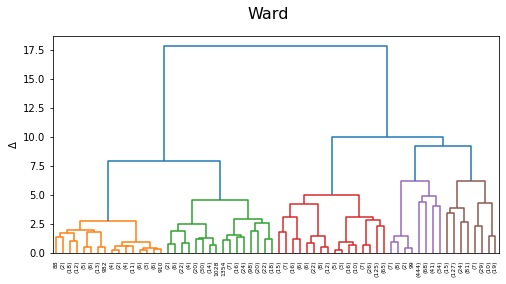

In [471]:
ward_pred = plot_hierarchical(X, 'ward', 7.5)
pd.Series(ward_pred).value_counts()

12 clusters generated.


1     1655
6        1
2        1
7        1
12       1
3        1
5        1
8        1
10       1
4        1
9        1
11       1
dtype: int64

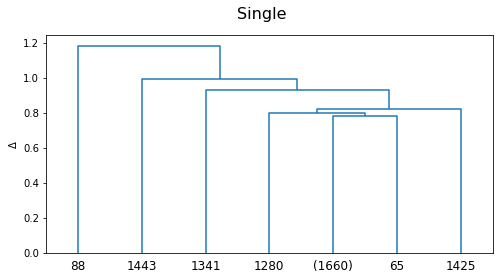

In [472]:
single_pred = plot_hierarchical(X, 'single', 0.7)
pd.Series(single_pred).value_counts()

3 clusters generated.


1    964
3    368
2    334
dtype: int64

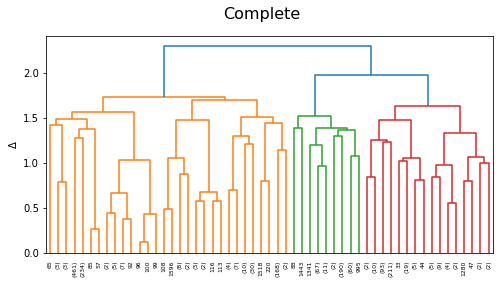

In [473]:
complete_pred = plot_hierarchical(X, 'complete', 1.8)
pd.Series(complete_pred).value_counts()

14 clusters generated.


6     1442
3      139
5       49
12      19
11       4
13       3
10       2
8        2
14       1
1        1
9        1
4        1
2        1
7        1
dtype: int64

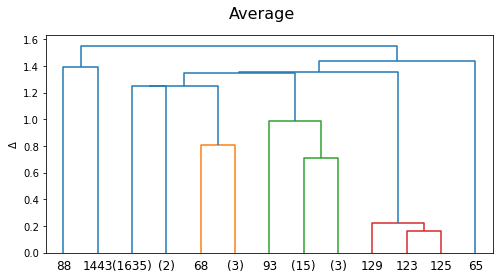

In [474]:
average_pred = plot_hierarchical(X, 'average', 1.1)
pd.Series(average_pred).value_counts()

In [475]:
# Define functions for Kmeans internal validation statistics
def pooled_within_ssd(X, y, centroids, dist):
    """Compute pooled within-cluster sum of squares around cluster mean."""

    w_k = 0
    for i in range(len(centroids)):
        n = len(X[y == i])
        for j in range(n):
            w_k += (1/(2*n))*dist(X[y == i][j], centroids[i])**2
    return w_k


def gap_statistic(X, y, centroids, dist, b, clusterer, random_state=1337):
    """Compute the gap statistic."""

    rng = np.random.default_rng(random_state)
    gap_k = []
    w_k = pooled_within_ssd(X, y, centroids, dist)
    if isinstance(X, np.matrix):
        X = np.array(X)
    for i in range(b):
        X_sim = rng.random(size=X.shape) * (X.max(axis=0) - X.min(axis=0))
        y_sim = clusterer.fit_predict(X_sim)
        centroids_sim = clusterer.cluster_centers_
        w_k_i = pooled_within_ssd(X_sim, y_sim, centroids_sim, dist)
        gap_k.append(np.log(w_k_i) - np.log(w_k))
    gs = np.mean(gap_k)
    gs_std = np.std(gap_k)
    return gs, gs_std


def cluster_range(X, clusterer, k_start, k_stop):
    """Perform clusterings on a dataset and return scores based on k."""

    ys = []
    centers = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    np.random.seed(1337)
    for k in range(k_start, k_stop+1):
        clusterer_k = clone(clusterer)
        clusterer_k.n_clusters = k
        clusterer_k.fit(X)
        y = clusterer_k.labels_
        ys.append(y)
        centers.append(clusterer_k.cluster_centers_)
        inertias.append(clusterer_k.inertia_)
        chs.append(calinski_harabasz_score(X, y))
        scs.append(silhouette_score(X, y, random_state=1337))
        gs = gap_statistic(X, y, clusterer_k.cluster_centers_,
                           euclidean, 5,
                           clone(clusterer).set_params(n_clusters=k),
                           random_state=1337)
        gss.append(gs[0])
        gssds.append(gs[1])
    results_dict = {}
    results_dict['ys'] = ys
    results_dict['centers'] = centers
    results_dict['inertias'] = inertias
    results_dict['chs'] = chs
    results_dict['scs'] = scs
    results_dict['gss'] = gss
    results_dict['gssds'] = gssds
    return results_dict


# Define function for internal validation plots.
def plot_internal(inertias, chs, scs, gss, gssds):
    """Plot internal validation values."""

    fig, ax = plt.subplots(1, 4, figsize=(14, 4), constrained_layout=True)
    ks = np.arange(2, len(inertias)+2)
    ax[0].plot(ks, inertias, '-o', label='SSE')
    ax[0].set_xlabel('$k$')
    ax[0].set_ylabel('SSE')
    ax[0].set_xticks(ks)
    ax[0].legend()
    ax[1].plot(ks, chs, '-ro', label='CH')
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('CH')
    ax[1].set_xticks(ks)
    ax[1].legend()
    ax[2].plot(ks, scs, '-ko', label='Silhouette')
    ax[2].set_xlabel('$k$')
    ax[2].set_ylabel('Silhouette')
    ax[2].set_xticks(ks)
    ax[2].legend()
    ax[3].errorbar(ks, gss, gssds, fmt='-go', label='Gap statistic')
    ax[3].set_xlabel('$k$')
    ax[3].set_ylabel('Gap Statistic')
    ax[3].set_xticks(ks)
    ax[3].legend()
    plt.suptitle('Internal validation')
    # plt.tight_layout()
    return ax

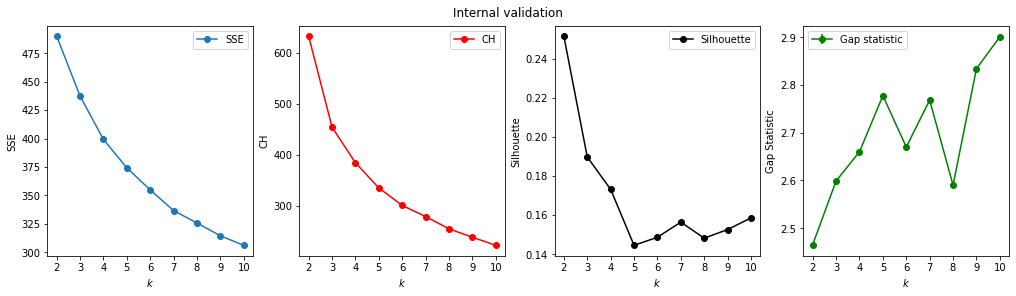

In [476]:
kmeans_plots = cluster_range(X, KMeans(random_state=1), 2, 10)
plot_internal(kmeans_plots['inertias'], kmeans_plots['chs'],
              kmeans_plots['scs'], kmeans_plots['gss'], kmeans_plots['gssds'])
plt.show()

In [477]:
# Internal validation plots disagree on the value for k
# SSE - better low
# Calinksi-Harabasz (CH) - better high
# Silhoutte - better high
# Gap statistic - better high

In [478]:
# at k=4
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans_predict = kmeans.fit_predict(X)
pd.Series(kmeans_predict).value_counts()

1    670
2    456
3    350
0    190
dtype: int64

### Apply Ward's Clustering

In [479]:
pd.Series(ward_pred).value_counts()

4    605
3    349
5    312
2    305
1     95
dtype: int64

In [480]:
df_clusters = df_merge.copy()
df_clusters['cluster'] = ward_pred
# df_clusters['cluster'] = complete_pred
df_clusters['expected-voters'] = df_pres_stats_ratios['expected-voters']
df_clusters

ABELLA, ERNIE (IND)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                           0.000840   
                            AL-BARKA                        0.002479   
                            CITY OF ISABELA                 0.004272   
                            CITY OF LAMITAN                 0.002380   
                            HADJI MOHAMMAD AJUL             0.001225   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                       0.001602   
                            SAN AGUSTIN                     0.003644   
                            SAN MIGUEL                      0.002043   
                            TAGBINA                         0.003352   
                            TAGO                            0.002423   

                                                 DE GUZMAN, LEODY (PLM)  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR                              0.000000   
                            AL-BARKA                           0.000620   
                            CITY OF ISABELA                    0.001534   
                            CITY OF LAMITAN                    0.000620   
                            HADJI MOHAMMAD AJUL                0.000306   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                          0.003625   
                            SAN AGUSTIN                        0.004307   
                            SAN MIGUEL                         0.005014   
                            TAGBINA                            0.003576   
                            TAGO                               0.003570   

                                                 DOMAGOSO, ISKO MORENO (AKSYON)  \
reg         prov            mun                                                   
BARMM       BASILAN         AKBAR                                      0.002521   
                            AL-BARKA                                   0.008181   
                            CITY OF ISABELA                            0.031441   
                            CITY OF LAMITAN                            0.020307   
                            HADJI MOHAMMAD AJUL                        0.015623   
...                                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                  0.013740   
                            SAN AGUSTIN                                0.016482   
                            SAN MIGUEL                                 0.008403   
                            TAGBINA                                    0.013410   
                            TAGO                                       0.013346   

                                                 GONZALES, NORBERTO (PDSP)  \
reg         prov            mun                                              
BARMM       BASILAN         AKBAR                                 0.000672   
                            AL-BARKA                              0.003719   
                            CITY OF ISABELA                       0.001490   
                            CITY OF LAMITAN                       0.000992   
                            HADJI MOHAMMAD AJUL                   0.001736   
...                                                                    ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                             0.001686   
                            SAN AGUSTIN                           0.001656   
                            SAN MIGUEL                            0.002135   
                            TAGBINA                               0.004827   
                            TAGO                                  0.002423   

                                         

In [481]:
# Average of cluster stats (voting percentages per candidate), non-weighted

all_candidates = list(df_clusters.columns[:260])
cols = all_candidates + ['expected-voters']

df_clusters_summary = df_clusters.groupby("cluster")[cols].mean()
df_clusters_summary

ABELLA, ERNIE (IND)  DE GUZMAN, LEODY (PLM)  \
cluster                                                
1                   0.003328                0.002055   
2                   0.003614                0.002327   
3                   0.001409                0.001441   
4                   0.002080                0.001496   
5                   0.003346                0.002040   

         DOMAGOSO, ISKO MORENO (AKSYON)  GONZALES, NORBERTO (PDSP)  \
cluster                                                              
1                              0.008384                   0.001833   
2                              0.037736                   0.002240   
3                              0.050112                   0.001367   
4                              0.017609                   0.001572   
5                              0.027885                   0.002489   

         LACSON, PING (PDR)  MANGONDATO, FAISAL (KTPNAN)  \
cluster                                                    
1                  0.005953                     0.000634   
2                  0.015680                     0.000853   
3                  0.021841                     0.008233   
4                  0.009893                     0.002434   
5                  0.008038                     0.047560   

         MARCOS, BONGBONG (PFP)  MONTEMAYOR, JOSE JR. (DPP)  \
cluster                                                       
1                      0.143091                    0.001159   
2                      0.380850                    0.001405   
3                      0.641632                    0.000810   
4                      0.799053                    0.001194   
5                      0.477034                    0.001709   

         PACQUIAO, MANNY PACMAN(PROMDI)  ROBREDO, LENI (IND)  \
cluster                                                        
1                              0.013204             0.820359   
2                              0.095797             0.459497   
3                              0.019540             0.253617   
4                              0.059934             0.104736   
5                              0.193242             0.236656   

         ATIENZA, LITO (PROMDI)  BELLO, WALDEN (PLM)  DAVID, RIZALITO (DPP)  \
cluster                                                                       
1                      0.004634             0.002993               0.001337   
2                      0.008300             0.002876               0.001537   
3                      0.003160             0.001325               0.000628   
4                      0.004098             0.001900               0.000948   
5                      0.010959             0.002778               0.002276   

         DUTERTE, SARA (LAKAS)  LOPEZ, MANNY SD (WPP)  \
cluster                                                 
1                     0.185825               0.003413   
2                     0.403025               0.004595   
3                     0.575400               0.001675   
4                     0.837261               0.002811   
5                     0.739445               0.006808   

         ONG, DOC WILLIE (AKSYON)  PANGILINAN, KIKO (LP)  \
cluster                                                    
1                        0.028842               0.597319   
2                        0.036213               0.315911   
3                        0.049115               0.155527   
4                        0.013704               0.062981   
5                        0.019789               0.115715   

         SERAPIO, CARLOS (KTPNAN)  SOTTO, VICENTE TITO (NPC)  \
cluster                                                        
1                        0.002626                   0.173011   
2                        0.002661                   0.224883   
3                        0.001151                   0.212021   
4                        0.001778                   0.074518   
5                        0.003330                   0.

In [482]:
# Look at cities/municipalities in Cluster 3

df_clusters[df_clusters['cluster']==3][cols].index.tolist()

[('BARMM', 'LANAO DEL SUR', 'AMAI MANABILANG'),
 ('BARMM', 'LANAO DEL SUR', 'BALABAGAN'),
 ('BARMM', 'LANAO DEL SUR', 'CALANOGAS'),
 ('BARMM', 'LANAO DEL SUR', 'KAPAI'),
 ('BARMM', 'LANAO DEL SUR', 'KAPATAGAN'),
 ('BARMM', 'LANAO DEL SUR', 'LUMBAYANAGUE'),
 ('BARMM', 'LANAO DEL SUR', 'MADAMBA'),
 ('BARMM', 'LANAO DEL SUR', 'PIAGAPO'),
 ('BARMM', 'LANAO DEL SUR', 'PICONG'),
 ('BARMM', 'LANAO DEL SUR', 'POONA BAYABAO'),
 ('BARMM', 'LANAO DEL SUR', 'TAGOLOAN'),
 ('BARMM', 'LANAO DEL SUR', 'TUGAYA'),
 ('BARMM', 'MAGUINDANAO', 'DATU ANGGAL MIDTIMBANG'),
 ('BARMM', 'MAGUINDANAO', 'DATU UNSAY'),
 ('BARMM', 'MAGUINDANAO', 'TALAYAN'),
 ('BARMM', 'SULU', 'LUUK'),
 ('CORDILLERA ADMINISTRATIVE REGION', 'BENGUET', 'CITY OF BAGUIO'),
 ('NATIONAL CAPITAL REGION', 'NCR - FOURTH DISTRICT', 'CITY OF LAS PIÑAS'),
 ('NATIONAL CAPITAL REGION', 'NCR - FOURTH DISTRICT', 'CITY OF MAKATI'),
 ('NATIONAL CAPITAL REGION', 'NCR - FOURTH DISTRICT', 'CITY OF MUNTINLUPA'),
 ('NATIONAL CAPITAL REGION', 'NCR - FOURTH 

In [483]:
# Check cluster of NCR

df_clusters.reset_index()[df_clusters.reset_index()['reg']=='NATIONAL CAPITAL REGION'][['reg', 'prov', 'mun'] + cols + ['cluster']]

reg                   prov                  mun  \
195  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT   CITY OF LAS PIÑAS   
196  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT       CITY OF MAKATI   
197  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT   CITY OF MUNTINLUPA   
198  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT   CITY OF PARAÑAQUE   
199  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT       CITY OF TAGUIG   
200  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT           PASAY CITY   
201  NATIONAL CAPITAL REGION  NCR - FOURTH DISTRICT              PATEROS   
202  NATIONAL CAPITAL REGION           NCR - MANILA              BINONDO   
203  NATIONAL CAPITAL REGION           NCR - MANILA               ERMITA   
204  NATIONAL CAPITAL REGION           NCR - MANILA           INTRAMUROS   
205  NATIONAL CAPITAL REGION           NCR - MANILA               MALATE   
206  NATIONAL CAPITAL REGION           NCR - MANILA                 PACO   
207  NATIONAL CAPITAL REGION           NCR - MANILA             PANDACAN   
208  NATIONAL CAPITAL REGION           NCR - MANILA            PORT AREA   
209  NATIONAL CAPITAL REGION           NCR - MANILA               QUIAPO   
210  NATIONAL CAPITAL REGION           NCR - MANILA             SAMPALOC   
211  NATIONAL CAPITAL REGION           NCR - MANILA           SAN MIGUEL   
212  NATIONAL CAPITAL REGION           NCR - MANILA          SAN NICOLAS   
213  NATIONAL CAPITAL REGION           NCR - MANILA            SANTA ANA   
214  NATIONAL CAPITAL REGION           NCR - MANILA           SANTA CRUZ   
215  NATIONAL CAPITAL REGION           NCR - MANILA                TONDO   
216  NATIONAL CAPITAL REGION  NCR - SECOND DISTRICT  CITY OF MANDALUYONG   
217  NATIONAL CAPITAL REGION  NCR - SECOND DISTRICT     CITY OF MARIKINA   
218  NATIONAL CAPITAL REGION  NCR - SECOND DISTRICT        CITY OF PASIG   
219  NATIONAL CAPITAL REGION  NCR - SECOND DISTRICT     CITY OF SAN JUAN   
220  NATIONAL CAPITAL REGION  NCR - SECOND DISTRICT          QUEZON CITY   
221  NATIONAL CAPITAL REGION   NCR - THIRD DISTRICT     CITY OF CALOOCAN   
222  NATIONAL CAPITAL REGION   NCR - THIRD DISTRICT      CITY OF MALABON   
223  NATIONAL CAPITAL REGION   NCR - THIRD DISTRICT      CITY OF NAVOTAS   
224  NATIONAL CAPITAL REGION   NCR - THIRD DISTRICT   CITY OF VALENZUELA   

     ABELLA, ERNIE (IND)  DE GUZMAN, LEODY (PLM)  \
195             0.000757                0.001622   
196             0.000608                0.001486   
197             0.000935                0.001577   
198             0.000927                0.001491   
199             0.000823                0.001608   
200             0.000697                0.001389   
201             0.000761                0.001797   
202             0.001013                0.001013   
203             0.000663                0.000995   
204             0.000680                0.002041   
205             0.000599                0.001102   
206             0.000682                0.001036   
207             0.000492                0.001156   
208             0.001185                0.001777   
209             0.000398                0.001129   
210             0.000419                0.001319   
211             0.000789                0.001183   
212             0.000797                0.001175   
213             0.000427                0.001376   
214             0.000496                0.001139   
215             0.000349                0.001243   
216             0.000842                0.001778   
217             0.000525                0.002195   
218             0.000696                0.001964   
219             0.000747                0.001518   
220             0.000656                0.001414   
221             0.000690                0.001365   
222             0.000939                0.001888   
223             0.000657                0.001346   
224             0.000718                0.001758   

     DOMAGOSO, ISKO MORENO (AKSYON)  GONZALES, NORBERTO

In [484]:
# Check cluster of OAV region

df_clusters.reset_index()[df_clusters.reset_index()['reg']=='OAV'][['reg', 'prov', 'mun'] + cols + ['cluster']]

reg                     prov                              mun  \
225  OAV                 AMERICAS                            AGANA   
226  OAV                 AMERICAS                           CANADA   
227  OAV                 AMERICAS         UNITED STATES OF AMERICA   
228  OAV             ASIA PACIFIC                        AUSTRALIA   
229  OAV             ASIA PACIFIC                            JAPAN   
230  OAV             ASIA PACIFIC              KINGDOM OF THAILAND   
231  OAV             ASIA PACIFIC                         MALAYSIA   
232  OAV             ASIA PACIFIC        PEOPLES REPUBLIC OF CHINA   
233  OAV             ASIA PACIFIC                REPUBLIC OF KOREA   
234  OAV             ASIA PACIFIC            REPUBLIC OF SINGAPORE   
235  OAV             ASIA PACIFIC                      TAIWAN, ROC   
236  OAV                   EUROPE                           ATHENS   
237  OAV                   EUROPE                            ITALY   
238  OAV                   EUROPE                 KINGDOM OF SPAIN   
239  OAV                   EUROPE  UNITED KINGDOM OF GREAT BRITAIN   
240  OAV  MIDDLE EAST AND AFRICAS               KINGDOM OF BAHRAIN   
241  OAV  MIDDLE EAST AND AFRICAS          KINGDOM OF SAUDI ARABIA   
242  OAV  MIDDLE EAST AND AFRICAS              REPUBLIC OF LEBANON   
243  OAV  MIDDLE EAST AND AFRICAS                  STATE OF KUWAIT   
244  OAV  MIDDLE EAST AND AFRICAS                   STATE OF QATAR   
245  OAV  MIDDLE EAST AND AFRICAS                SULTANATE OF OMAN   
246  OAV  MIDDLE EAST AND AFRICAS             UNITED ARAB EMIRATES   

     ABELLA, ERNIE (IND)  DE GUZMAN, LEODY (PLM)  \
225             0.000380                0.000570   
226             0.001426                0.001070   
227             0.000840                0.000924   
228             0.000951                0.000846   
229             0.001173                0.000872   
230             0.001906                0.001429   
231             0.000523                0.000523   
232             0.000415                0.000200   
233             0.002383                0.000340   
234             0.000494                0.000513   
235             0.000227                0.000303   
236             0.000451                0.000451   
237             0.000418                0.000537   
238             0.000241                0.000882   
239             0.001066                0.000815   
240             0.000072                0.000289   
241             0.000422                0.000456   
242             0.000000                0.000247   
243             0.000110                0.000551   
244             0.000880                0.000782   
245             0.000371                0.000124   
246             0.000287                0.000328   

     DOMAGOSO, ISKO MORENO (AKSYON)  GONZALES, NORBERTO (PDSP)  \
225                        0.055862                   0.000380   
226                        0.048485                   0.001783   
227                        0.064203                   0.000546   
228                        0.044292                   0.002220   
229                        0.047273                   0.001053   
230                        0.024297                   0.001588   
231                        0.028417                   0.001569   
232                        0.032193                   0.000501   
233                        0.029963                   0.001021   
234                        0.037422                   0.001557   
235                        0.013398                   0.000303   
236                        0.029319                   0.000000   
237                        0.053606                   0.000478   
238                        0.034721                   0.000401   
239                        0.056423                   0.001317   
240                        0.034460                   0.000578   
241                        0.037956                   0.000523   
242      

### Aggregated Cluster Stats

In [485]:
# To get true voting percentages per cluster (not just simple/non-weighted
# average of voting percentage per municipality)

df_pres_results_votes = df_pres_results_eda.reset_index()
df_pres_results_votes = df_pres_results_votes.pivot(index=['reg', 'prov', 'mun'],
                                                    columns='candidate_name',
                                                    values='votes')
df_vp_results_votes = df_vp_results_eda.reset_index()
df_vp_results_votes = df_vp_results_votes.pivot(index=['reg', 'prov', 'mun'],
                                                    columns='candidate_name',
                                                    values='votes')

df_sen_results_votes = df_sen_results_eda.reset_index()
df_sen_results_votes = df_sen_results_votes.pivot(index=['reg', 'prov', 'mun'],
                                                    columns='candidate_name',
                                                    values='votes')

df_plist_results_votes = df_plist_results_eda.reset_index()
df_plist_results_votes = df_plist_results_votes.pivot(index=['reg', 'prov', 'mun'],
                                                      columns='candidate_name',
                                                      values='votes')

In [486]:
df_merge_votes = df_pres_results_votes.merge(df_vp_results_votes, left_index=True, right_index=True)
df_merge_votes = df_merge_votes.merge(df_sen_results_votes, left_index=True, right_index=True)
df_merge_votes = df_merge_votes.merge(df_plist_results_votes, left_index=True, right_index=True)
df_merge_votes['expected-voters'] = df_pres_stats_ratios['expected-voters']
df_merge_votes['cluster'] = ward_pred
df_merge_votes

candidate_name                                   ABELLA, ERNIE (IND)  \
reg         prov            mun                                        
BARMM       BASILAN         AKBAR                                  5   
                            AL-BARKA                              20   
                            CITY OF ISABELA                      195   
                            CITY OF LAMITAN                       96   
                            HADJI MOHAMMAD AJUL                   12   
...                                                              ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                             19   
                            SAN AGUSTIN                           44   
                            SAN MIGUEL                            44   
                            TAGBINA                               75   
                            TAGO                                  57   

candidate_name                                   DE GUZMAN, LEODY (PLM)  \
reg         prov            mun                                           
BARMM       BASILAN         AKBAR                                     0   
                            AL-BARKA                                  5   
                            CITY OF ISABELA                          70   
                            CITY OF LAMITAN                          25   
                            HADJI MOHAMMAD AJUL                       3   
...                                                                 ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                43   
                            SAN AGUSTIN                              52   
                            SAN MIGUEL                              108   
                            TAGBINA                                  80   
                            TAGO                                     84   

candidate_name                                   DOMAGOSO, ISKO MORENO (AKSYON)  \
reg         prov            mun                                                   
BARMM       BASILAN         AKBAR                                            15   
                            AL-BARKA                                         66   
                            CITY OF ISABELA                                1435   
                            CITY OF LAMITAN                                 819   
                            HADJI MOHAMMAD AJUL                             153   
...                                                                         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                       163   
                            SAN AGUSTIN                                     199   
                            SAN MIGUEL                                      181   
                            TAGBINA                                         300   
                            TAGO                                            314   

candidate_name                                   GONZALES, NORBERTO (PDSP)  \
reg         prov            mun                                              
BARMM       BASILAN         AKBAR                                        4   
                            AL-BARKA                                    30   
                            CITY OF ISABELA                             68   
                            CITY OF LAMITAN                             40   
                            HADJI MOHAMMAD AJUL                         17   
...                                                                    ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                                   20   
                            SAN AGUSTIN                                 20   
                            SAN MIGUEL                                  46   
                            TAGBINA                                    108   
                            TAGO                                       

In [487]:
all_pres = list(df_pres_results_pivot.columns)
all_vp = list(df_vp_results_pivot.columns)
all_sen = list(df_sen_results_pivot.columns)
all_plist = list(df_plist_results_pivot.columns)

In [488]:
cols = all_candidates + ['expected-voters']

df_cluster_votes = df_merge_votes.groupby("cluster")[cols].sum()

all_pres_votes = df_cluster_votes[all_pres].sum(axis=1)
all_vp_votes = df_cluster_votes[all_vp].sum(axis=1)
all_sen_votes = df_cluster_votes[all_sen].sum(axis=1)
all_plist_votes = df_cluster_votes[all_plist].sum(axis=1)

for col in df_cluster_votes[all_pres].columns:
    df_cluster_votes[col] = df_cluster_votes[col] / all_pres_votes
for col in df_cluster_votes[all_vp].columns:
    df_cluster_votes[col] = df_cluster_votes[col] / all_vp_votes
for col in df_cluster_votes[all_sen].columns:
    df_cluster_votes[col] = df_cluster_votes[col] / all_sen_votes
for col in df_cluster_votes[all_plist].columns:
    df_cluster_votes[col] = df_cluster_votes[col] / all_plist_votes

cols2 = all_pres + ['expected-voters']
    
df_cluster_votes[cols2]

candidate_name  ABELLA, ERNIE (IND)  DE GUZMAN, LEODY (PLM)  \
cluster                                                       
1                          0.003050                0.001985   
2                          0.003418                0.002260   
3                          0.001291                0.001506   
4                          0.002064                0.001579   
5                          0.003303                0.002171   

candidate_name  DOMAGOSO, ISKO MORENO (AKSYON)  GONZALES, NORBERTO (PDSP)  \
cluster                                                                     
1                                     0.008540                   0.001838   
2                                     0.036672                   0.002132   
3                                     0.052956                   0.001270   
4                                     0.019013                   0.001691   
5                                     0.025270                   0.002462   

candidate_name  LACSON, PING (PDR)  MANGONDATO, FAISAL (KTPNAN)  \
cluster                                                           
1                         0.006031                     0.000737   
2                         0.015814                     0.000875   
3                         0.024410                     0.002084   
4                         0.010775                     0.002719   
5                         0.009039                     0.024828   

candidate_name  MARCOS, BONGBONG (PFP)  MONTEMAYOR, JOSE JR. (DPP)  \
cluster                                                              
1                             0.144313                    0.001072   
2                             0.380633                    0.001347   
3                             0.618701                    0.000827   
4                             0.774311                    0.001210   
5                             0.500676                    0.001764   

candidate_name  PACQUIAO, MANNY PACMAN(PROMDI)  ROBREDO, LENI (IND)  \
cluster                                                               
1                                     0.012410             0.820022   
2                                     0.088883             0.467966   
3                                     0.021535             0.275420   
4                                     0.072488             0.114150   
5                                     0.216748             0.213739   

candidate_name  expected-voters  
cluster                          
1                       3308590  
2                       9213280  
3                      27338850  
4                      17470171  
5                       8739903

**Initial/Draft Interpretation**

Cluster 1:
- strongly pro-Leni

Cluster 2:
- more evenly split between BBM and Leni, but still prefers Leni

Cluster 3:
- voter-rich areas, including all of NCR and OAV
- seems to also include many municipalities from BARMM and Regions I, III, and IV-A (best to map)
- prefer BBM

Cluster 4
- heavily pro-Marcos

Cluster 5:
- three-way voting between Marcos, Leni, and Pacquiao

## Network Modelling

### Senators

In [852]:
df_coalitions = pd.read_csv('coalitions.csv')

Candidate      Coalition        Party
0       Teddy Baguilat  Laban ng Masa      Liberal
1        Roy Cabonegro  Laban ng Masa          PLM
2      Neri Colmenares  Laban ng Masa    Makabayan
3       David d'Angelo  Laban ng Masa          PLM
4        Leila de Lima  Laban ng Masa      Liberal
..                 ...            ...          ...
81     Nur-Mahal Kiram            NaN  Independent
82           Ariel Lim            NaN  Independent
83  Francis Leo Marcos            NaN  Independent
84         Rey Valeros            NaN  Independent
85      Carmen Zubiaga            NaN  Independent

[86 rows x 3 columns]

In [950]:
df_coalition_edges = df_coalitions.dropna()[['Candidate', 'Coalition']].iloc[:-4]
df_coalition_nodes = df_coalitions[df_coalitions['Coalition'].isna()]['Candidate'].tolist()
df_coalition_edges

Candidate         Coalition
0       Teddy Baguilat     Laban ng Masa
1        Roy Cabonegro     Laban ng Masa
2      Neri Colmenares     Laban ng Masa
3       David d'Angelo     Laban ng Masa
4        Leila de Lima     Laban ng Masa
..                 ...               ...
59       Robin Padilla  UniTeam Alliance
60         Harry Roque  UniTeam Alliance
61     Gilbert Teodoro  UniTeam Alliance
62         Mark Villar  UniTeam Alliance
63  Juan Miguel Zubiri  UniTeam Alliance

[64 rows x 2 columns]

In [951]:
coalitions = df_coalition_edges['Coalition'].unique().tolist()
candidates = df_coalition_edges['Candidate'].unique().tolist() + df_coalition_nodes

In [952]:
coal_G = nx.from_pandas_edgelist(df_coalition_edges, 'Coalition', 'Candidate')

# for node in df_coalition_nodes:
#     coal_G.add_node(node)

In [953]:
df_coal_nodes = pd.DataFrame()
df_coal_nodes['node'] = pd.Series(list(coal_G.nodes()))
df_coal_nodes['color'] = df_coal_nodes['node'].apply(lambda x: 'tab:orange' if x in coalitions else 'tab:blue')
df_coal_nodes['size'] = df_coal_nodes['node'].apply(lambda x: 800 if x in coalitions else 200)

df_coal_nodes.head()

node       color  size
0    Laban ng Masa  tab:orange   800
1   Teddy Baguilat    tab:blue   200
2    Roy Cabonegro    tab:blue   200
3  Neri Colmenares    tab:blue   200
4   David d'Angelo    tab:blue   200

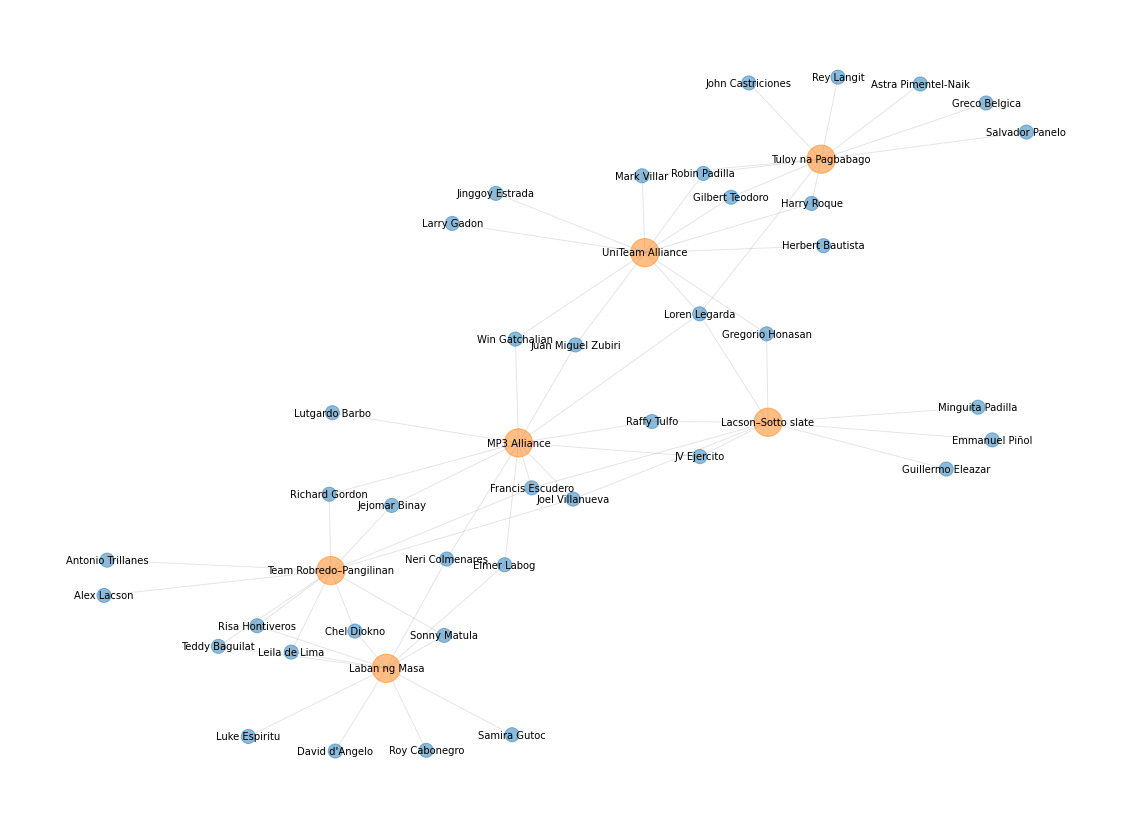

In [954]:
# pos = nx.kamada_kawai_layout(coal_G, center=[100, 100])
pos = nx.spring_layout(coal_G, iterations=140)

plt.figure(figsize=(20, 15))
plt.axis("off")
# nx.draw_networkx_nodes(plist_G, pos, node_size=10)

nx.draw_networkx_nodes(coal_G, pos, alpha=0.5,
                       node_color=df_coal_nodes['color'].tolist(),
                       node_size=df_coal_nodes['size'].tolist())
nx.draw_networkx_edges(coal_G, pos, alpha=0.1)
nx.draw_networkx_labels(coal_G, pos, font_color="black", font_size=10)
plt.show()

In [955]:
nx.is_connected(coal_G)

True

In [956]:
U, V = bipartite.sets(coal_G)

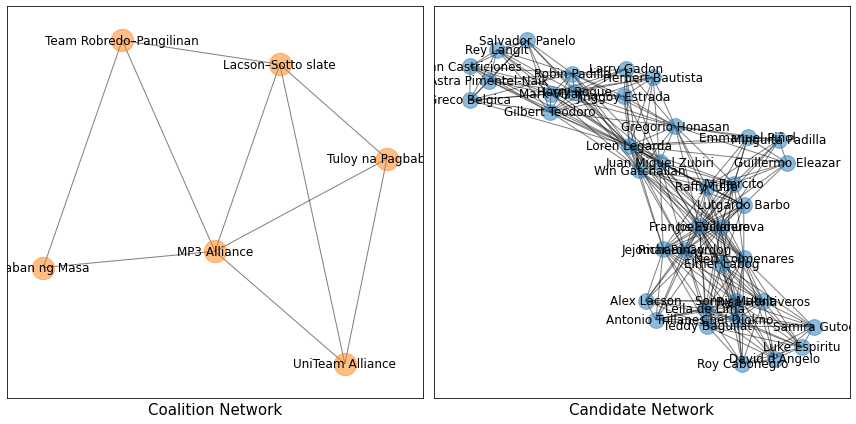

In [957]:
coal_U = bipartite.projected_graph(coal_G, U)

pos = nx.spring_layout(coal_U);

fig, ax = plt.subplots(1, 2, figsize=(12, 6));
nx.draw_networkx_nodes(coal_U, pos, node_size=500, node_color="tab:orange",
                       ax=ax[0], alpha=0.5);
nx.draw_networkx_edges(coal_U, pos, alpha=0.500, ax=ax[0]);
nx.draw_networkx_labels(coal_U, pos, font_color='black', ax=ax[0]);
ax[0].set_xlabel("Coalition Network", fontsize=15)

coal_V = bipartite.projected_graph(coal_G, V)

pos = nx.spring_layout(coal_V);
nx.draw_networkx_nodes(coal_V, pos, node_size=250, node_color='tab:blue',
                       ax=ax[1], alpha=0.5);
nx.draw_networkx_edges(coal_V, pos, alpha=0.500, ax=ax[1]);
nx.draw_networkx_labels(coal_V, pos, font_color='black', ax=ax[1]);
ax[1].set_xlabel("Candidate Network", fontsize=15)

plt.tight_layout()
plt.show()

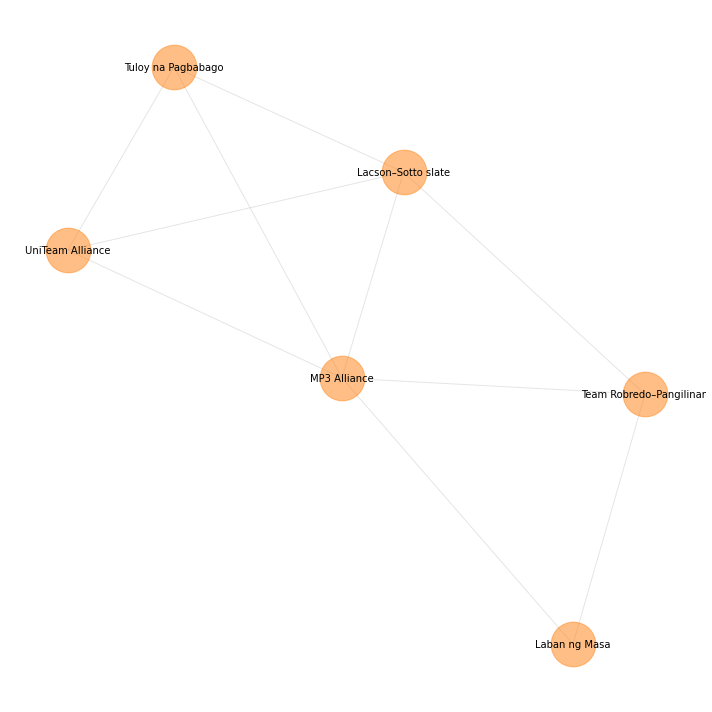

In [980]:
coal_U = bipartite.projected_graph(coal_G, U)

# coal_U.add_node('Labor Party Philippines')
# coal_U.add_node('Partido Maharlika')

fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(coal_U, iterations=100);
nx.draw_networkx_nodes(coal_U, pos, node_size=2000, node_color='tab:orange',
                       ax=ax, alpha=0.5);
nx.draw_networkx_edges(coal_U, pos, alpha=0.100, ax=ax);
nx.draw_networkx_labels(coal_U, pos, font_color='black', ax=ax, font_size=10);
ax.set_xlabel("Coalition Network", fontsize=40)

ax.axis('off')
plt.tight_layout()
plt.show()

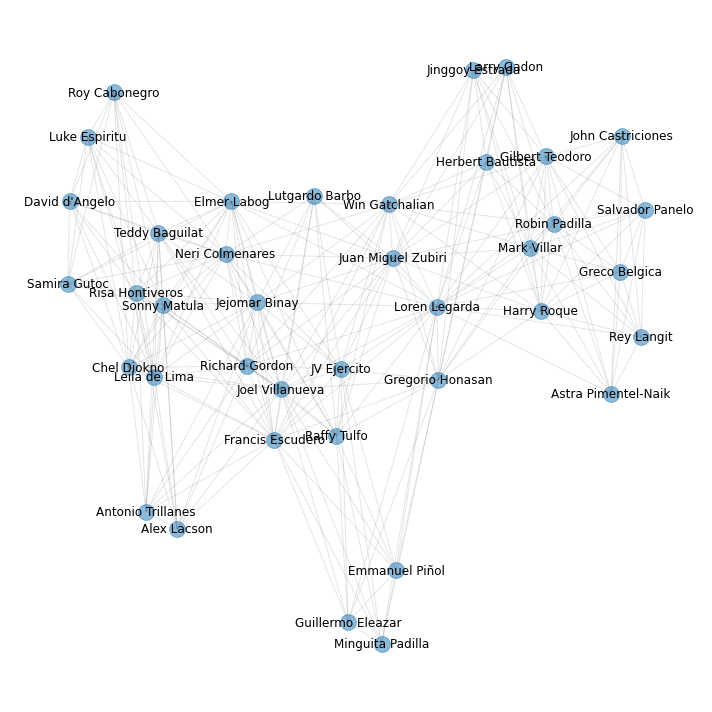

In [989]:
coal_V = bipartite.projected_graph(coal_G, V)

# for node in df_coalition_nodes:
#     coal_V.add_node(node)

fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(coal_V, iterations=200);
nx.draw_networkx_nodes(coal_V, pos, node_size=250, node_color='tab:blue',
                       ax=ax, alpha=0.5);
nx.draw_networkx_edges(coal_V, pos, alpha=0.100, ax=ax);
nx.draw_networkx_labels(coal_V, pos, font_color='black', ax=ax);
ax.set_xlabel("Candidate Network", fontsize=15)

ax.axis('off')
plt.tight_layout()
plt.show()

In [1007]:
pd.Series(dict(coal_V.degree())).sort_values(ascending=False)

Loren Legarda          27
Francis Escudero       22
Joel Villanueva        22
Elmer Labog            20
Neri Colmenares        20
Win Gatchalian         19
Juan Miguel Zubiri     19
Richard Gordon         18
Jejomar Binay          18
Gregorio Honasan       17
Teddy Baguilat         16
Chel Diokno            16
Leila de Lima          16
Risa Hontiveros        16
Sonny Matula           16
Robin Padilla          15
Raffy Tulfo            15
Mark Villar            15
Harry Roque            15
Gilbert Teodoro        15
JV Ejercito            15
Lutgardo Barbo         11
Herbert Bautista       10
Alex Lacson            10
Samira Gutoc           10
Roy Cabonegro          10
Jinggoy Estrada        10
Larry Gadon            10
Luke Espiritu          10
Antonio Trillanes      10
David d'Angelo         10
Greco Belgica           9
Rey Langit              9
Salvador Panelo         9
Astra Pimentel-Naik     9
John Castriciones       9
Guillermo Eleazar       8
Emmanuel Piñol          8
Minguita Pad

In [1010]:
df_cand_centrality = pd.DataFrame()
df_cand_centrality['degree'] = pd.Series(nx.degree_centrality(coal_V))
df_cand_centrality['eigenvector'] = pd.Series(nx.eigenvector_centrality(coal_V))

df_cand_centrality['betweenness'] = pd.Series(nx.betweenness_centrality(coal_V))
df_cand_centrality['closeness'] = pd.Series(nx.closeness_centrality(coal_V))

df_cand_centrality.sort_values('degree', ascending=False)

degree  eigenvector  betweenness  closeness
Loren Legarda        0.710526     0.247453     0.256398   0.775510
Francis Escudero     0.578947     0.256892     0.071397   0.703704
Joel Villanueva      0.578947     0.256892     0.071397   0.703704
Elmer Labog          0.526316     0.241109     0.080895   0.678571
Neri Colmenares      0.526316     0.241109     0.080895   0.678571
Win Gatchalian       0.500000     0.212685     0.061945   0.666667
Juan Miguel Zubiri   0.500000     0.212685     0.061945   0.666667
Richard Gordon       0.473684     0.230062     0.033231   0.655172
Jejomar Binay        0.473684     0.230062     0.033231   0.655172
Gregorio Honasan     0.447368     0.163716     0.034139   0.603175
Teddy Baguilat       0.421053     0.184410     0.008341   0.527778
Chel Diokno          0.421053     0.184410     0.008341   0.527778
Leila de Lima        0.421053     0.184410     0.008341   0.527778
Risa Hontiveros      0.421053     0.184410     0.008341   0.527778
Sonny Matula         0.421053     0.184410     0.008341   0.527778
Robin Padilla        0.394737     0.111355     0.008535   0.527778
Raffy Tulfo          0.394737     0.186206     0.008887   0.622951
Mark Villar          0.394737     0.111355     0.008535   0.527778
Harry Roque          0.394737     0.111355     0.008535   0.527778
Gilbert Teodoro      0.394737     0.111355     0.008535   0.527778
JV Ejercito          0.394737     0.186206     0.008887   0.622951
Lutgardo Barbo       0.289474     0.159376     0.000000   0.584615
Herbert Bautista     0.263158     0.093611     0.000000   0.493506
Alex Lacson          0.263158     0.129022     0.000000   0.487179
Samira Gutoc         0.263158     0.110617     0.000000   0.463415
Roy Cabonegro        0.263158     0.110617     0.000000   0.463415
Jinggoy Estrada      0.263158     0.093611     0.000000   0.493506
Larry Gadon          0.263158     0.093611     0.000000   0.493506
Luke Espiritu        0.263158     0.110617     0.000000   0.463415
Antonio Trillanes    0.263158     0.129022     0.000000   0.487179
David d'Angelo       0.263158     0.110617     0.000000   0.463415
Greco Belgica        0.236842     0.059248     0.000000   0.487179
Rey Langit           0.236842     0.059248     0.000000   0.487179
Salvador Panelo      0.236842     0.059248     0.000000   0.487179
Astra Pimentel-Naik  0.236842     0.059248     0.000000   0.487179
John Castriciones    0.236842     0.059248     0.000000   0.487179
Guillermo Eleazar    0.210526     0.094735     0.000000   0.527778
Emmanuel Piñol       0.210526     0.094735     0.000000   0.527778
Minguita Padilla     0.210526     0.094735     0.000000   0.527778

In [990]:
df_coalitions.dropna()[['Candidate', 'Coalition']].iloc[-4:]

Candidate                Coalition
64         Ibrahim Albani  Labor Party Philippines
65         Melchor Chavez  Labor Party Philippines
66            Ernie Ereño        Partido Maharlika
67  Willie Ricablanca Jr.        Partido Maharlika

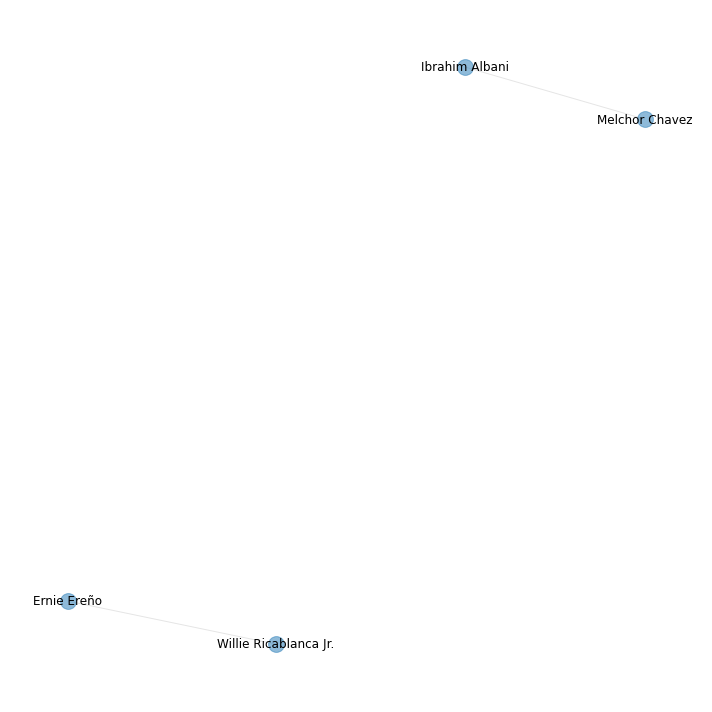

In [1003]:
small_coal_G = nx.Graph()

small_coal_G.add_edge('Ibrahim Albani', 'Melchor Chavez')
small_coal_G.add_edge('Ernie Ereño', 'Willie Ricablanca Jr.')

fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(small_coal_G, iterations=80);
nx.draw_networkx_nodes(small_coal_G, pos, node_size=250, node_color='tab:blue',
                       ax=ax, alpha=0.5);
nx.draw_networkx_edges(small_coal_G, pos, alpha=0.100, ax=ax);
nx.draw_networkx_labels(small_coal_G, pos, font_color='black', ax=ax);
ax.set_xlabel("Candidate Network", fontsize=15)

ax.axis('off')
plt.tight_layout()
plt.show()

### Senators (alternate network)

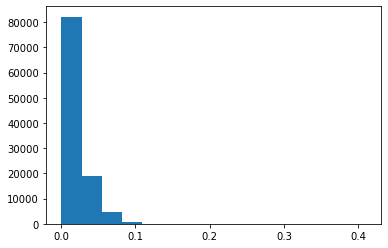

In [489]:
threshold = 0.06

plt.hist(df_sen_results_eda['votes_percent'], bins=15)
plt.show()

In [490]:
df_sen_edges = df_sen_results_eda.reset_index()
df_sen_edges['loc'] = df_sen_edges['reg'] + ', ' + df_sen_edges['prov'] + ', ' + df_sen_edges['mun']
df_sen_edges = df_sen_edges[df_sen_edges['votes_percent'] >= threshold]
df_sen_edges = df_sen_edges[['candidate_name', 'loc']]
df_sen_edges = df_sen_edges.groupby('loc')['candidate_name'].apply(list)
df_sen_edges = df_sen_edges[df_sen_edges.apply(lambda x: len(x) > 1)]
df_sen_edges

loc
BARMM, BASILAN, AKBAR                        [PADILLA, ROBIN (PDPLBN), VILLAR, MARK (NP), Z...
BARMM, BASILAN, CITY OF LAMITAN                 [PADILLA, ROBIN (PDPLBN), TEODORO, GIBO (PRP)]
BARMM, BASILAN, HADJI MOHAMMAD AJUL          [PADILLA, ROBIN (PDPLBN), TULFO, IDOL RAFFY (I...
BARMM, BASILAN, TABUAN-LASA                  [BINAY, JOJO (UNA), PADILLA, ROBIN (PDPLBN), T...
BARMM, LANAO DEL SUR, AMAI MANABILANG        [BINAY, JOJO (UNA), CAYETANO, ALAN PETER (IND)...
                                                                   ...                        
REGION XIII, SURIGAO DEL SUR, MARIHATAG      [PADILLA, ROBIN (PDPLBN), TULFO, IDOL RAFFY (I...
REGION XIII, SURIGAO DEL SUR, SAN AGUSTIN    [PADILLA, ROBIN (PDPLBN), TULFO, IDOL RAFFY (I...
REGION XIII, SURIGAO DEL SUR, SAN MIGUEL     [PADILLA, ROBIN (PDPLBN), TULFO, IDOL RAFFY (I...
REGION XIII, SURIGAO DEL SUR, TAGBINA        [PADILLA, ROBIN (PDPLBN), TULFO, IDOL RAFFY (I...
REGION XIII, SURIGAO DEL SUR, TAGO           [

In [491]:
sen_G = nx.Graph()

for candidate_list in df_sen_edges:
    edges = list(combinations(candidate_list, 2))
    for edge in edges:
        if not sen_G.has_edge(edge[0], edge[1]):
            sen_G.add_edge(edge[0], edge[1], weight=1)
        else:
            sen_G[edge[0]][edge[1]]['weight'] += 1 

In [492]:
len(sen_G.nodes())

38

In [493]:
sen_partition = community.best_partition(sen_G, weight='weight', random_state=0)

print('Modularity:', community.modularity(sen_partition, sen_G))

sen_partition

Modularity: 0.15219678709778142


{'PADILLA, ROBIN (PDPLBN)': 0,
 'VILLAR, MARK (NP)': 1,
 'ZUBIRI, MIGZ (IND)': 0,
 'TEODORO, GIBO (PRP)': 1,
 'TULFO, IDOL RAFFY (IND)': 0,
 'BINAY, JOJO (UNA)': 1,
 'CAYETANO, ALAN PETER (IND)': 1,
 'ESCUDERO, CHIZ (NPC)': 2,
 'GATCHALIAN, WIN (NPC)': 1,
 'GUTOC, SAMIRA (AKSYON)': 0,
 'LEGARDA, LOREN (NPC)': 0,
 'VILLANUEVA,JOEL TESDAMAN (IND)': 1,
 'PIMENTEL, ASTRA (PDPLBN)': 0,
 'BAUTISTA, HERBERT BISTEK (NPC)': 1,
 'ESTRADA, JINGGOY (PMP)': 1,
 'PANELO, SAL PANALO (PDPLBN)': 1,
 'MINDALANO-ADAM,MARIETA(KTPNAN)': 0,
 'DE LIMA, LEILA (LP)': 2,
 'DIOKNO, CHEL (KANP)': 2,
 'ELEAZAR, GEN. GUILLERMO (PDR)': 1,
 'GORDON, WOW DICK (BVNP)': 2,
 'LACSON, KUYA ALEX (KP)': 2,
 'PIÑOL, MANNY (NPC)': 0,
 'BALITA, CARL (AKSYON)': 0,
 'BELGICA, GRECO (PDDS)': 1,
 'EJERCITO, JV ESTRADA (NPC)': 1,
 'GADON, LARRY (KBL)': 1,
 'HONTIVEROS, RISA (AKBAYAN)': 2,
 'ROQUE, HARRY SPOX (PRP)': 1,
 'BAGUILAT, TEDDY (LP)': 0,
 'SAHIDULLA, LADY ANNE (PDDS)': 1,
 'PADILLA, DRA. MINGUITA (PDR)': 0,
 'BELLO, SILVES

In [851]:
df_sen_communities = pd.DataFrame()
df_sen_communities['community'] = pd.Series(sen_partition)
df_sen_communities = df_sen_communities.merge(df_senator_results.groupby('candidate_name')['votes'].sum(),
                                              how='left', right_index=True, left_index=True)
df_sen_communities.sort_values(['community', 'votes'], ascending=False)



community     votes
ESCUDERO, CHIZ (NPC)                    2  20024927
HONTIVEROS, RISA (AKBAYAN)              2  15254373
DIOKNO, CHEL (KANP)                     2   9867670
TRILLANES, ANTONIO IV (LP)              2   8548596
GORDON, WOW DICK (BVNP)                 2   8278549
DE LIMA, LEILA (LP)                     2   7212677
LACSON, KUYA ALEX (KP)                  2   5423176
MATULA, SONNY (IND)                     2   2652968
GATCHALIAN, WIN (NPC)                   1  20356281
VILLAR, MARK (NP)                       1  19187474
CAYETANO, ALAN PETER (IND)              1  19059523
VILLANUEVA,JOEL TESDAMAN (IND)          1  18282777
EJERCITO, JV ESTRADA (NPC)              1  15674260
ESTRADA, JINGGOY (PMP)                  1  14953664
BINAY, JOJO (UNA)                       1  13171224
BAUTISTA, HERBERT BISTEK (NPC)          1  12928350
TEODORO, GIBO (PRP)                     1  12558199
ELEAZAR, GEN. GUILLERMO (PDR)           1  11180580
ROQUE, HARRY SPOX (PRP)                 1  11030266
HONASAN, GRINGO (IND)                   1  10482621
GADON, LARRY (KBL)                      1   9485418
PANELO, SAL PANALO (PDPLBN)             1   4743716
MARCOLETA, RODANTE (PDPLBN)             1   3491891
BELGICA, GRECO (PDDS)                   1   2292562
BELLO, SILVESTRE JR. (PDPLBN)           1   1693660
BARBO, LUTZ (PDPLBN)                    1    742729
SAHIDULLA, LADY ANNE (PDDS)             1    564449
PADILLA, ROBIN (PDPLBN)                 0  26421702
LEGARDA, LOREN (NPC)                    0  23963976
TULFO, IDOL RAFFY (IND)                 0  23140827
ZUBIRI, MIGZ (IND)                      0  18560564
BAGUILAT, TEDDY (LP)                    0   4221147
BALITA, CARL (AKSYON)                   0   3693908
PADILLA, DRA. MINGUITA (PDR)            0   3502948
PIÑOL, MANNY (NPC)                      0   3465814
PIMENTEL, ASTRA (PDPLBN)                0   2947328
GUTOC, SAMIRA (AKSYON)                  0   2053101
MINDALANO-ADAM,MARIETA(KTPNAN)          0    432600

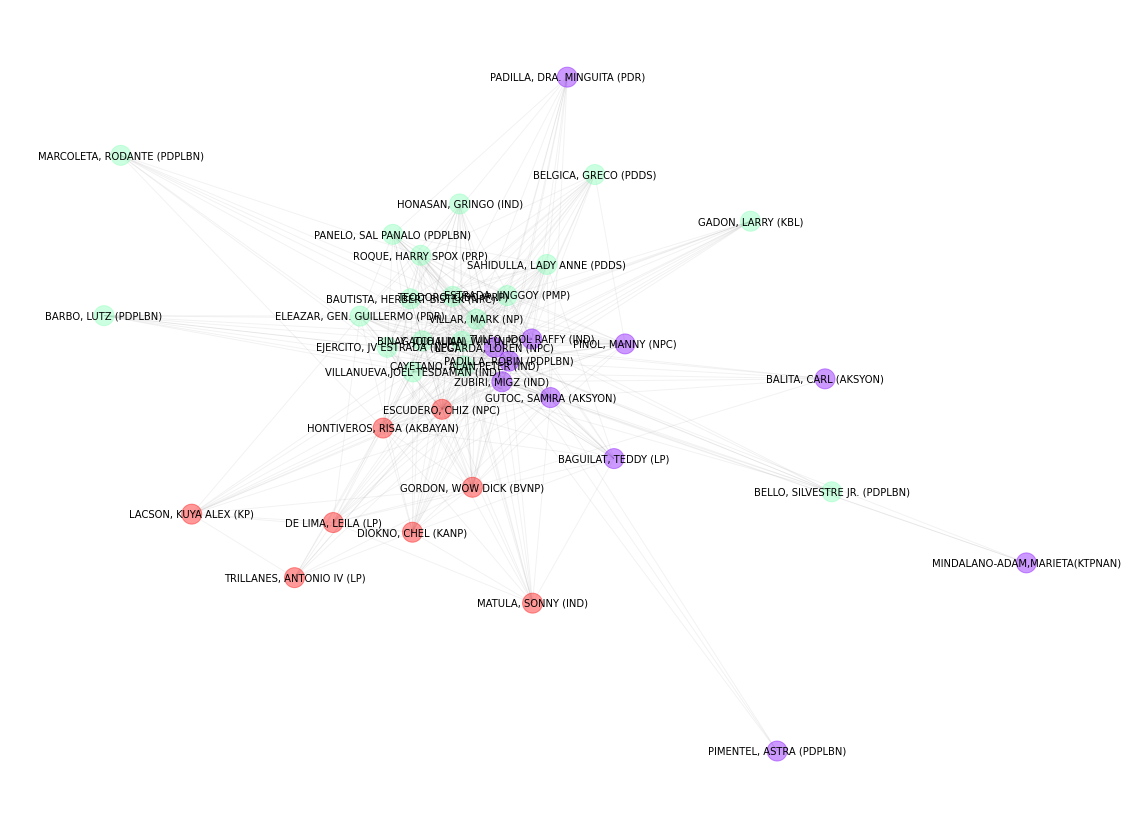

In [494]:
# pos = nx.kamada_kawai_layout(sen_G)
pos = nx.spring_layout(sen_G)

plt.figure(figsize=(20, 15))
plt.axis("off")
nx.draw_networkx_nodes(sen_G, pos, node_size=400, alpha=0.4, cmap='rainbow',
                       node_color=list(sen_partition.values()))
nx.draw_networkx_edges(sen_G, pos, alpha=0.05)
nx.draw_networkx_labels(sen_G, pos, font_color="black", font_size=10)
plt.show()

In [495]:
# Association Pattern Mining

report_sen = fim.fpgrowth(df_sen_edges.to_list(), target='r', supp=10, conf=5, report='l')
report_sen.sort(key=lambda x: x[2], reverse=True)
report_sen

[('PANELO, SAL PANALO (PDPLBN)',
  ('GATCHALIAN, WIN (NPC)',),
  8.748971193415638),
 ('ROQUE, HARRY SPOX (PRP)', ('GATCHALIAN, WIN (NPC)',), 8.530246913580246),
 ('BAUTISTA, HERBERT BISTEK (NPC)',
  ('GATCHALIAN, WIN (NPC)',),
  8.084986772486772),
 ('ROQUE, HARRY SPOX (PRP)', ('VILLAR, MARK (NP)',), 6.310045662100457),
 ('SAHIDULLA, LADY ANNE (PDDS)', ('GATCHALIAN, WIN (NPC)',), 6.15162037037037),
 ('VILLANUEVA,JOEL TESDAMAN (IND)',
  ('GATCHALIAN, WIN (NPC)',),
  6.005649717514125),
 ('TEODORO, GIBO (PRP)', ('GATCHALIAN, WIN (NPC)',), 5.905555555555556),
 ('EJERCITO, JV ESTRADA (NPC)', ('GATCHALIAN, WIN (NPC)',), 5.654255319148936),
 ('ROQUE, HARRY SPOX (PRP)',
  ('VILLAR, MARK (NP)', 'PADILLA, ROBIN (PDPLBN)'),
  5.644247787610619),
 ('ELEAZAR, GEN. GUILLERMO (PDR)',
  ('GATCHALIAN, WIN (NPC)',),
  5.563204508856683),
 ('ESTRADA, JINGGOY (PMP)', ('GATCHALIAN, WIN (NPC)',), 5.1352657004830915),
 ('EJERCITO, JV ESTRADA (NPC)', ('VILLAR, MARK (NP)',), 5.1120664529291755),
 ('BINAY, JO

### Party-List

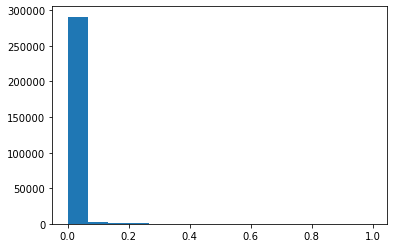

In [496]:
threshold = 0.12

plt.hist(df_plist_results_eda['votes_percent'], bins=15)
plt.show()

In [497]:
df_plist_edges = df_plist_results_eda.reset_index()
df_plist_edges['loc'] = df_plist_edges['reg'] + ', ' + df_plist_edges['prov'] + ', ' + df_plist_edges['mun']
df_plist_edges = df_plist_edges[df_plist_edges['votes_percent'] >= threshold]

df_plist_nodes = df_plist_edges['candidate_name'].unique().tolist()

df_plist_edges = df_plist_edges[['candidate_name', 'loc']]
df_plist_edges = df_plist_edges.groupby('loc')['candidate_name'].apply(list)
df_plist_edges = df_plist_edges[df_plist_edges.apply(lambda x: len(x) > 1)]
df_plist_edges

loc
BARMM, BASILAN, AL-BARKA                                  [071 ANGAT PINOY, 160 AMIN]
BARMM, BASILAN, HADJI MOHAMMAD AJUL                               [079 BTS, 160 AMIN]
BARMM, BASILAN, LANTAWAN                                  [071 ANGAT PINOY, 160 AMIN]
BARMM, BASILAN, MALUSO                                   [122 KUSUG TAUSUG, 160 AMIN]
BARMM, BASILAN, TABUAN-LASA                     [103 CWS, 122 KUSUG TAUSUG, 160 AMIN]
                                                                ...                  
REGION XIII, SURIGAO DEL SUR, CARRASCAL                  [103 CWS, 171 IPEACE EPANAW]
REGION XIII, SURIGAO DEL SUR, CITY OF TANDAG                       [020 4PS, 103 CWS]
REGION XIII, SURIGAO DEL SUR, HINATUAN                         [028 ACT-CIS, 103 CWS]
REGION XIII, SURIGAO DEL SUR, LANUZA                     [103 CWS, 171 IPEACE EPANAW]
REGION XIII, SURIGAO DEL SUR, MARIHATAG                   [103 CWS, 140 TUTOK TO WIN]
Name: candidate_name, Length: 643, dtype: object

In [498]:
df_plist_nodes

['147 DAMAYAN',
 '071 ANGAT PINOY',
 '160 AMIN',
 '079 BTS',
 '020 4PS',
 '122 KUSUG TAUSUG',
 '103 CWS',
 '124 OK PARTYLIST',
 '046 ANGAT',
 '030 TGP',
 '043 MALASAKIT@BAYANIHAN',
 '115 BAHAY',
 '023 AKTIBONG KAAGAPAY',
 '107 AKKK',
 '129 COCOMAN',
 '070 RECOBODA',
 '026 YACAP',
 '117 MARINO',
 '055 S.M.I.L.E',
 '090 AGIMAT',
 '061 SAGIP',
 '001 KAMALAYAN',
 '036 AKMA-PTM',
 '086 TINGOG',
 '171 IPEACE EPANAW',
 '112 KASAMA',
 '168 IWI',
 '033 DUMPER PTDA',
 '141 BAYAN MUNA',
 '088 TUCP',
 '054 P3PWD',
 '062 ANG KABUHAYAN',
 '102 PUSONG PINOY',
 '028 ACT-CIS',
 '156 TURISMO',
 '131 AKO ILOCANO AKO',
 '150 1-ANG EDUKASYON',
 '072 ANAC-IP',
 '002 KM NGAYON NA',
 '039 LPGMA',
 '064 PHILRECA',
 '164 AP PARTYLIST',
 '060 KABAKA',
 '041 TODA',
 '010 AKO OFW',
 '025 PROBINSYANO AKO',
 '105 CIBAC',
 '142 API',
 '110 COOP NATCCO',
 '136 MANILA TEACHERS',
 '044 ABS',
 '135 ABONO',
 '092 TULUNGAN TAYO',
 '158 SENIOR CITIZENS PARTYLIST',
 '073 DIWA',
 '032 BARKADAHAN',
 '069 STL',
 '076 PAMILYA MU

In [499]:
plist_G = nx.Graph()

# for candidate in df_plist_nodes:
#     plist_G.add_node(candidate)

for candidate_list in df_plist_edges:
    edges = list(combinations(candidate_list, 2))
    for edge in edges:
        if not plist_G.has_edge(edge[0], edge[1]):
            plist_G.add_edge(edge[0], edge[1], weight=1)
        else:
            plist_G[edge[0]][edge[1]]['weight'] += 1 

In [500]:
len(plist_G.nodes())

108

In [501]:
plist_partition = community.best_partition(plist_G, weight='weight', random_state=0)

print('Modularity:', community.modularity(plist_partition, plist_G))

plist_partition

Modularity: 0.6063827808393807


{'071 ANGAT PINOY': 0,
 '160 AMIN': 0,
 '079 BTS': 0,
 '122 KUSUG TAUSUG': 1,
 '103 CWS': 2,
 '124 OK PARTYLIST': 0,
 '046 ANGAT': 0,
 '030 TGP': 3,
 '043 MALASAKIT@BAYANIHAN': 0,
 '115 BAHAY': 0,
 '023 AKTIBONG KAAGAPAY': 0,
 '107 AKKK': 0,
 '020 4PS': 1,
 '129 COCOMAN': 0,
 '070 RECOBODA': 0,
 '026 YACAP': 0,
 '117 MARINO': 5,
 '055 S.M.I.L.E': 1,
 '090 AGIMAT': 2,
 '061 SAGIP': 4,
 '036 AKMA-PTM': 1,
 '086 TINGOG': 1,
 '171 IPEACE EPANAW': 4,
 '001 KAMALAYAN': 0,
 '112 KASAMA': 5,
 '141 BAYAN MUNA': 0,
 '054 P3PWD': 7,
 '062 ANG KABUHAYAN': 1,
 '102 PUSONG PINOY': 1,
 '028 ACT-CIS': 4,
 '156 TURISMO': 4,
 '131 AKO ILOCANO AKO': 5,
 '150 1-ANG EDUKASYON': 4,
 '002 KM NGAYON NA': 4,
 '168 IWI': 4,
 '039 LPGMA': 4,
 '072 ANAC-IP': 4,
 '064 PHILRECA': 4,
 '164 AP PARTYLIST': 2,
 '025 PROBINSYANO AKO': 4,
 '105 CIBAC': 5,
 '142 API': 6,
 '110 COOP NATCCO': 5,
 '136 MANILA TEACHERS': 5,
 '044 ABS': 4,
 '135 ABONO': 6,
 '158 SENIOR CITIZENS PARTYLIST': 4,
 '073 DIWA': 2,
 '069 STL': 0,
 '0

In [502]:
pd.Series(plist_partition).value_counts()

0    20
1    17
5    15
4    15
2    14
7    12
3    10
8     3
6     2
dtype: int64

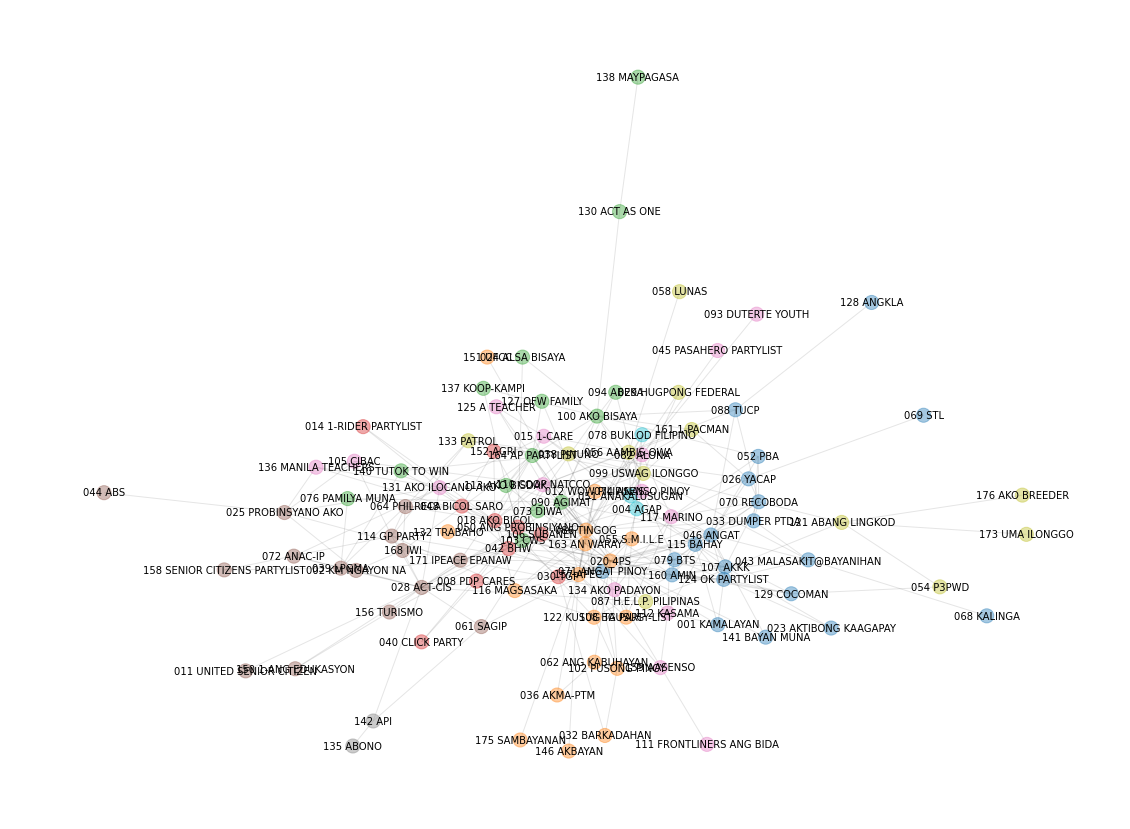

In [503]:
# pos = nx.kamada_kawai_layout(plist_G)
pos = nx.spring_layout(plist_G, iterations=250)

plt.figure(figsize=(20, 15))
plt.axis("off")
# nx.draw_networkx_nodes(plist_G, pos, node_size=10)

nx.draw_networkx_nodes(plist_G, pos, node_size=200, alpha=0.4, cmap='tab10',
                       node_color=list(plist_partition.values()))

nx.draw_networkx_edges(plist_G, pos, alpha=0.1)
nx.draw_networkx_labels(plist_G, pos, font_color="black", font_size=10)
plt.show()

In [504]:
# Association Pattern Mining

report_plist = fim.fpgrowth(df_plist_edges.to_list(), target='r', supp=10, conf=5, report='l')
report_plist.sort(key=lambda x: x[2], reverse=True)
report_plist

[('048 BICOL SARO', ('018 AKO BICOL',), 7.476744186046512),
 ('042 BHW', ('018 AKO BICOL',), 7.0832313341493265),
 ('030 TGP', ('018 AKO BICOL',), 5.75134168157424),
 ('086 TINGOG', ('163 AN WARAY',), 5.144596474953618),
 ('163 AN WARAY', ('086 TINGOG',), 5.144596474953618),
 ('157 APEC', ('163 AN WARAY', '086 TINGOG'), 4.555877616747182),
 ('157 APEC', ('163 AN WARAY',), 4.453679653679654),
 ('157 APEC', ('086 TINGOG',), 3.6998015873015873),
 ('020 4PS', ('163 AN WARAY',), 2.833256029684601),
 ('020 4PS', ('086 TINGOG',), 2.768016581632653),
 ('020 4PS', ('163 AN WARAY', '086 TINGOG'), 2.49611801242236),
 ('050 ANG PROBINSIYANO', ('018 AKO BICOL',), 2.3498338870431894),
 ('050 ANG PROBINSIYANO', ('086 TINGOG',), 1.3122448979591836),
 ('086 TINGOG', (), 1.0),
 ('163 AN WARAY', (), 1.0),
 ('018 AKO BICOL', (), 1.0),
 ('020 4PS', (), 1.0),
 ('099 USWAG ILONGGO', (), 1.0),
 ('157 APEC', (), 1.0),
 ('028 ACT-CIS', (), 1.0),
 ('046 ANGAT', (), 1.0),
 ('056 AAMBIS-OWA', (), 1.0),
 ('048 BICO

## GeoPandas Pre-Processing

In [528]:
phil_map = gpd.read_file('phl_adminboundaries/phl_admbnda_adm3_psa_namria_20200529.shp')

In [571]:
phil_map['ADM1_EN'] = phil_map['ADM1_EN'].str.upper()
phil_map['ADM2_EN'] = phil_map['ADM2_EN'].str.upper()
phil_map['ADM3_EN'] = phil_map['ADM3_EN'].str.upper()

phil_map['ADM1_EN'] = phil_map['ADM1_EN'].str.replace('Ñ', 'Ñ')
phil_map['ADM2_EN'] = phil_map['ADM2_EN'].str.replace('Ñ', 'Ñ')
phil_map['ADM3_EN'] = phil_map['ADM3_EN'].str.replace('Ñ', 'Ñ')

phil_map['ADM1_EN'] = (phil_map['ADM1_EN'].
                       apply(lambda x: 'BARMM' if x=='AUTONOMOUS REGION IN MUSLIM MINDANAO' else x))

phil_map['ADM2_EN'] = (phil_map['ADM2_EN'].
                       apply(lambda x: 'NCR - FOURTH DISTRICT' if x=='NCR, FOURTH DISTRICT' else x))
phil_map['ADM2_EN'] = (phil_map['ADM2_EN'].
                       apply(lambda x: 'NCR - MANILA' if x=='NCR, CITY OF MANILA, FIRST DISTRICT' else x))
phil_map['ADM2_EN'] = (phil_map['ADM2_EN'].
                       apply(lambda x: 'NCR - SECOND DISTRICT' if x=='NCR, SECOND DISTRICT' else x))
phil_map['ADM2_EN'] = (phil_map['ADM2_EN'].
                       apply(lambda x: 'NCR - THIRD DISTRICT' if x=='NCR, THIRD DISTRICT' else x))
phil_map['ADM2_EN'] = (phil_map['ADM2_EN'].
                       apply(lambda x: 'DAVAO DE ORO' if x=='COMPOSTELA VALLEY' else x))

phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF MARAWI' if x=='MARAWI CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BAGUIO' if x=='BAGUIO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'TONDO' if x=='TONDO I / II' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CALOOCAN' if x=='CALOOCAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TAGUIG' if x=='TAGUIG CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LAOAG' if x=='LAOAG CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF SAN CARLOS' if x=='SAN CARLOS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF DAGUPAN' if x=='DAGUPAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ILAGAN' if x=='ILAGAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CABANATUAN' if x=='CABANATUAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF PALAYAN' if x=='PALAYAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ANGELES' if x=='ANGELES CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF OLONGAPO' if x=='OLONGAPO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LIPA' if x=='LIPA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BACOOR' if x=='BACOOR CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CAVITE' if x=='CAVITE CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF IMUS' if x=='IMUS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TAGAYTAY' if x=='TAGAYTAY CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TRECE MARTIRES' if x=='TRECE MARTIRES CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CABUYAO' if x=='CABUYAO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF SAN PABLO' if x=='SAN PABLO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LUCENA' if x=='LUCENA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF DAPITAN' if x=='DAPITAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF DIPOLOG' if x=='DIPOLOG CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF PAGADIAN' if x=='PAGADIAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ZAMBOANGA' if x=='ZAMBOANGA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LEGAZPI' if x=='LEGAZPI CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF IRIGA' if x=='IRIGA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF NAGA' if x=='NAGA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ROXAS' if x=='ROXAS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ILOILO' if x=='ILOILO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BACOLOD' if x=='BACOLOD CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BAGO' if x=='BAGO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CADIZ' if x=='CADIZ CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LA CARLOTA' if x=='LA CARLOTA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF SAGAY' if x=='SAGAY CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF SILAY' if x=='SILAY CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TAGBILARAN' if x=='TAGBILARAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CEBU' if x=='CEBU CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF LAPU-LAPU' if x=='LAPU-LAPU CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF MANDAUE' if x=='MANDAUE CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TOLEDO' if x=='TOLEDO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BAIS' if x=='BAIS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CANLAON' if x=='CANLAON CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF DUMAGUETE' if x=='DUMAGUETE CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CALBAYOG' if x=='CALBAYOG CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF ILIGAN' if x=='ILIGAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF OROQUIETA' if x=='OROQUIETA CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF OZAMIS' if x=='OZAMIS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TANGUB' if x=='TANGUB CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF CAGAYAN DE ORO' if x=='CAGAYAN DE ORO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF TACLOBAN' if x=='TACLOBAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF GINGOOG' if x=='GINGOOG CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF DAVAO' if x=='DAVAO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF COTABATO' if x=='COTABATO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF GENERAL SANTOS' if x=='GENERAL SANTOS CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF BUTUAN' if x=='BUTUAN CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF SURIGAO' if x=='SURIGAO CITY' else x))
phil_map['ADM3_EN'] = (phil_map['ADM3_EN'].
                       apply(lambda x: 'CITY OF PUERTO PRINCESA' if x=='PUERTO PRINCESA CITY' else x))

phil_geom = phil_map.set_index(['ADM1_EN', 'ADM2_EN', 'ADM3_EN'])[['geometry']]
phil_geom = phil_geom.sort_index()

In [812]:
ph_geom_plots = phil_geom.copy()
ph_geom_plots['turn-out'] = df_pres_stats_pivot['turn-out']
ph_geom_plots['pres fillup'] = df_pres_stats_pivot['fillup-rate']
ph_geom_plots['vp fillup'] = df_vp_stats_pivot['fillup-rate']
ph_geom_plots['sen fillup'] = df_sen_stats_pivot['fillup-rate']
ph_geom_plots['plist fillup'] = df_plist_stats_pivot['fillup-rate']

ph_geom_plots['president'] = df_pres_results_pivot.idxmax(axis=1)
ph_geom_plots['vp'] = df_vp_results_pivot.idxmax(axis=1)
ph_geom_plots['senator'] = df_sen_results_pivot.idxmax(axis=1)
ph_geom_plots['partylist'] = df_plist_results_pivot.idxmax(axis=1)

winning_sen = (df_senator_results.groupby('candidate_name')['votes'].
               sum().sort_values(ascending=False).iloc[:12].index)
ph_geom_plots['sen_won'] = df_sen_results_pivot[winning_sen].idxmax(axis=1)

winning_plists = (df_plist_results.groupby('candidate_name')['votes'].
                  sum().sort_values(ascending=False).iloc[:55].index)
ph_geom_plots['plist_won'] = df_plist_results_pivot[winning_plists].idxmax(axis=1)

ph_geom_plots['MARCOS, BONGBONG (PFP)'] = df_merge['MARCOS, BONGBONG (PFP)']
ph_geom_plots['ROBREDO, LENI (IND)'] = df_merge['ROBREDO, LENI (IND)']
ph_geom_plots['PACQUIAO, MANNY PACMAN(PROMDI)'] = df_merge['PACQUIAO, MANNY PACMAN(PROMDI)']
ph_geom_plots['MANGONDATO, FAISAL (KTPNAN)'] = df_merge['MANGONDATO, FAISAL (KTPNAN)']

ph_geom_plots['DUTERTE, SARA (LAKAS)'] = df_merge['DUTERTE, SARA (LAKAS)']
ph_geom_plots['PANGILINAN, KIKO (LP)'] = df_merge['PANGILINAN, KIKO (LP)']
ph_geom_plots['SOTTO, VICENTE TITO (NPC)'] = df_merge['SOTTO, VICENTE TITO (NPC)']

ph_geom_plots['cluster'] = df_clusters['cluster']

for col in ph_geom_plots.columns[1:6]:
    ph_geom_plots[col] = ph_geom_plots[col].fillna(value=ph_geom_plots[col].mean())

for col in ph_geom_plots.columns[6:12]:
    ph_geom_plots[col] = ph_geom_plots[col].fillna(value=ph_geom_plots[col].mode().squeeze())
    
for col in ph_geom_plots.columns[12:-1]:
    ph_geom_plots[col] = ph_geom_plots[col].fillna(value=ph_geom_plots[col].mean())

ph_geom_plots

geometry  \
ADM1_EN     ADM2_EN         ADM3_EN                                                                  
BARMM       BASILAN         AKBAR                MULTIPOLYGON (((122.26340 6.61836, 122.26332 6...   
                            AL-BARKA             MULTIPOLYGON (((122.17464 6.45347, 122.17472 6...   
                            CITY OF LAMITAN      MULTIPOLYGON (((122.14259 6.68007, 122.14260 6...   
                            HADJI MOHAMMAD AJUL  MULTIPOLYGON (((122.20620 6.66618, 122.20623 6...   
                            HADJI MUHTAMAD       MULTIPOLYGON (((121.69193 6.58606, 121.69195 6...   
...                                                                                            ...   
REGION XIII SURIGAO DEL SUR MARIHATAG            POLYGON ((126.26827 8.86879, 126.26861 8.86877...   
                            SAN AGUSTIN          POLYGON ((126.25032 8.76792, 126.25030 8.76792...   
                            SAN MIGUEL           POLYGON ((126.03949 9.08540, 126.04258 9.07518...   
                            TAGBINA              POLYGON ((126.28682 8.50707, 126.27508 8.49037...   
                            TAGO                 POLYGON ((126.05457 9.08573, 126.10911 8.99633...   

                                                 turn-out  pres fillup  \
ADM1_EN     ADM2_EN         ADM3_EN                                      
BARMM       BASILAN         AKBAR                0.809555     0.977971   
                            AL-BARKA             0.728685     0.924479   
                            CITY OF LAMITAN      0.831352     0.967634   
                            HADJI MOHAMMAD AJUL  0.824006     0.962552   
                            HADJI MUHTAMAD       0.750286     0.923890   
...                                                   ...          ...   
REGION XIII SURIGAO DEL SUR MARIHATAG            0.881675     0.911837   
                            SAN AGUSTIN          0.856756     0.929842   
                            SAN MIGUEL           0.869824     0.927173   
                            TAGBINA              0.876543     0.910690   
                            TAGO                 0.870835     0.934798   

                                                 vp fillup  sen fillup  \
ADM1_EN     ADM2_EN         ADM3_EN                                      
BARMM       BASILAN         AKBAR                 0.975177    0.284207   
                            AL-BARKA              0.894797    0.235417   
                            CITY OF LAMITAN       0.945224    0.499592   
                            HADJI MOHAMMAD AJUL   0.948103    0.185800   
                            HADJI MUHTAMAD        0.877816    0.231153   
...                                                    ...         ...   
REGION XIII SURIGAO DEL SUR MARIHATAG             0.875865    0.448687   
                            SAN AGUSTIN           0.908895    0.495180   
                            SAN MIGUEL            0.886713    0.455731   
                            TAGBINA               0.849100    0.483941   
                            TAGO                  0.900389    0.488179   

                                                 plist fillup  \
ADM1_EN     ADM2_EN         ADM3_EN                             
BARMM       BASILAN         AKBAR                    0.652967   
                            AL-BARKA                 0.500917   
                            CITY OF LAMITAN          0.610451   
                            HADJI MOHAMMAD AJUL      0.677118   
                            HADJI MUHTAMAD           0.533028   
...                                                       ...   
REGION XIII SURIGAO DEL SUR MARIHATAG                0.597233   
                            SAN AGUSTIN              0.592453   
                            SAN MIGUEL               0.597900   
                            TAGBINA                  0.541806   
                            TAGO                     0.59

In [823]:
# ph_geom_plots[ph_geom_plots['cluster'].isna()]

In [822]:
# ph_geom_plots.reset_index()[ph_geom_plots.reset_index()['ADM2_EN']=='BOHOL']

In [575]:
# phil_map[phil_map['ADM2_EN']=='COMPOSTELA VALLEY']['ADM3_EN'].value_counts().sort_index()

In [576]:
# df_pres_results[df_pres_results['prov']=='DAVAO DE ORO']['mun'].value_counts().sort_index()

In [ ]:
# df_pres_stats_pivot.drop('OAV', level=0, axis=0)

In [671]:
countries = df_pres_stats_pivot[df_pres_stats_pivot.index.get_level_values('reg')=='OAV'].reset_index()['mun'].to_list()
len(countries)

22

In [706]:
world_map = gpd.read_file('world-administrative-boundaries/world-administrative-boundaries.shp')
world_map = world_map[['name', 'geometry']]
world_map['name'] = world_map['name'].str.upper()

world_map['name'] = world_map['name'].apply(lambda x: 'AGANA' if x=='GUAM' else x)
world_map['name'] = world_map['name'].apply(lambda x: 'KINGDOM OF THAILAND' if x=='THAILAND' else x)
world_map['name'] = world_map['name'].apply(lambda x: 'REPUBLIC OF KOREA' if x=="DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'REPUBLIC OF SINGAPORE' if x=="SINGAPORE" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'TAIWAN, ROC' if x=="TAIWAN" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'ATHENS' if x=="GREECE" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'KINGDOM OF SPAIN' if x=="SPAIN" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'UNITED KINGDOM OF GREAT BRITAIN' if x=="U.K. OF GREAT BRITAIN AND NORTHERN IRELAND" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'KINGDOM OF BAHRAIN' if x=="BAHRAIN" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'KINGDOM OF SAUDI ARABIA' if x=="SAUDI ARABIA" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'REPUBLIC OF LEBANON' if x=="LEBANON" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'STATE OF KUWAIT' if x=="KUWAIT" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'STATE OF QATAR' if x=="QATAR" else x)
world_map['name'] = world_map['name'].apply(lambda x: 'SULTANATE OF OMAN' if x=="OMAN" else x)

world_map = world_map[world_map['name'].isin(countries)].set_index('name')
world_map

geometry
name                                                                              
ITALY                            MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...
UNITED ARAB EMIRATES             MULTIPOLYGON (((53.96486 24.17944, 53.95500 24...
STATE OF KUWAIT                  MULTIPOLYGON (((48.22832 29.59528, 48.20277 29...
AUSTRALIA                        MULTIPOLYGON (((158.88217 -54.71139, 158.87966...
CANADA                           MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ...
STATE OF QATAR                   POLYGON ((51.26349 24.61317, 51.09976 24.47333...
KINGDOM OF SAUDI ARABIA          MULTIPOLYGON (((41.94500 16.71083, 41.95777 16...
TAIWAN, ROC                      MULTIPOLYGON (((118.42095 24.39763, 118.28713 ...
JAPAN                            MULTIPOLYGON (((123.87289 24.25389, 123.86194 ...
KINGDOM OF THAILAND              MULTIPOLYGON (((99.66804 6.49639, 99.65263 6.4...
REPUBLIC OF LEBANON              POLYGON ((35.97277 34.64750, 36.03083 34.63250...
REPUBLIC OF KOREA                POLYGON ((130.69742 42.29221, 130.68234 42.279...
AGANA                            POLYGON ((144.70941 13.23500, 144.70245 13.235...
UNITED STATES OF AMERICA         MULTIPOLYGON (((-155.00558 19.32888, -155.1453...
REPUBLIC OF SINGAPORE            POLYGON ((103.95997 1.32083, 103.84192 1.25903...
UNITED KINGDOM OF GREAT BRITAIN  MULTIPOLYGON (((-1.05972 50.68749, -1.16833 50...
ATHENS                           MULTIPOLYGON (((23.84854 35.52298, 23.97139 35...
KINGDOM OF BAHRAIN               MULTIPOLYGON (((50.76138 25.59805, 50.77194 25...
KINGDOM OF SPAIN                 MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...
SULTANATE OF OMAN                MULTIPOLYGON (((58.84514 20.44319, 58.82417 20...
REPUBLIC OF KOREA                MULTIPOLYGON (((126.62221 33.23999, 126.59943 ...
MALAYSIA                         MULTIPOLYGON (((111.41152 2.37639, 111.36804 2...

In [716]:
df_pres_stats_oav = df_pres_stats_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_pres_stats_oav = df_pres_stats_oav[df_pres_stats_oav.index.isin(countries)]
df_pres_results_oav = df_pres_results_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_pres_results_oav = df_pres_results_oav[df_pres_results_oav.index.isin(countries)]

df_vp_stats_oav = df_vp_stats_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_vp_stats_oav = df_vp_stats_oav[df_vp_stats_oav.index.isin(countries)]
df_vp_results_oav = df_vp_results_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_vp_results_oav = df_vp_results_oav[df_vp_results_oav.index.isin(countries)]

df_sen_stats_oav = df_sen_stats_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_sen_stats_oav = df_sen_stats_oav[df_sen_stats_oav.index.isin(countries)]
df_sen_results_oav = df_sen_results_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_sen_results_oav = df_sen_results_oav[df_sen_results_oav.index.isin(countries)]

df_plist_stats_oav = df_plist_stats_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_plist_stats_oav = df_plist_stats_oav[df_plist_stats_oav.index.isin(countries)]
df_plist_results_oav = df_plist_results_pivot.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_plist_results_oav = df_plist_results_oav[df_plist_results_oav.index.isin(countries)]

df_merge_oav = df_merge.reset_index().drop(columns=['reg', 'prov']).set_index('mun')
df_merge_oav = df_merge_oav[df_merge_oav.index.isin(countries)]

In [717]:
world_map_plots = world_map.copy()
world_map_plots['turn-out'] = df_pres_stats_oav['turn-out']
world_map_plots['pres fillup'] = df_pres_stats_oav['fillup-rate']
world_map_plots['vp fillup'] = df_vp_stats_oav['fillup-rate']
world_map_plots['sen fillup'] = df_sen_stats_oav['fillup-rate']
world_map_plots['plist fillup'] = df_plist_stats_oav['fillup-rate']

world_map_plots['president'] = df_pres_results_oav.idxmax(axis=1)
world_map_plots['vp'] = df_vp_results_oav.idxmax(axis=1)
world_map_plots['partylist'] = df_plist_results_oav.idxmax(axis=1)
world_map_plots['plist_won'] = df_plist_results_oav[winning_plists].idxmax(axis=1)

world_map_plots['MARCOS, BONGBONG (PFP)'] = df_merge_oav['MARCOS, BONGBONG (PFP)']
world_map_plots['DUTERTE, SARA (LAKAS)'] = df_merge_oav['DUTERTE, SARA (LAKAS)']

world_map_plots

geometry  \
name                                                                                 
ITALY                            MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...   
UNITED ARAB EMIRATES             MULTIPOLYGON (((53.96486 24.17944, 53.95500 24...   
STATE OF KUWAIT                  MULTIPOLYGON (((48.22832 29.59528, 48.20277 29...   
AUSTRALIA                        MULTIPOLYGON (((158.88217 -54.71139, 158.87966...   
CANADA                           MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ...   
STATE OF QATAR                   POLYGON ((51.26349 24.61317, 51.09976 24.47333...   
KINGDOM OF SAUDI ARABIA          MULTIPOLYGON (((41.94500 16.71083, 41.95777 16...   
TAIWAN, ROC                      MULTIPOLYGON (((118.42095 24.39763, 118.28713 ...   
JAPAN                            MULTIPOLYGON (((123.87289 24.25389, 123.86194 ...   
KINGDOM OF THAILAND              MULTIPOLYGON (((99.66804 6.49639, 99.65263 6.4...   
REPUBLIC OF LEBANON              POLYGON ((35.97277 34.64750, 36.03083 34.63250...   
REPUBLIC OF KOREA                POLYGON ((130.69742 42.29221, 130.68234 42.279...   
AGANA                            POLYGON ((144.70941 13.23500, 144.70245 13.235...   
UNITED STATES OF AMERICA         MULTIPOLYGON (((-155.00558 19.32888, -155.1453...   
REPUBLIC OF SINGAPORE            POLYGON ((103.95997 1.32083, 103.84192 1.25903...   
UNITED KINGDOM OF GREAT BRITAIN  MULTIPOLYGON (((-1.05972 50.68749, -1.16833 50...   
ATHENS                           MULTIPOLYGON (((23.84854 35.52298, 23.97139 35...   
KINGDOM OF BAHRAIN               MULTIPOLYGON (((50.76138 25.59805, 50.77194 25...   
KINGDOM OF SPAIN                 MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...   
SULTANATE OF OMAN                MULTIPOLYGON (((58.84514 20.44319, 58.82417 20...   
REPUBLIC OF KOREA                MULTIPOLYGON (((126.62221 33.23999, 126.59943 ...   
MALAYSIA                         MULTIPOLYGON (((111.41152 2.37639, 111.36804 2...   

                                 turn-out  pres fillup  vp fillup  sen fillup  \
name                                                                            
ITALY                            0.445319     0.993241   0.984940    0.877115   
UNITED ARAB EMIRATES             0.699171     0.995260   0.993789    0.882092   
STATE OF KUWAIT                  0.295226     0.991805   0.988309    0.864811   
AUSTRALIA                        0.441250     0.995685   0.993580    0.905773   
CANADA                           0.428593     0.995387   0.991838    0.892625   
STATE OF QATAR                   0.612488     0.996152   0.995519    0.893307   
KINGDOM OF SAUDI ARABIA          0.215216     0.994893   0.993046    0.875743   
TAIWAN, ROC                      0.364006     0.997320   0.994942    0.853607   
JAPAN                            0.482908     0.991148   0.986886    0.910259   
KINGDOM OF THAILAND              0.585472     0.996518   0.993986    0.915823   
REPUBLIC OF LEBANON              0.312572     0.990698   0.983599    0.829682   
REPUBLIC OF KOREA                0.480973     0.997284   0.993888    0.876061   
AGANA                            0.442691     0.992457   0.986988    0.886762   
UNITED STATES OF AMERICA         0.377263     0.994297   0.988762    0.876109   
REPUBLIC OF SINGAPORE            0.623349     0.995483   0.993990    0.890297   
UNITED KINGDOM OF GREAT BRITAIN  0.521943     0.992718   0.987802    0.895263   
ATHENS                           0.261175     0.993280   0.991487    0.897401   
KINGDOM OF BAHRAIN               0.480688     0.993041   0.989526    0.879786   
KINGDOM OF SPAIN                 0.452988     0.990627   0.985146    0.843342   
SULTANATE OF OMAN                0.360000     0.990700   0.984949    0.840155   
REPUBLIC OF KOREA                0.480973     0.997284   0.993888    0.876061   
MALAYSIA                         0.401432     0.993247   0.989610    0.879798   

                                 plist fillup               pres

## Prepping stats and maps

### Turnout

In [577]:
# Total turnout
df_pres_stats_pivot['valid-votes'].sum() / df_pres_stats_pivot['expected-voters'].sum()

0.834438617462354

In [578]:
df_vp_stats_pivot['valid-votes'].sum() / df_vp_stats_pivot['expected-voters'].sum()

0.834438617462354

In [579]:
df_sen_stats_pivot['processed-count'].sum() / df_sen_stats_pivot['expected-voters'].sum()

0.834438617462354

In [580]:
df_plist_stats_pivot['valid-votes'].sum() / df_plist_stats_pivot['expected-voters'].sum()

0.834438617462354

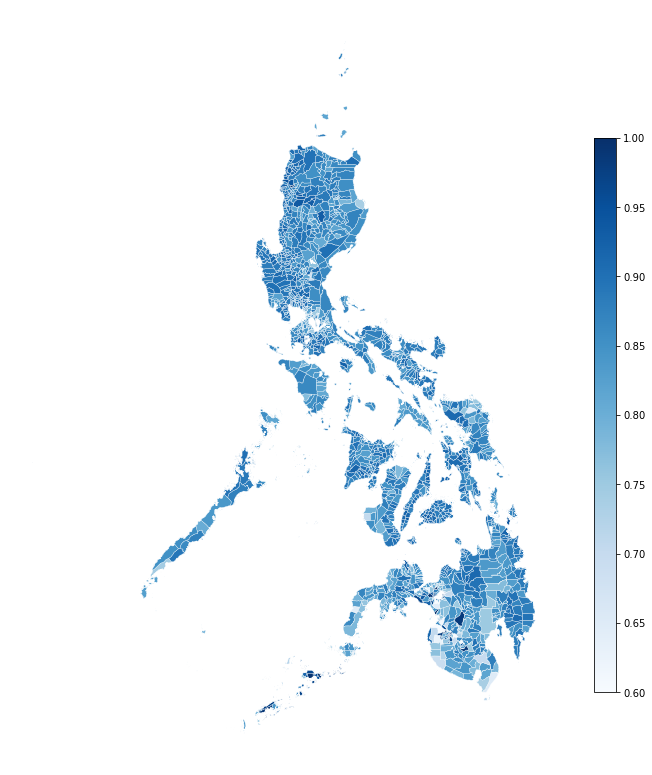

In [627]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='turn-out',
                   edgecolor='white',
                   linewidth=0.3,
                   categorical=False,
#                    legend=True,
                   cmap='Blues',
                   vmin=0.6,
                   ax=ax)
ax.axis('off')

cax = fig.add_axes([0.82, 0.2, 0.022, 0.55])
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0.6, vmax=1))

cbar = fig.colorbar(sm, cax=cax, aspect=12)

plt.show()

### Fillup Rate

In [1016]:
print('Total fill-up rate - Pres')
print(df_pres_stats_pivot['votes-obtained-by-all-candidates'].sum() / df_pres_stats_pivot['valid-votes'].sum())
print('\nTotal fill-up rate - VP')
print(df_vp_stats_pivot['votes-obtained-by-all-candidates'].sum() / df_vp_stats_pivot['valid-votes'].sum())
print('\nTotal fill-up rate - Senator')
print(df_sen_stats_pivot['votes-obtained-by-all-candidates'].sum() / df_sen_stats_pivot['valid-votes'].sum())
print('\nTotal fill-up rate - Partylist')
print(df_plist_stats_pivot['votes-obtained-by-all-candidates'].sum() / df_plist_stats_pivot['valid-votes'].sum())

Total fill-up rate - Pres
0.9593357377677895

Total fill-up rate - VP
0.9330203053318088

Total fill-up rate - Senator
0.6453612354963751

Total fill-up rate - Partylist
0.6547156931773698


In [ ]:
# print('Total undervote rate - Pres')
# print(df_pres_stats_pivot['undervote-count'].sum() / df_pres_stats_pivot['valid-votes'].sum())
# print('\nTotal undervote rate - VP')
# print(df_vp_stats_pivot['undervote-count'].sum() / df_vp_stats_pivot['valid-votes'].sum())
# print('\nTotal undervote rate - Senator')
# print(df_sen_stats_pivot['undervote-count'].sum() / df_sen_stats_pivot['valid-votes'].sum())
# print('\nTotal undervote rate - Partylist')
# print(df_plist_stats_pivot['undervote-count'].sum() / df_plist_stats_pivot['valid-votes'].sum())

In [1059]:
# print('Total overvote rate - Pres')
# print(df_pres_stats_pivot['overvote-count'].sum() / df_pres_stats_pivot['valid-votes'].sum())
# print('\nTotal overvote rate - VP')
# print(df_vp_stats_pivot['overvote-count'].sum() / df_vp_stats_pivot['valid-votes'].sum())
# print('\nTotal overvote rate - Senator')
# print(df_vp_stats_pivot['overvote-count'].sum() / df_sen_stats_pivot['valid-votes'].sum())
# print('\nTotal overvote rate - Partylist')
# print(df_plist_stats_pivot['overvote-count'].sum() / df_plist_stats_pivot['valid-votes'].sum())

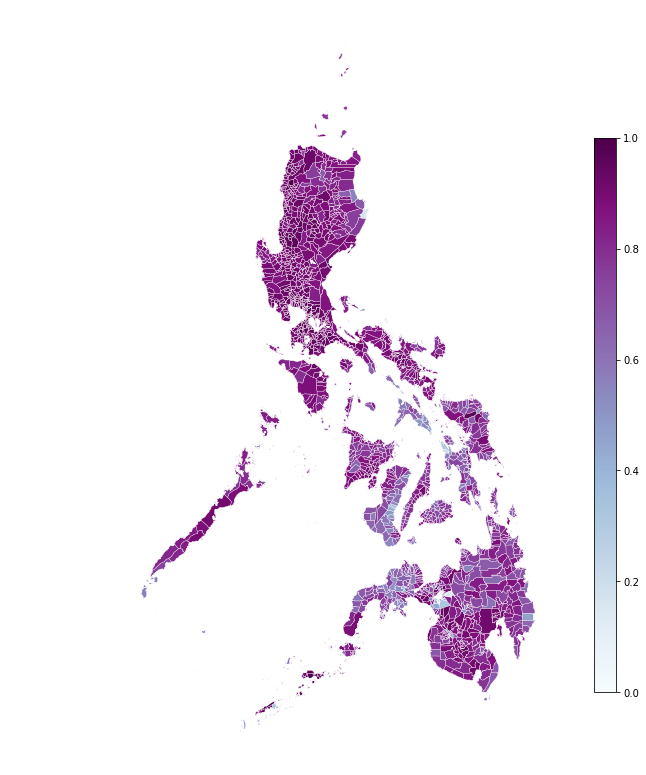

In [628]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='pres fillup',
                   edgecolor='white',
                   linewidth=0.3,
                   categorical=False,
#                    legend=True,
                   cmap='BuPu',
                   ax=ax)
ax.axis('off')

cax = fig.add_axes([0.82, 0.2, 0.022, 0.55])
sm = plt.cm.ScalarMappable(cmap='BuPu')

cbar = fig.colorbar(sm, cax=cax, aspect=12)

plt.show()

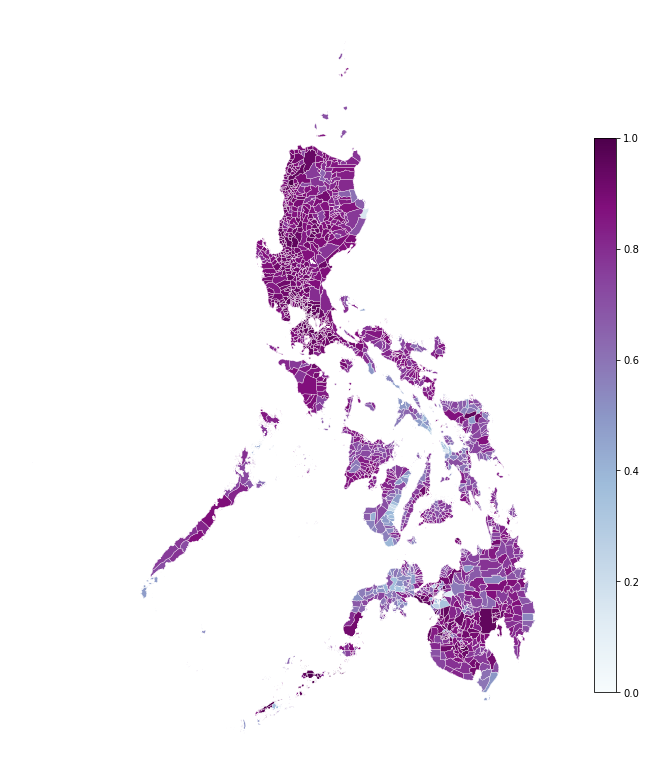

In [629]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='vp fillup',
                   edgecolor='white',
                   linewidth=0.3,
                   categorical=False,
#                    legend=True,
                   cmap='BuPu',
                   ax=ax)
ax.axis('off')

cax = fig.add_axes([0.82, 0.2, 0.022, 0.55])
sm = plt.cm.ScalarMappable(cmap='BuPu')

cbar = fig.colorbar(sm, cax=cax, aspect=12)

plt.show()

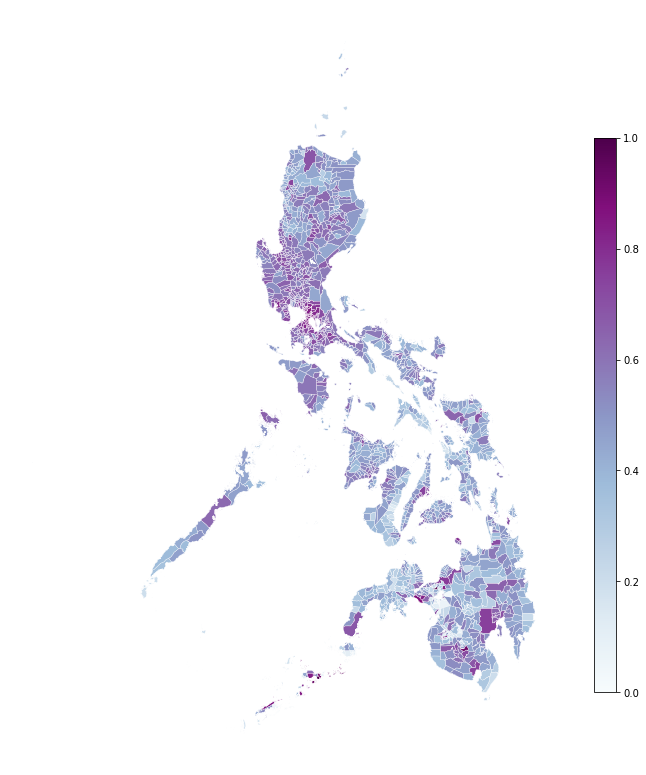

In [630]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='sen fillup',
                   edgecolor='white',
                   linewidth=0.3,
                   categorical=False,
#                    legend=True,
                   cmap='BuPu',
                   ax=ax)
ax.axis('off')

cax = fig.add_axes([0.82, 0.2, 0.022, 0.55])
sm = plt.cm.ScalarMappable(cmap='BuPu')

cbar = fig.colorbar(sm, cax=cax, aspect=12)



plt.show()

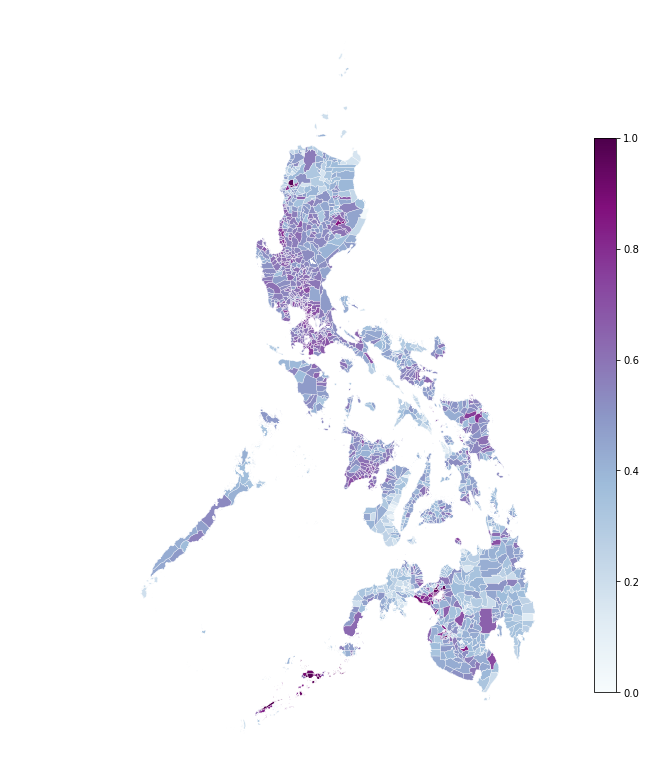

In [631]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='plist fillup',
                   edgecolor='white',
                   linewidth=0.3,
                   categorical=False,
#                    legend=True,
                   cmap='BuPu',
                   ax=ax)
ax.axis('off')

cax = fig.add_axes([0.82, 0.2, 0.022, 0.55])
sm = plt.cm.ScalarMappable(cmap='BuPu')

cbar = fig.colorbar(sm, cax=cax, aspect=12)

plt.show()

### Presidential Race

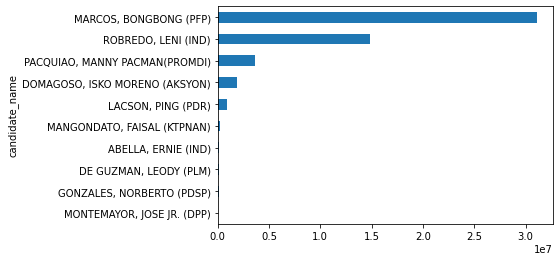

candidate_name
MARCOS, BONGBONG (PFP)            31074121
ROBREDO, LENI (IND)               14801171
PACQUIAO, MANNY PACMAN(PROMDI)     3628722
DOMAGOSO, ISKO MORENO (AKSYON)     1893135
LACSON, PING (PDR)                  881537
MANGONDATO, FAISAL (KTPNAN)         257371
ABELLA, ERNIE (IND)                 113172
DE GUZMAN, LEODY (PLM)               91998
GONZALES, NORBERTO (PDSP)            88996
MONTEMAYOR, JOSE JR. (DPP)           59896
Name: votes, dtype: int64

candidate_name
MARCOS, BONGBONG (PFP)            0.587522
ROBREDO, LENI (IND)               0.279848
PACQUIAO, MANNY PACMAN(PROMDI)    0.068609
DOMAGOSO, ISKO MORENO (AKSYON)    0.035794
LACSON, PING (PDR)                0.016667
MANGONDATO, FAISAL (KTPNAN)       0.004866
ABELLA, ERNIE (IND)               0.002140
DE GUZMAN, LEODY (PLM)            0.001739
GONZALES, NORBERTO (PDSP)         0.001683
MONTEMAYOR, JOSE JR. (DPP)        0.001132
Name: votes, dtype: float64


In [744]:
df_pres_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=True).plot(kind='barh')
plt.show()

print(df_pres_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False))
print()
print(df_pres_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False) / df_pres_results['votes'].sum())

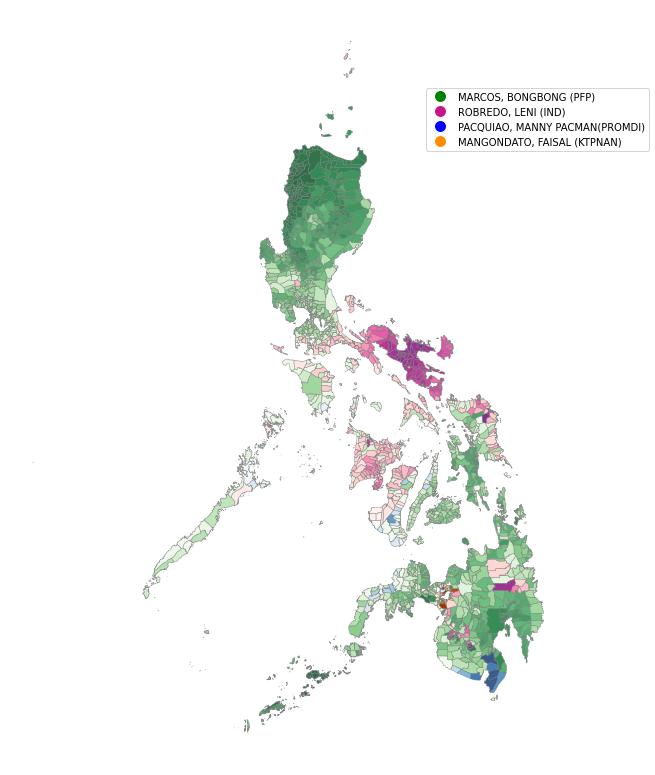

In [740]:
bbm = ph_geom_plots[ph_geom_plots['president']=='MARCOS, BONGBONG (PFP)'].copy()
leni = ph_geom_plots[ph_geom_plots['president']=='ROBREDO, LENI (IND)'].copy()
manny = ph_geom_plots[ph_geom_plots['president']=='PACQUIAO, MANNY PACMAN(PROMDI)'].copy()
faisal = ph_geom_plots[ph_geom_plots['president']=='MANGONDATO, FAISAL (KTPNAN)'].copy()

fig, ax = plt.subplots(figsize=(14,14))

bbm.plot(column='MARCOS, BONGBONG (PFP)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)

leni.plot(column='ROBREDO, LENI (IND)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='RdPu',
                   alpha=0.8,
                   ax=ax)

manny.plot(column='PACQUIAO, MANNY PACMAN(PROMDI)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Blues',
                   alpha=0.8,
                   ax=ax)

faisal.plot(column='MANGONDATO, FAISAL (KTPNAN)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Oranges',
                   ax=ax)

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          label='MARCOS, BONGBONG (PFP)',
                          markerfacecolor='green', markersize=12),
                   Line2D([0], [0], marker='o', color='w',
                          label='ROBREDO, LENI (IND)',
                          markerfacecolor='mediumvioletred', markersize=12),
                   Line2D([0], [0], marker='o', color='w',
                          label='PACQUIAO, MANNY PACMAN(PROMDI)',
                          markerfacecolor='blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w',
                          label='MANGONDATO, FAISAL (KTPNAN)',
                          markerfacecolor='darkorange', markersize=12)]

ax.axis('off')
ax.legend(handles=legend_elements, bbox_to_anchor=(1.15, 0.9))

plt.show()

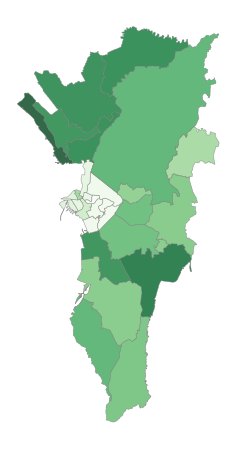

In [741]:
bbm_ncr = bbm[bbm.index.get_level_values('ADM1_EN')=='NATIONAL CAPITAL REGION'].copy()

fig, ax = plt.subplots(figsize=(8, 8))

bbm_ncr.plot(column='MARCOS, BONGBONG (PFP)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)

ax.axis('off')

plt.show()

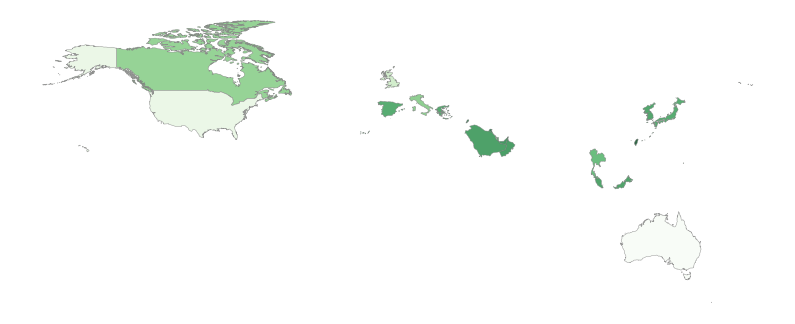

In [742]:
fig, ax = plt.subplots(figsize=(14,14))

world_map_plots.plot(column='MARCOS, BONGBONG (PFP)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)


ax.axis('off')

plt.show()

### Vice-Presidential Race

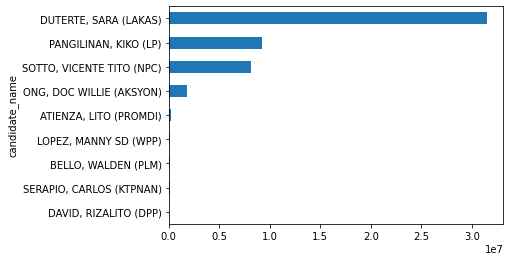

candidate_name
DUTERTE, SARA (LAKAS)        31527165
PANGILINAN, KIKO (LP)         9219628
SOTTO, VICENTE TITO (NPC)     8175584
ONG, DOC WILLIE (AKSYON)      1847039
ATIENZA, LITO (PROMDI)         267263
LOPEZ, MANNY SD (WPP)          157665
BELLO, WALDEN (PLM)             99651
SERAPIO, CARLOS (KTPNAN)        89856
DAVID, RIZALITO (DPP)           55445
Name: votes, dtype: int64

candidate_name
DUTERTE, SARA (LAKAS)        0.612900
PANGILINAN, KIKO (LP)        0.179233
SOTTO, VICENTE TITO (NPC)    0.158937
ONG, DOC WILLIE (AKSYON)     0.035907
ATIENZA, LITO (PROMDI)       0.005196
LOPEZ, MANNY SD (WPP)        0.003065
BELLO, WALDEN (PLM)          0.001937
SERAPIO, CARLOS (KTPNAN)     0.001747
DAVID, RIZALITO (DPP)        0.001078
Name: votes, dtype: float64


In [745]:
df_vp_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=True).plot(kind='barh')
plt.show()

print(df_vp_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False))
print()
print(df_vp_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False) / df_vp_results['votes'].sum())

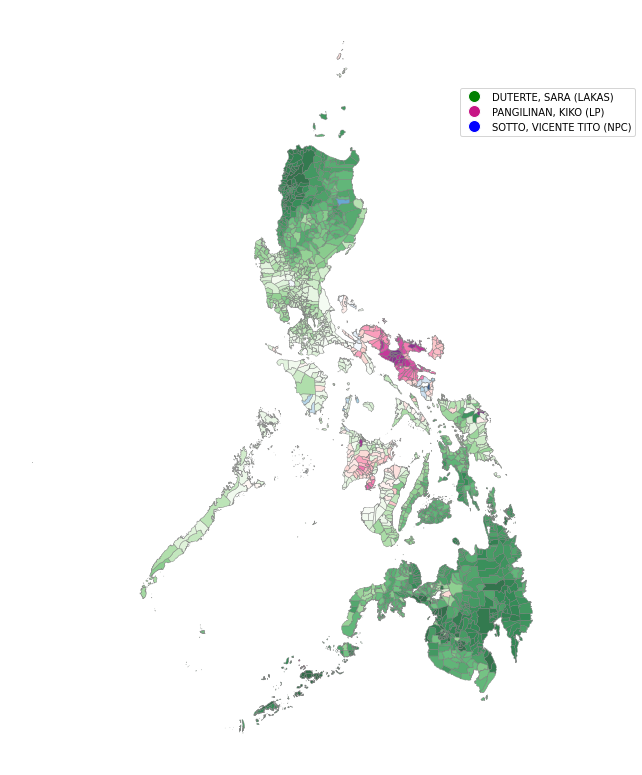

In [739]:
sara = ph_geom_plots[ph_geom_plots['vp']=='DUTERTE, SARA (LAKAS)'].copy()
kiko = ph_geom_plots[ph_geom_plots['vp']=='PANGILINAN, KIKO (LP)'].copy()
tito = ph_geom_plots[ph_geom_plots['vp']=='SOTTO, VICENTE TITO (NPC)'].copy()

fig, ax = plt.subplots(figsize=(14,14))

sara.plot(column='DUTERTE, SARA (LAKAS)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)

kiko.plot(column='PANGILINAN, KIKO (LP)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='RdPu',
                   alpha=0.8,
                   ax=ax)

tito.plot(column='SOTTO, VICENTE TITO (NPC)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Blues',
                   alpha=0.8,
                   ax=ax)

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          label='DUTERTE, SARA (LAKAS)',
                          markerfacecolor='green', markersize=12),
                   Line2D([0], [0], marker='o', color='w',
                          label='PANGILINAN, KIKO (LP)',
                          markerfacecolor='mediumvioletred', markersize=12),
                   Line2D([0], [0], marker='o', color='w',
                          label='SOTTO, VICENTE TITO (NPC)',
                          markerfacecolor='blue', markersize=12)]

ax.axis('off')
ax.legend(handles=legend_elements, bbox_to_anchor=(1.15, 0.9))

plt.show()

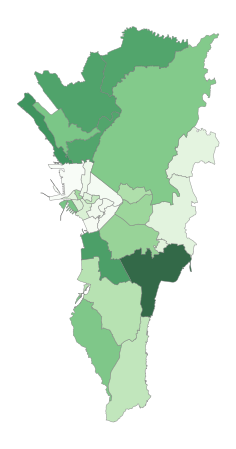

In [712]:
sara_ncr = sara[sara.index.get_level_values('ADM1_EN')=='NATIONAL CAPITAL REGION'].copy()

fig, ax = plt.subplots(figsize=(8, 8))

sara_ncr.plot(column='DUTERTE, SARA (LAKAS)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)

ax.axis('off')

plt.show()

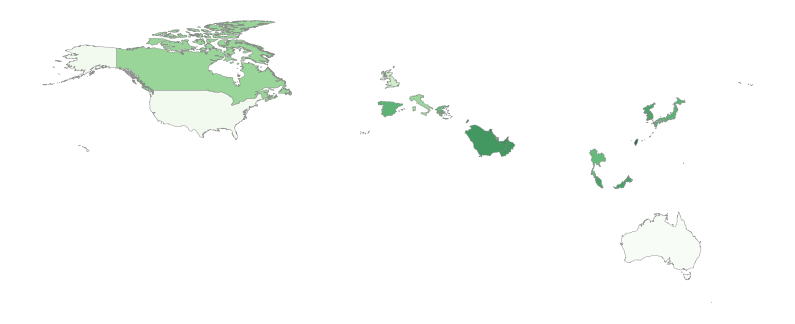

In [746]:
fig, ax = plt.subplots(figsize=(14,14))

world_map_plots.plot(column='DUTERTE, SARA (LAKAS)',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=False,
                   cmap='Greens',
                   alpha=0.8,
                   ax=ax)


ax.axis('off')

plt.show()

### Senate Race

In [752]:
df_sen_stats_pivot.sum().astype(int)

field
votes-obtained-by-all-candidates    426960838
overvote-count                         905646
undervote-count                      32655141
valid-votes                         661584264
expected-voters                      66070794
processed-count                      55132022
fillup-rate                               951
overvote-rate                               1
undervote-rate                             93
turn-out                                 1407
dtype: int64

In [753]:
df_senator_results['votes'].sum()

426960838

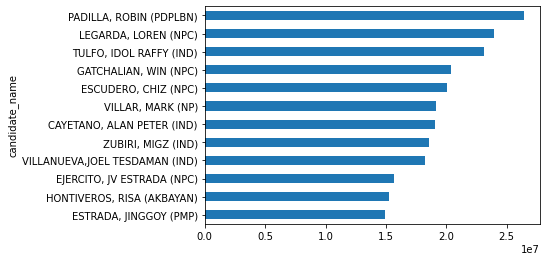

candidate_name
PADILLA, ROBIN (PDPLBN)           26421702
LEGARDA, LOREN (NPC)              23963976
TULFO, IDOL RAFFY (IND)           23140827
GATCHALIAN, WIN (NPC)             20356281
ESCUDERO, CHIZ (NPC)              20024927
VILLAR, MARK (NP)                 19187474
CAYETANO, ALAN PETER (IND)        19059523
ZUBIRI, MIGZ (IND)                18560564
VILLANUEVA,JOEL TESDAMAN (IND)    18282777
EJERCITO, JV ESTRADA (NPC)        15674260
HONTIVEROS, RISA (AKBAYAN)        15254373
ESTRADA, JINGGOY (PMP)            14953664
Name: votes, dtype: int64

By total votes for all candidates
candidate_name
PADILLA, ROBIN (PDPLBN)           0.061883
LEGARDA, LOREN (NPC)              0.056127
TULFO, IDOL RAFFY (IND)           0.054199
GATCHALIAN, WIN (NPC)             0.047677
ESCUDERO, CHIZ (NPC)              0.046901
VILLAR, MARK (NP)                 0.044940
CAYETANO, ALAN PETER (IND)        0.044640
ZUBIRI, MIGZ (IND)                0.043471
VILLANUEVA,JOEL TESDAMAN (IND)    0.042821
EJERCI

In [754]:
df_senator_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=True).iloc[-12:].plot(kind='barh')
plt.show()

# df_senator_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False).iloc[:12]

print(df_senator_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False).iloc[:12])
print()
print('By total votes for all candidates')
print(df_senator_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False).iloc[:12]
      / df_senator_results['votes'].sum())
print()
print('By processed-count')
print(df_senator_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False).iloc[:12]
      / df_sen_stats_pivot['processed-count'].sum())

In [766]:
ph_geom_plots['senator'].value_counts()

PADILLA, ROBIN (PDPLBN)           895
LEGARDA, LOREN (NPC)              257
TULFO, IDOL RAFFY (IND)           195
ESCUDERO, CHIZ (NPC)               68
ZUBIRI, MIGZ (IND)                 48
VILLAR, MARK (NP)                  21
GUTOC, SAMIRA (AKSYON)             20
VILLANUEVA,JOEL TESDAMAN (IND)     18
GATCHALIAN, WIN (NPC)              17
DE LIMA, LEILA (LP)                17
BAGUILAT, TEDDY (LP)               12
BINAY, JOJO (UNA)                  12
CAYETANO, ALAN PETER (IND)         11
HONTIVEROS, RISA (AKBAYAN)         11
PIÑOL, MANNY (NPC)                 11
TEODORO, GIBO (PRP)                10
ELEAZAR, GEN. GUILLERMO (PDR)       9
EJERCITO, JV ESTRADA (NPC)          8
BARBO, LUTZ (PDPLBN)                4
SAHIDULLA, LADY ANNE (PDDS)         1
DIOKNO, CHEL (KANP)                 1
ESTRADA, JINGGOY (PMP)              1
Name: senator, dtype: int64

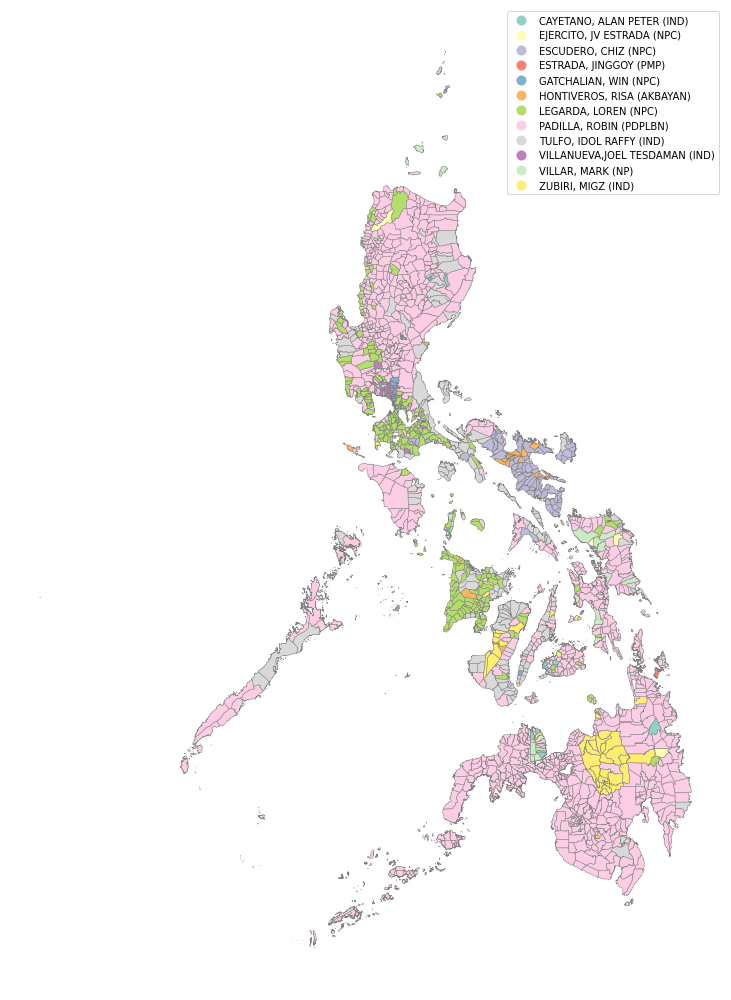

In [774]:
# not very useful

fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='sen_won',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   cmap='Set3',
#                    alpha=0.8,
                   legend=True,
                   ax=ax)

ax.axis('off')
# ax.legend(loc='center left')

plt.tight_layout() 
plt.show()

In [1062]:
sen_by_region = df_sen_results_votes.droplevel(['prov', 'mun'], axis=0).reset_index().copy()
sen_by_region = sen_by_region.groupby('reg')[winning_sen].sum()
sen_by_region = sen_by_region.T

sen_region_totals = sen_by_region.sum(axis=1).copy()

for col in sen_by_region.columns:
    sen_by_region[col] = sen_by_region[col] / sen_region_totals
    
sen_by_region

reg                                BARMM  CORDILLERA ADMINISTRATIVE REGION  \
candidate_name                                                               
PADILLA, ROBIN (PDPLBN)         0.055044                          0.019455   
LEGARDA, LOREN (NPC)            0.021449                          0.015978   
TULFO, IDOL RAFFY (IND)         0.017527                          0.017956   
GATCHALIAN, WIN (NPC)           0.022556                          0.014916   
ESCUDERO, CHIZ (NPC)            0.010534                          0.014255   
VILLAR, MARK (NP)               0.021890                          0.017761   
CAYETANO, ALAN PETER (IND)      0.019506                          0.015083   
ZUBIRI, MIGZ (IND)              0.030784                          0.013569   
VILLANUEVA,JOEL TESDAMAN (IND)  0.011868                          0.014685   
EJERCITO, JV ESTRADA (NPC)      0.017721                          0.016992   
HONTIVEROS, RISA (AKBAYAN)      0.012939                          0.010361   
ESTRADA, JINGGOY (PMP)          0.027550                          0.018866   

reg                             NATIONAL CAPITAL REGION       OAV  REGION I  \
candidate_name                                                                
PADILLA, ROBIN (PDPLBN)                        0.102504  0.011522  0.061272   
LEGARDA, LOREN (NPC)                           0.127618  0.011771  0.063093   
TULFO, IDOL RAFFY (IND)                        0.125029  0.008532  0.060690   
GATCHALIAN, WIN (NPC)                          0.145298  0.007720  0.056759   
ESCUDERO, CHIZ (NPC)                           0.139356  0.009463  0.053785   
VILLAR, MARK (NP)                              0.129216  0.012496  0.062042   
CAYETANO, ALAN PETER (IND)                     0.120714  0.008443  0.051684   
ZUBIRI, MIGZ (IND)                             0.114265  0.010283  0.055002   
VILLANUEVA,JOEL TESDAMAN (IND)                 0.139405  0.006703  0.059475   
EJERCITO, JV ESTRADA (NPC)                     0.122255  0.007781  0.063230   
HONTIVEROS, RISA (AKBAYAN)                     0.145663  0.006735  0.046142   
ESTRADA, JINGGOY (PMP)                         0.098201  0.009675  0.069437   

reg                             REGION II  REGION III  REGION IV-A  \
candidate_name                                                       
PADILLA, ROBIN (PDPLBN)          0.035888    0.115557     0.129471   
LEGARDA, LOREN (NPC)             0.033135    0.125389     0.156596   
TULFO, IDOL RAFFY (IND)          0.038219    0.119396     0.155322   
GATCHALIAN, WIN (NPC)            0.033154    0.134238     0.151485   
ESCUDERO, CHIZ (NPC)             0.029267    0.131266     0.171909   
VILLAR, MARK (NP)                0.034180    0.112816     0.147058   
CAYETANO, ALAN PETER (IND)       0.031199    0.119190     0.151035   
ZUBIRI, MIGZ (IND)               0.031621    0.111888     0.130704   
VILLANUEVA,JOEL TESDAMAN (IND)   0.032306    0.154852     0.163507   
EJERCITO, JV ESTRADA (NPC)       0.042548    0.129235     0.153504   
HONTIVEROS, RISA (AKBAYAN)       0.025785    0.127549     0.176147   
ESTRADA, JINGGOY (PMP)           0.043451    0.123470     0.140737   

reg                             REGION IV-B  REGION IX  REGION V  REGION VI  \
candidate_name                                                                
PADILLA, ROBIN (PDPLBN)            0.030425   0.038317  0.038788   0.054024   
LEGARDA, LOREN (NPC)               0.029596   0.026746  0.046039   0.080066   
TULFO, IDOL RAFFY (IND)            0.033809   0.026955  0.050435   0.077912   
GATCHALIAN, WIN (NPC)              0.028915   0.026046  0.041297   0.063316   
ESCUDERO, CHIZ (NPC)               0.029225   0.025764  0.076777   0.070668   
VILLAR, MARK (NP)                  0.024508   0.032365  0.038711   0.061041   
CAYETANO, ALAN PETER (IND)         0.030304   0.029942  0.049077   0.071961   
ZUBIRI, MIGZ (IND)                 0.023815   0.032717  0.041100   0.082298   
VILLANUEVA,JOEL TESDAMAN (IND

In [1068]:
sen_by_region[sen_by_region.max(axis=1) > 0.1]

reg                                BARMM  CORDILLERA ADMINISTRATIVE REGION  \
candidate_name                                                               
PADILLA, ROBIN (PDPLBN)         0.055044                          0.019455   
LEGARDA, LOREN (NPC)            0.021449                          0.015978   
TULFO, IDOL RAFFY (IND)         0.017527                          0.017956   
GATCHALIAN, WIN (NPC)           0.022556                          0.014916   
ESCUDERO, CHIZ (NPC)            0.010534                          0.014255   
VILLAR, MARK (NP)               0.021890                          0.017761   
CAYETANO, ALAN PETER (IND)      0.019506                          0.015083   
ZUBIRI, MIGZ (IND)              0.030784                          0.013569   
VILLANUEVA,JOEL TESDAMAN (IND)  0.011868                          0.014685   
EJERCITO, JV ESTRADA (NPC)      0.017721                          0.016992   
HONTIVEROS, RISA (AKBAYAN)      0.012939                          0.010361   
ESTRADA, JINGGOY (PMP)          0.027550                          0.018866   

reg                             NATIONAL CAPITAL REGION       OAV  REGION I  \
candidate_name                                                                
PADILLA, ROBIN (PDPLBN)                        0.102504  0.011522  0.061272   
LEGARDA, LOREN (NPC)                           0.127618  0.011771  0.063093   
TULFO, IDOL RAFFY (IND)                        0.125029  0.008532  0.060690   
GATCHALIAN, WIN (NPC)                          0.145298  0.007720  0.056759   
ESCUDERO, CHIZ (NPC)                           0.139356  0.009463  0.053785   
VILLAR, MARK (NP)                              0.129216  0.012496  0.062042   
CAYETANO, ALAN PETER (IND)                     0.120714  0.008443  0.051684   
ZUBIRI, MIGZ (IND)                             0.114265  0.010283  0.055002   
VILLANUEVA,JOEL TESDAMAN (IND)                 0.139405  0.006703  0.059475   
EJERCITO, JV ESTRADA (NPC)                     0.122255  0.007781  0.063230   
HONTIVEROS, RISA (AKBAYAN)                     0.145663  0.006735  0.046142   
ESTRADA, JINGGOY (PMP)                         0.098201  0.009675  0.069437   

reg                             REGION II  REGION III  REGION IV-A  \
candidate_name                                                       
PADILLA, ROBIN (PDPLBN)          0.035888    0.115557     0.129471   
LEGARDA, LOREN (NPC)             0.033135    0.125389     0.156596   
TULFO, IDOL RAFFY (IND)          0.038219    0.119396     0.155322   
GATCHALIAN, WIN (NPC)            0.033154    0.134238     0.151485   
ESCUDERO, CHIZ (NPC)             0.029267    0.131266     0.171909   
VILLAR, MARK (NP)                0.034180    0.112816     0.147058   
CAYETANO, ALAN PETER (IND)       0.031199    0.119190     0.151035   
ZUBIRI, MIGZ (IND)               0.031621    0.111888     0.130704   
VILLANUEVA,JOEL TESDAMAN (IND)   0.032306    0.154852     0.163507   
EJERCITO, JV ESTRADA (NPC)       0.042548    0.129235     0.153504   
HONTIVEROS, RISA (AKBAYAN)       0.025785    0.127549     0.176147   
ESTRADA, JINGGOY (PMP)           0.043451    0.123470     0.140737   

reg                             REGION IV-B  REGION IX  REGION V  REGION VI  \
candidate_name                                                                
PADILLA, ROBIN (PDPLBN)            0.030425   0.038317  0.038788   0.054024   
LEGARDA, LOREN (NPC)               0.029596   0.026746  0.046039   0.080066   
TULFO, IDOL RAFFY (IND)            0.033809   0.026955  0.050435   0.077912   
GATCHALIAN, WIN (NPC)              0.028915   0.026046  0.041297   0.063316   
ESCUDERO, CHIZ (NPC)               0.029225   0.025764  0.076777   0.070668   
VILLAR, MARK (NP)                  0.024508   0.032365  0.038711   0.061041   
CAYETANO, ALAN PETER (IND)         0.030304   0.029942  0.049077   0.071961   
ZUBIRI, MIGZ (IND)                 0.023815   0.032717  0.041100   0.082298   
VILLANUEVA,JOEL TESDAMAN (IND

### Party-List

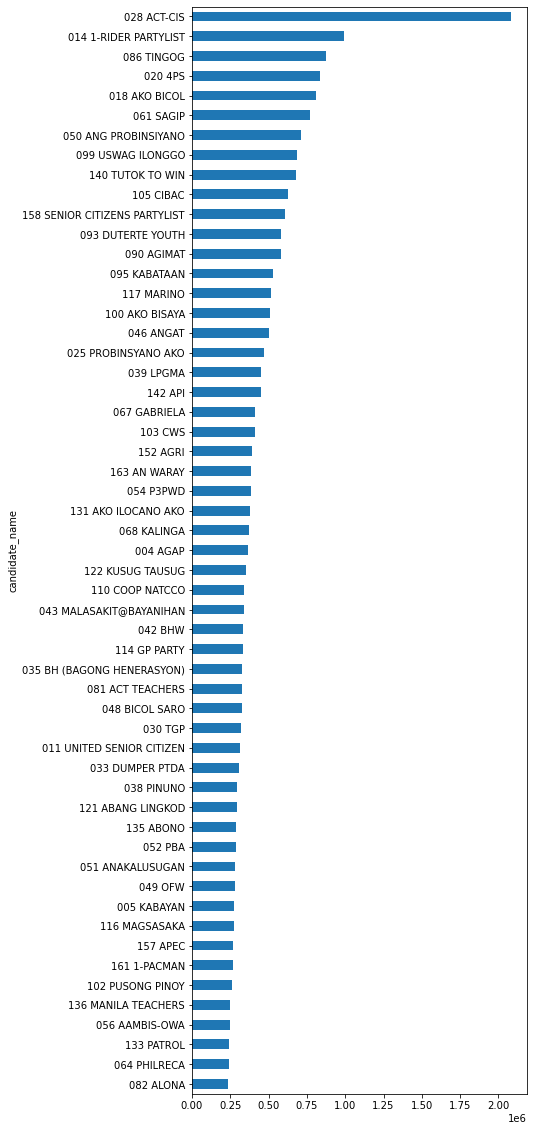

candidate_name
028 ACT-CIS                      2080795
014 1-RIDER PARTYLIST             989946
086 TINGOG                        872752
020 4PS                           836728
018 AKO BICOL                     810564
061 SAGIP                         771695
050 ANG PROBINSIYANO              708668
099 USWAG ILONGGO                 684051
140 TUTOK TO WIN                  677353
105 CIBAC                         628940
158 SENIOR CITIZENS PARTYLIST     604026
093 DUTERTE YOUTH                 583982
090 AGIMAT                        583125
095 KABATAAN                      529921
117 MARINO                        517314
100 AKO BISAYA                    508392
046 ANGAT                         504299
025 PROBINSYANO AKO               469194
039 LPGMA                         450045
142 API                           449291
067 GABRIELA                      414182
103 CWS                           410473
152 AGRI                          390314
163 AN WARAY                      383408
0

In [596]:
fig, ax = plt.subplots(figsize=(6, 20))

(df_plist_results.groupby('candidate_name')['votes'].sum().
 sort_values(ascending=True).iloc[-55:].plot(kind='barh', ax=ax))
plt.show()

df_plist_results.groupby('candidate_name')['votes'].sum().sort_values(ascending=False).iloc[:55]

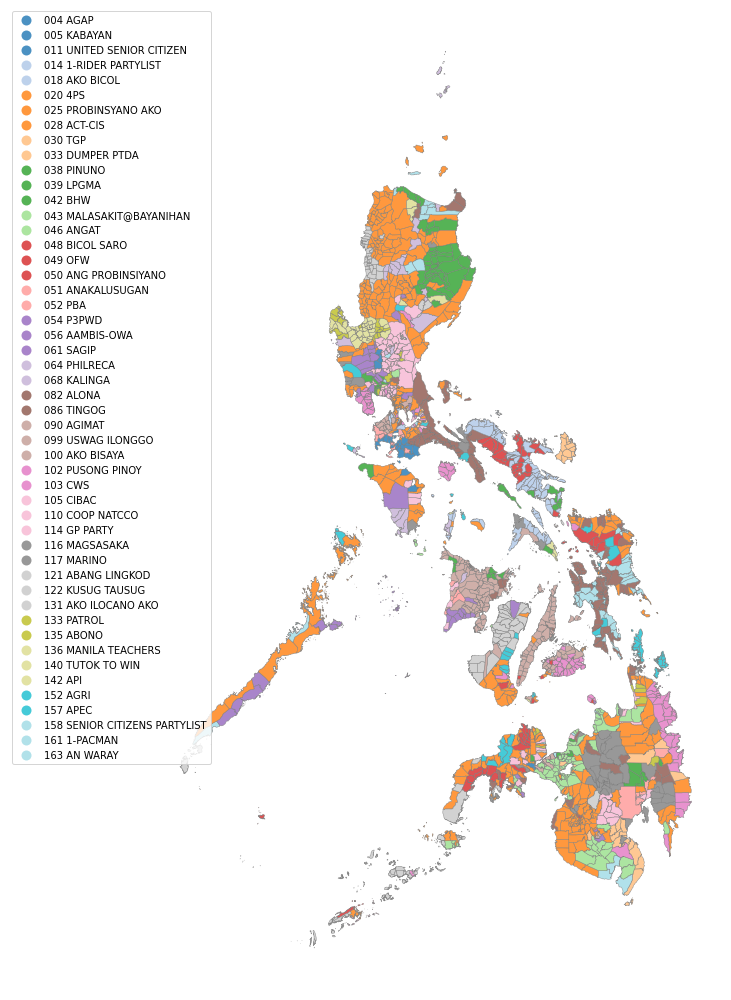

In [778]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='plist_won',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   cmap='tab20',
                   alpha=0.8,
                   legend=True,
                   legend_kwds={'loc':'upper left'},
                   ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

In [600]:
plist_by_region = df_plist_results_votes.droplevel(['prov', 'mun'], axis=0).reset_index().copy()
plist_by_region = plist_by_region.groupby('reg')[winning_plists].sum()
plist_by_region = plist_by_region.T

plist_region_totals = plist_by_region.sum(axis=1).copy()

for col in plist_by_region.columns:
    plist_by_region[col] = plist_by_region[col] / plist_region_totals
    
plist_by_region

reg                               BARMM  CORDILLERA ADMINISTRATIVE REGION  \
candidate_name                                                              
028 ACT-CIS                    0.006269                          0.044840   
014 1-RIDER PARTYLIST          0.003146                          0.007466   
086 TINGOG                     0.031345                          0.003456   
020 4PS                        0.091321                          0.010829   
018 AKO BICOL                  0.001094                          0.001401   
061 SAGIP                      0.009619                          0.015248   
050 ANG PROBINSIYANO           0.009430                          0.007033   
099 USWAG ILONGGO              0.000345                          0.000187   
140 TUTOK TO WIN               0.007345                          0.009717   
105 CIBAC                      0.002894                          0.007986   
158 SENIOR CITIZENS PARTYLIST  0.010804                          0.019075   
093 DUTERTE YOUTH              0.018836                          0.015007   
090 AGIMAT                     0.019574                          0.001504   
095 KABATAAN                   0.003538                          0.011219   
117 MARINO                     0.026340                          0.002642   
100 AKO BISAYA                 0.000889                          0.000393   
046 ANGAT                      0.143231                          0.004055   
025 PROBINSYANO AKO            0.006639                          0.006639   
039 LPGMA                      0.002351                          0.009632   
142 API                        0.000852                          0.002330   
067 GABRIELA                   0.002740                          0.008996   
103 CWS                        0.020528                          0.000636   
152 AGRI                       0.003789                          0.010089   
163 AN WARAY                   0.000300                          0.000728   
054 P3PWD                      0.003979                          0.006780   
131 AKO ILOCANO AKO            0.000875                          0.033418   
068 KALINGA                    0.000821                          0.024853   
004 AGAP                       0.002772                          0.002125   
122 KUSUG TAUSUG               0.858056                          0.000096   
110 COOP NATCCO                0.008415                          0.030051   
043 MALASAKIT@BAYANIHAN        0.040369                          0.010853   
042 BHW                        0.007226                          0.012271   
114 GP PARTY                   0.001196                          0.000494   
035 BH (BAGONG HENERASYON)     0.002197                          0.009697   
081 ACT TEACHERS               0.008962                          0.011952   
048 BICOL SARO                 0.001764                          0.001798   
030 TGP                        0.038664                          0.001900   
011 UNITED SENIOR CITIZEN      0.010340                          0.017799   
033 DUMPER PTDA                0.028655                          0.000600   
038 PINUNO                     0.010314                          0.003946   
121 ABANG LINGKOD              0.002022                          0.000450   
135 ABONO                      0.000501                          0.006815   
052 PBA                        0.007020                          0.003737   
051 ANAKALUSUGAN               0.004578                          0.001607   
049 OFW                        0.020879                          0.014198   
005 KABAYAN                    0.008944                          0.020170   
116 MAGSASAKA                  0.007574                          0.015908   
157 APEC                       0.000881                          0.001970   
161 1-PACMAN                   0.005175                          0.003760   
102 PUSONG PINOY               0.054790                          0.003258

In [810]:
plist_by_region[plist_by_region.max(axis=1) > 0.5]

reg                     BARMM  CORDILLERA ADMINISTRATIVE REGION  \
candidate_name                                                    
018 AKO BICOL        0.001094                          0.001401   
099 USWAG ILONGGO    0.000345                          0.000187   
090 AGIMAT           0.019574                          0.001504   
100 AKO BISAYA       0.000889                          0.000393   
025 PROBINSYANO AKO  0.006639                          0.006639   
039 LPGMA            0.002351                          0.009632   
142 API              0.000852                          0.002330   
163 AN WARAY         0.000300                          0.000728   
004 AGAP             0.002772                          0.002125   
122 KUSUG TAUSUG     0.858056                          0.000096   
114 GP PARTY         0.001196                          0.000494   
048 BICOL SARO       0.001764                          0.001798   
033 DUMPER PTDA      0.028655                          0.000600   
121 ABANG LINGKOD    0.002022                          0.000450   
135 ABONO            0.000501                          0.006815   
052 PBA              0.007020                          0.003737   
051 ANAKALUSUGAN     0.004578                          0.001607   
102 PUSONG PINOY     0.054790                          0.003258   
056 AAMBIS-OWA       0.008164                          0.000371   
082 ALONA            0.001132                          0.000482   

reg                  NATIONAL CAPITAL REGION       OAV  REGION I  REGION II  \
candidate_name                                                                
018 AKO BICOL                       0.099453  0.003828  0.005708   0.003157   
099 USWAG ILONGGO                   0.009034  0.003960  0.000632   0.000370   
090 AGIMAT                          0.043044  0.003425  0.005834   0.004471   
100 AKO BISAYA                      0.015614  0.002217  0.001434   0.000889   
025 PROBINSYANO AKO                 0.042825  0.002174  0.576523   0.017070   
039 LPGMA                           0.182248  0.003375  0.001893   0.563341   
142 API                             0.006147  0.001211  0.946507   0.003125   
163 AN WARAY                        0.068246  0.003967  0.004121   0.000657   
004 AGAP                            0.075392  0.004032  0.006546   0.006100   
122 KUSUG TAUSUG                    0.006220  0.001562  0.000258   0.000258   
114 GP PARTY                        0.009437  0.000871  0.002377   0.005945   
048 BICOL SARO                      0.110016  0.003453  0.007750   0.004426   
033 DUMPER PTDA                     0.010532  0.004586  0.002178   0.003014   
121 ABANG LINGKOD                   0.008995  0.004853  0.003082   0.007860   
135 ABONO                           0.011305  0.004751  0.895543   0.011413   
052 PBA                             0.047908  0.004770  0.013364   0.008015   
051 ANAKALUSUGAN                    0.030454  0.002899  0.005045   0.004178   
102 PUSONG PINOY                    0.032472  0.003046  0.008648   0.035414   
056 AAMBIS-OWA                      0.006510  0.002159  0.010625   0.001736   
082 ALONA                           0.007144  0.001162  0.000667   0.002374   

reg                  REGION III  REGION IV-A  REGION IV-B  REGION IX  \
candidate_name                                                         
018 AKO BICOL          0.044929     0.103343     0.015610   0.003016   
099 USWAG ILONGGO      0.003526     0.005608     0.001098   0.000753   
090 AGIMAT             0.042517     0.548711     0.012368   0.005721   
100 AKO BISAYA         0.008846     0.025421     0.004855   0.011930   
025 PROBINSYANO AKO    0.048741     0.056968     0.016132   0.026669   
039 LPGMA              0.060594     0.012190     0.027866   0.000513   
142 API                0.010374     0.005039     0.001743   0.001351   
163 AN WARAY           0.018954     0.021431     0.001656   0.001064   
004 AGAP               0.042324     0.695978     0.053209   0.0049

In [805]:
len(plist_by_region.columns)

18

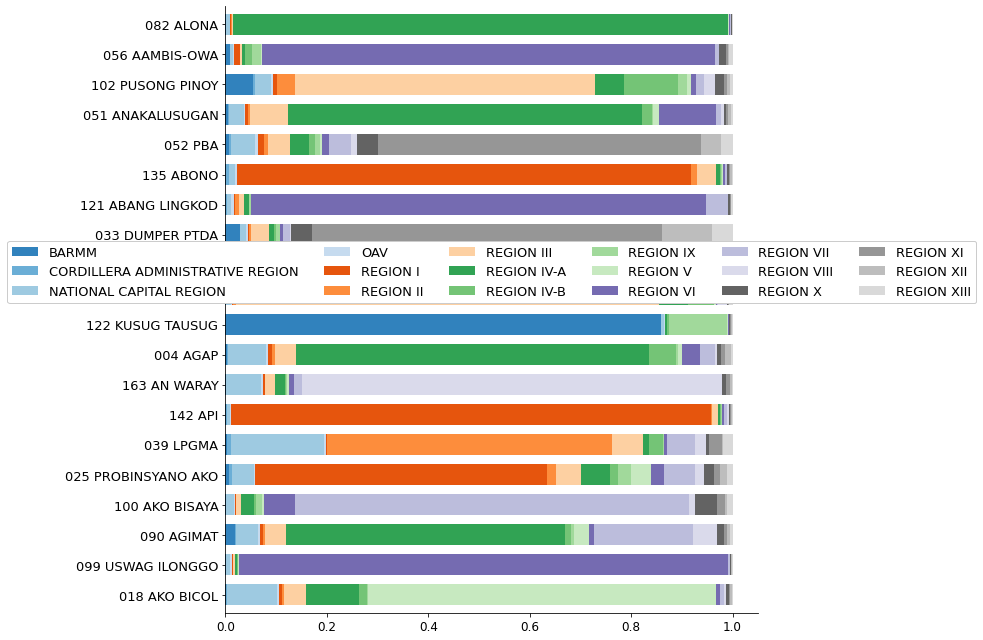

In [808]:
fig, ax = plt.subplots(figsize=(12, 9))

(plist_by_region[plist_by_region.max(axis=1) > 0.5].
 plot(kind='barh', stacked=True, legend=True, width=0.7, cmap='tab20c', ax=ax))

ax.legend(loc='lower center', framealpha=1, fontsize=13,
          bbox_to_anchor=(0.5, 0.5), ncol=6)
# ax.axis('off')
ax.set_ylabel('')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.yticks(fontsize=13)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

### Clusters

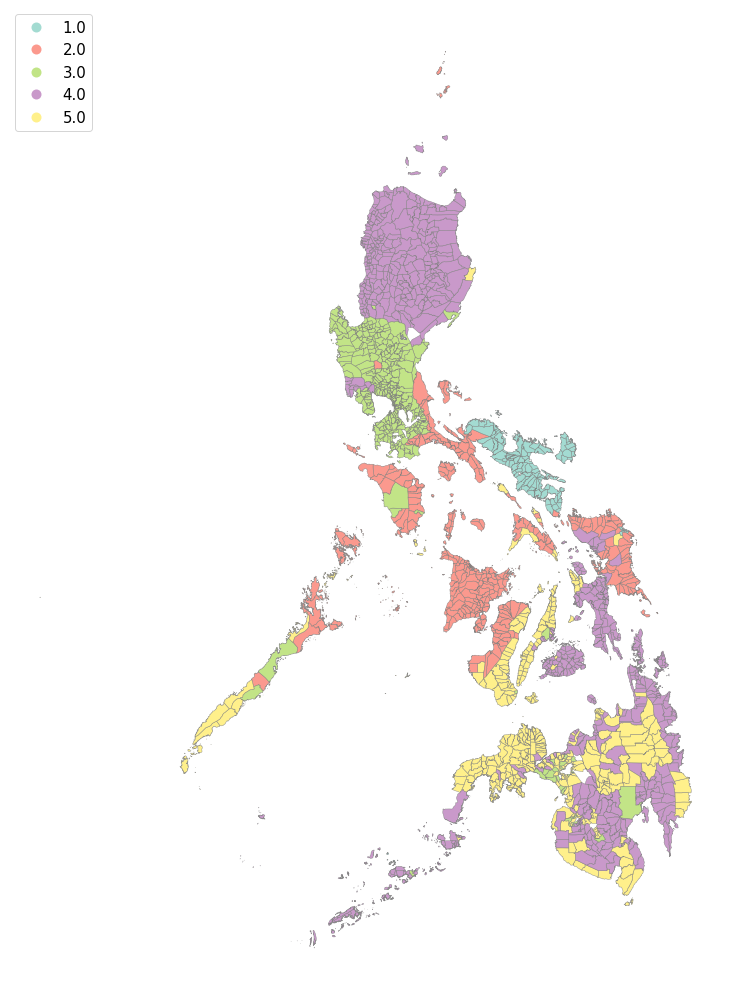

In [827]:
fig, ax = plt.subplots(figsize=(14,14))

ph_geom_plots.plot(column='cluster',
                   edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   cmap='Set3',
                   alpha=0.8,
                   legend=True,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

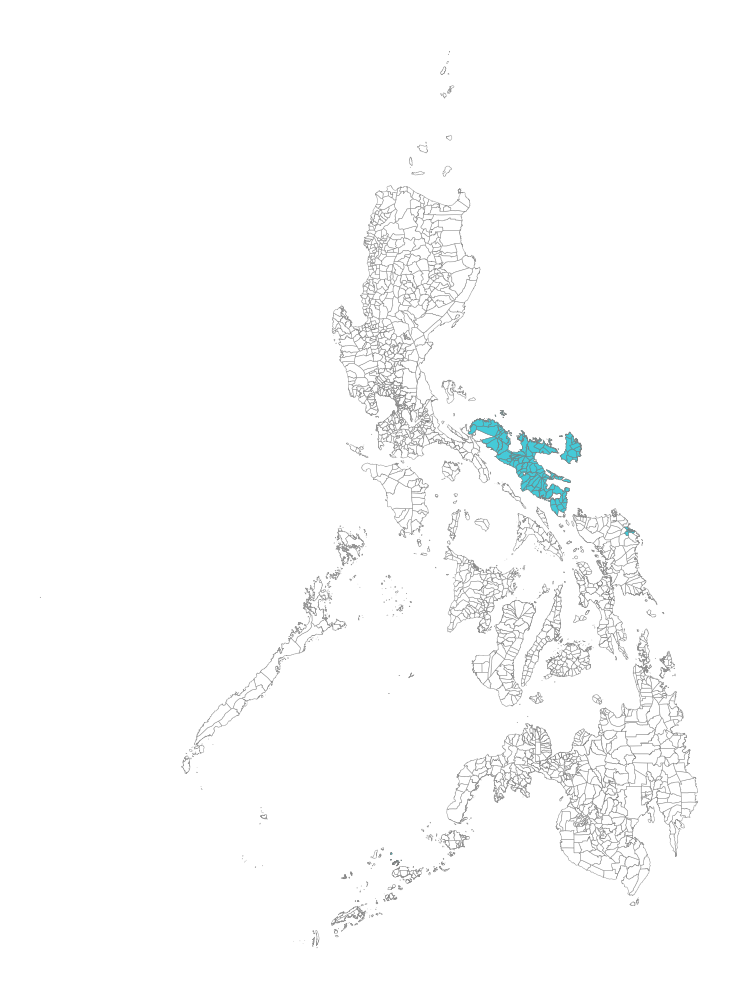

In [831]:
fig, ax = plt.subplots(figsize=(14,14))

cluster1 = ph_geom_plots[ph_geom_plots['cluster']==1]

ph_geom_plots.plot(edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   color='white',
                   alpha=0.8,
                   legend=False,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

cluster1.plot(edgecolor='gray',
              linewidth=0.5,
              categorical=True,
              color='tab:cyan',
              alpha=0.8,
              legend=False,
              legend_kwds={'loc':'upper left', 'fontsize':15},
              ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

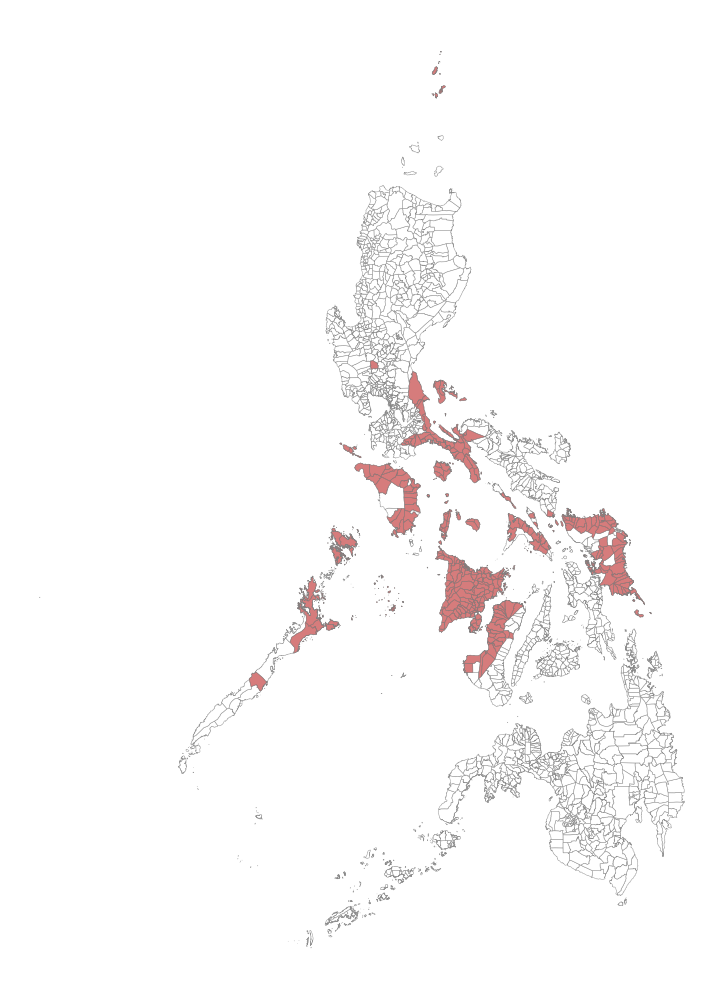

In [832]:
fig, ax = plt.subplots(figsize=(14,14))

cluster2 = ph_geom_plots[ph_geom_plots['cluster']==2]

ph_geom_plots.plot(edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   color='white',
                   alpha=0.8,
                   legend=False,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

cluster2.plot(edgecolor='gray',
              linewidth=0.5,
              categorical=True,
              color='indianred',
              alpha=0.8,
              legend=False,
              legend_kwds={'loc':'upper left', 'fontsize':15},
              ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

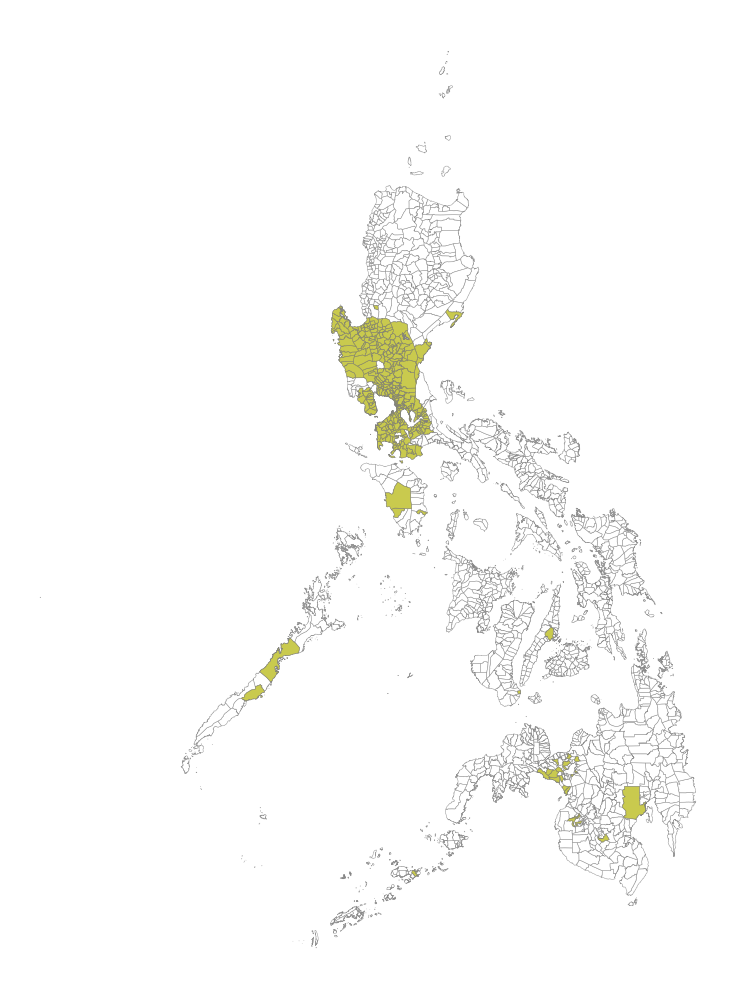

In [833]:
fig, ax = plt.subplots(figsize=(14,14))

cluster3 = ph_geom_plots[ph_geom_plots['cluster']==3]

ph_geom_plots.plot(edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   color='white',
                   alpha=0.8,
                   legend=False,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

cluster3.plot(edgecolor='gray',
              linewidth=0.5,
              categorical=True,
              color='tab:olive',
              alpha=0.8,
              legend=False,
              legend_kwds={'loc':'upper left', 'fontsize':15},
              ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

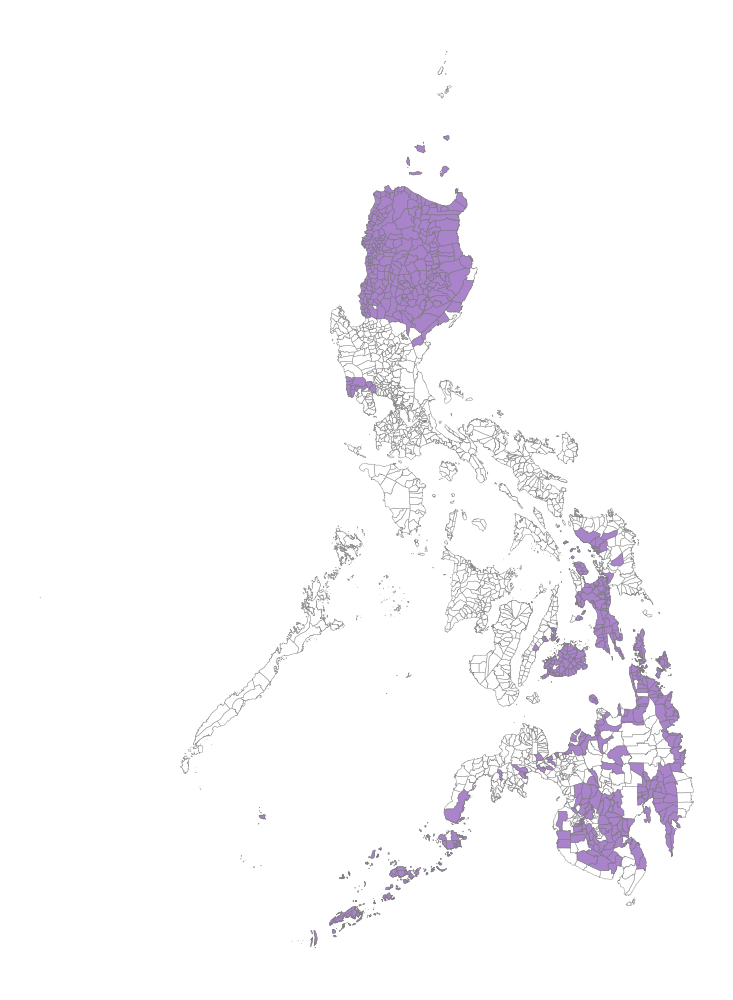

In [834]:
fig, ax = plt.subplots(figsize=(14,14))

cluster4 = ph_geom_plots[ph_geom_plots['cluster']==4]

ph_geom_plots.plot(edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   color='white',
                   alpha=0.8,
                   legend=False,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

cluster4.plot(edgecolor='gray',
              linewidth=0.5,
              categorical=True,
              color='tab:purple',
              alpha=0.8,
              legend=False,
              legend_kwds={'loc':'upper left', 'fontsize':15},
              ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

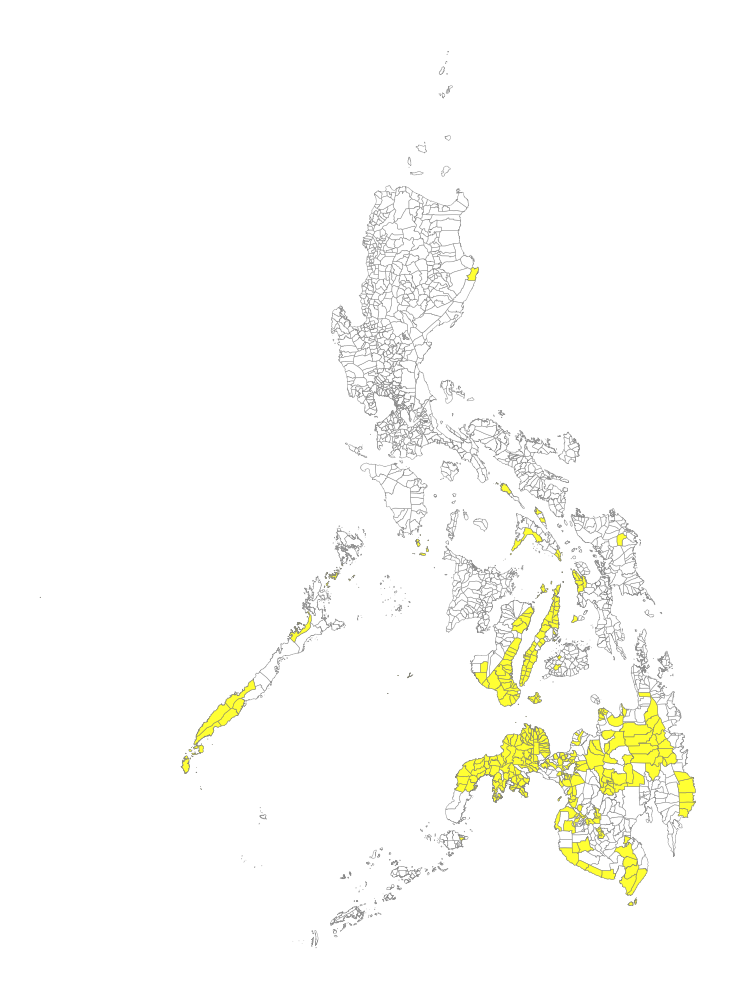

In [835]:
fig, ax = plt.subplots(figsize=(14,14))

cluster5 = ph_geom_plots[ph_geom_plots['cluster']==5]

ph_geom_plots.plot(edgecolor='gray',
                   linewidth=0.5,
                   categorical=True,
                   color='white',
                   alpha=0.8,
                   legend=False,
                   legend_kwds={'loc':'upper left', 'fontsize':15},
                   ax=ax)

cluster5.plot(edgecolor='gray',
              linewidth=0.5,
              categorical=True,
              color='yellow',
              alpha=0.8,
              legend=False,
              legend_kwds={'loc':'upper left', 'fontsize':15},
              ax=ax)

ax.axis('off')
# ax.legend(loc='upper left')

plt.tight_layout() 
plt.show()

## Draft Outline

**Stats**

A. Voting Behavior
1. voter turnout
    * Total turnout (statistic)
    * Choropleth map (if insightful)
2. fill-up rate
    * Total fill-up rate (statistic)
    * Choropleth map (if insightful)
    * Choropleth map on overvoting
    * Choropleth map undervoting

**Results**

B. EDA of results by municipality

1. President
    * bar chart
    * map: all candidates (color - chosen candidate, alpha - percent of voters)
    * map per candidate (alpha - number of votes)
2. VP
    * bar chart
    * map: all candidates (color - chosen candidate, alpha - percent of voters)
    * map per candidate (alpha - number of votes)
3. Senate
    * bar chart (top senators)
4. Party-list
    * bar chart (top party-lists)
    * map: all candidates (color - chosen candidate)

C. Clustering of results

D. Network Analysis
1. Communities of senators
    * edge weights = number of municipalities that picked both senator in top N
2. Communities of party lists
    * edge weights = number of municipalities that picked both party lists in top N

**Stats**


valid-votes = processed-count = processed-ballots

votes-obtained-by-all-candidates + undervote-count + overvote-count = valid-votes<br>
votes-obtained-by-all-candidates / valid-votes = fill-up-rate<br>
valid-votes / expected-voters = turn-out